In [1]:
# Read all lines from the file
import pandas as pd
import matplotlib.pyplot as plt

def define_table(path, has_params: bool = False):
    with open(path, 'r') as f:
        params = None
        if has_params: params = [param.strip() for param in f.readline().split(",")]
        lines = f.readlines()
        # Remove whitespace characters like `\n` at the end of each line
        lines = [x.strip()[1:-1] for x in lines]
        # Transform lines into a list of tuples
        lines = [tuple(x.split(",")) for x in lines]
        # Transform list of tuples into a dictionary
        df = pd.DataFrame(lines, columns=['i', 'j', 'temperature', 'score'])
        df['temperature'] = df['temperature'].astype(float)
        df['score'] = df['score'].astype(int)
        df['i'] = df['i'].astype(int)
        df['j'] = df['j'].astype(int)
        table = df
    return table,params


In [2]:
import os
import re

# For all files in a directory
# read all lines from the file
directory = '../out'
directories = [ os.path.join('../out', directory) for directory in os.listdir(directory) \
               if os.path.isdir(os.path.join('../out', directory)) \
                and re.match(r'comp\d+', directory) ]
file_paths = []
for directory in directories:
    file_paths.extend([os.path.join(directory, file) for file in os.listdir(directory) \
                       if os.path.isfile(os.path.join(directory, file))])

Score: 0


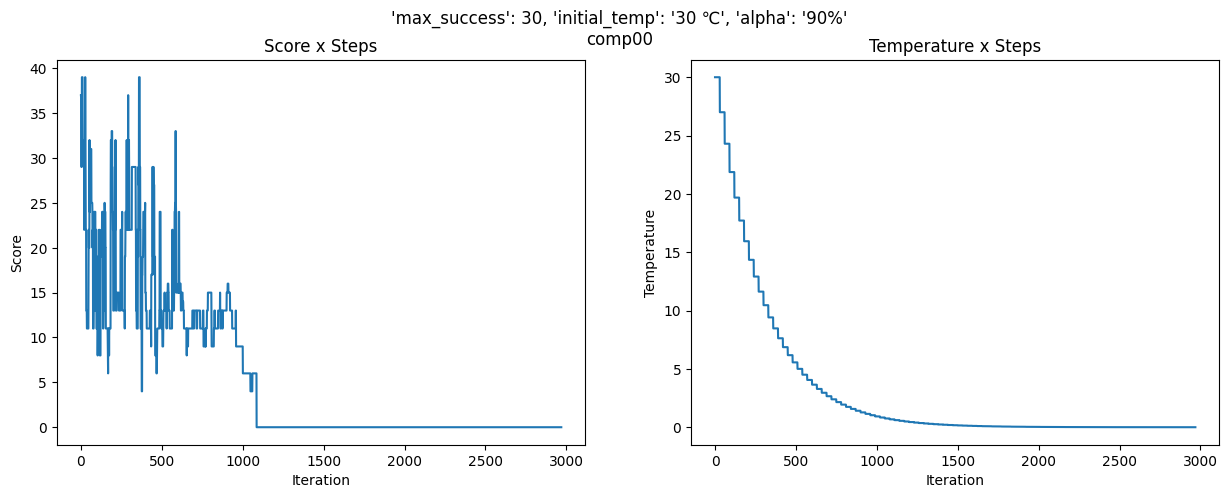

Score: 0


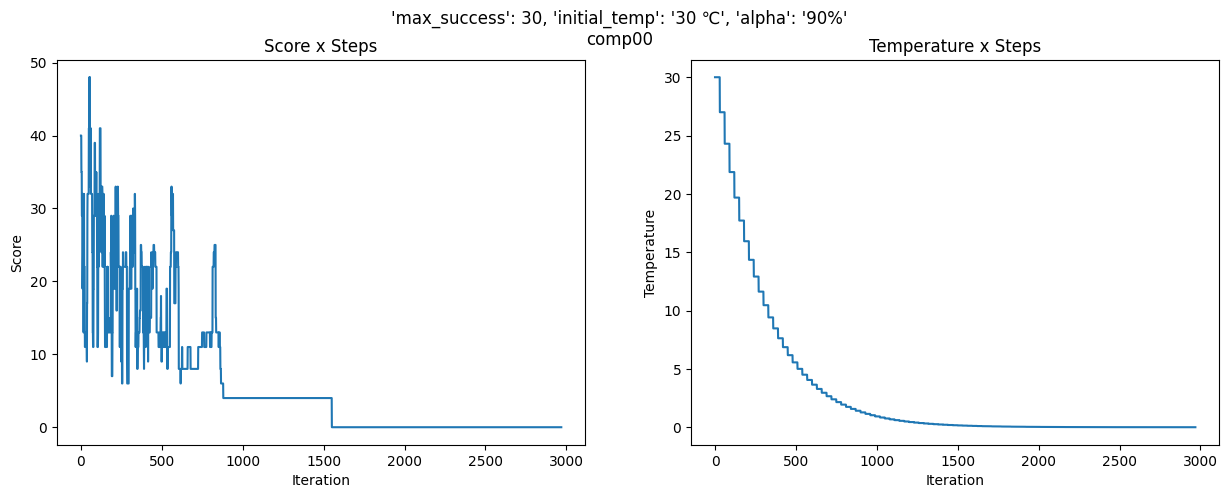

Score: 0


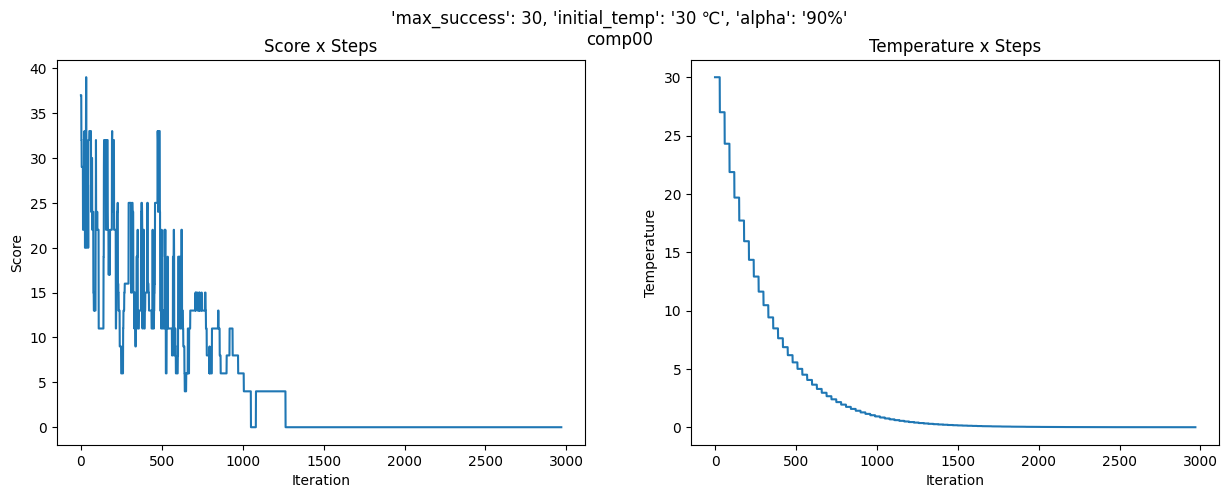

Score: 0


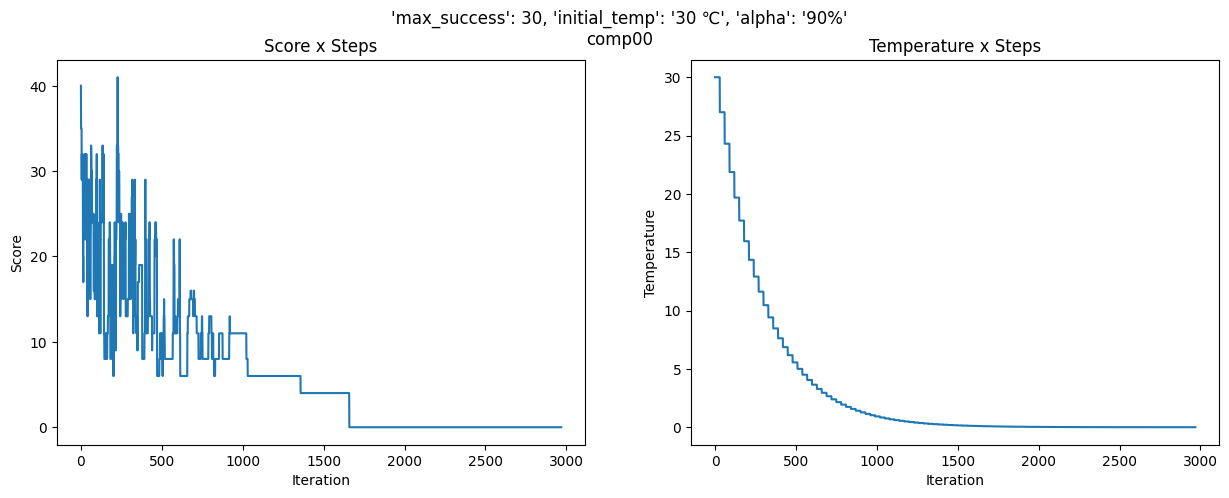

Score: 0


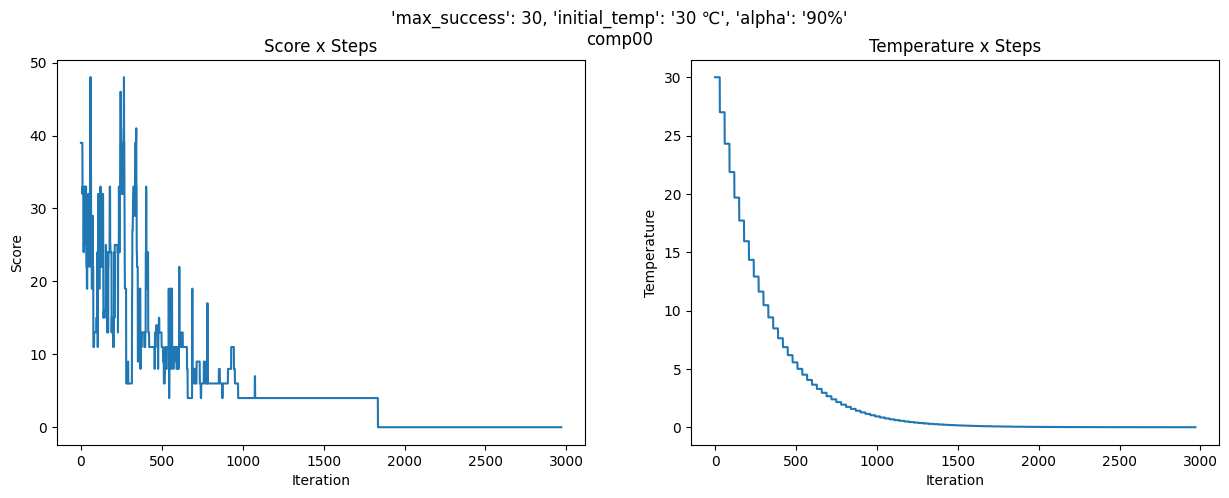

Score: 25


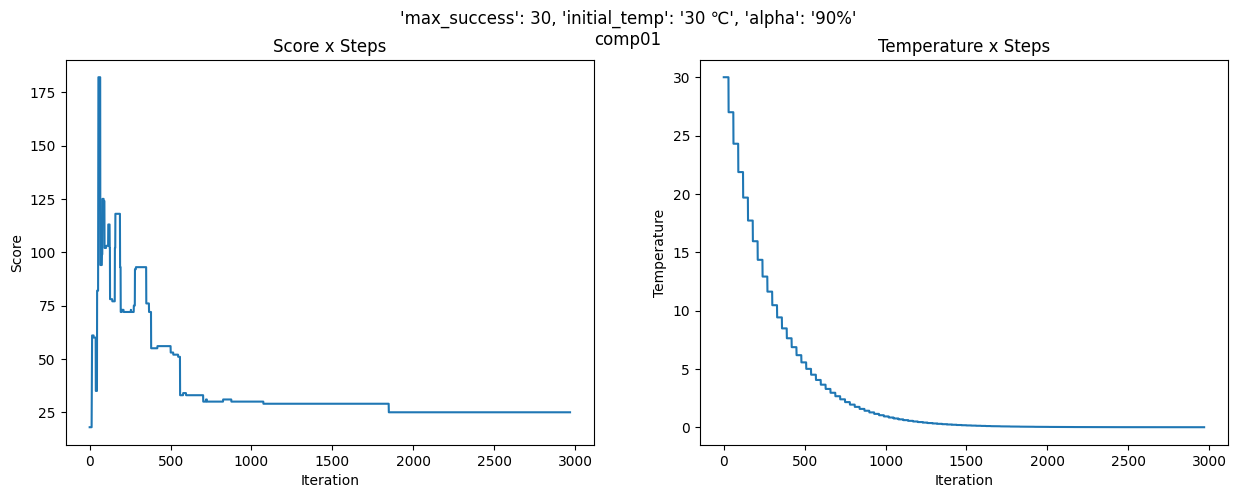

Score: 21


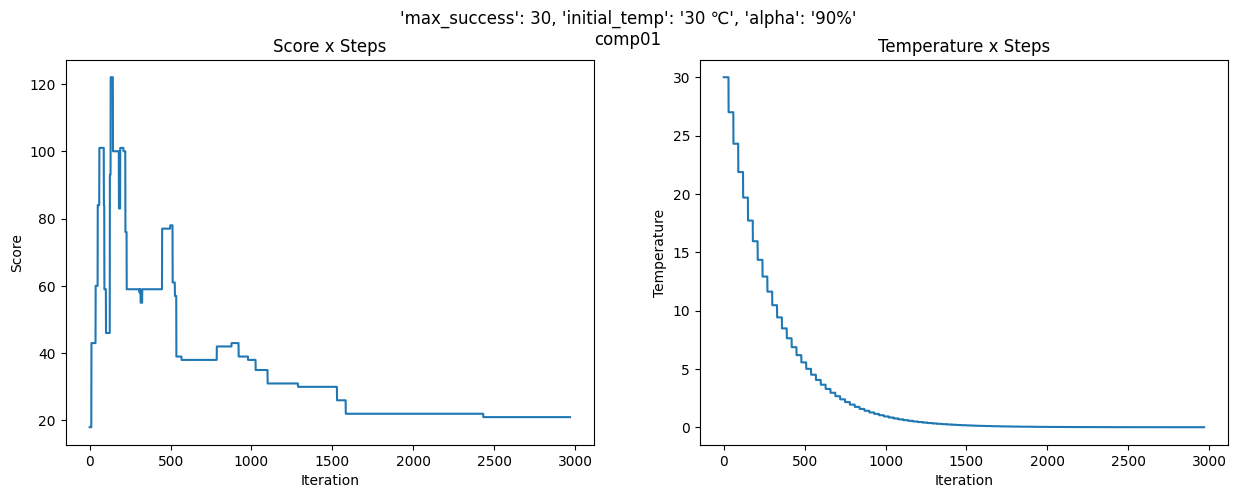

Score: 24


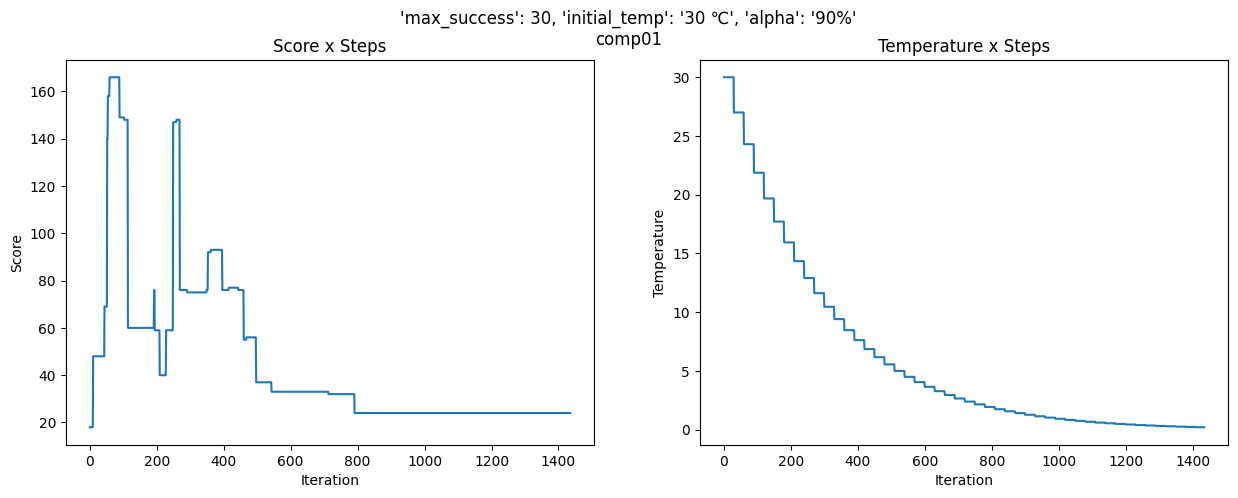

Score: 37


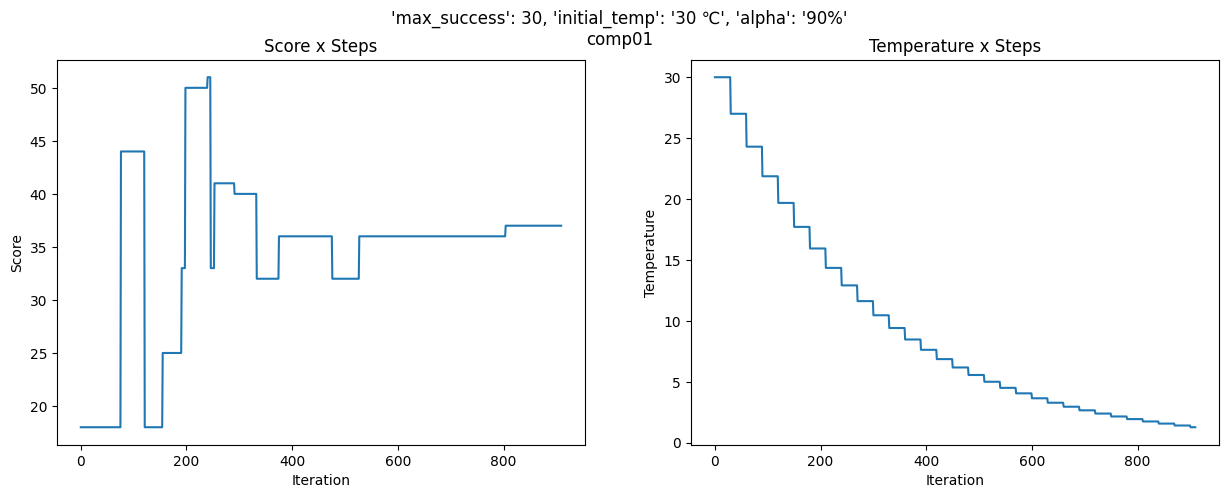

Score: 21


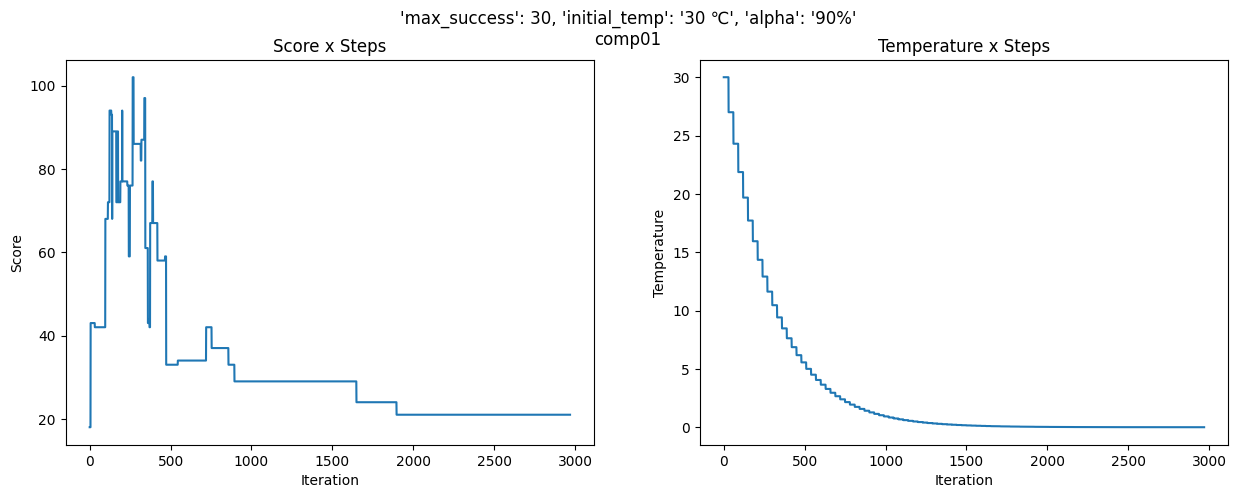

Score: 67


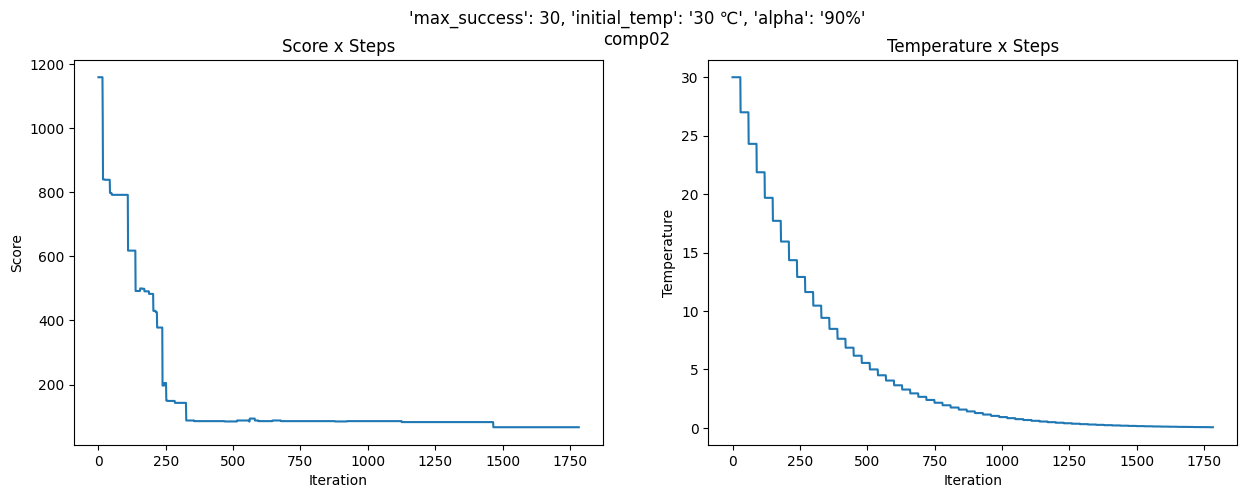

Score: 792


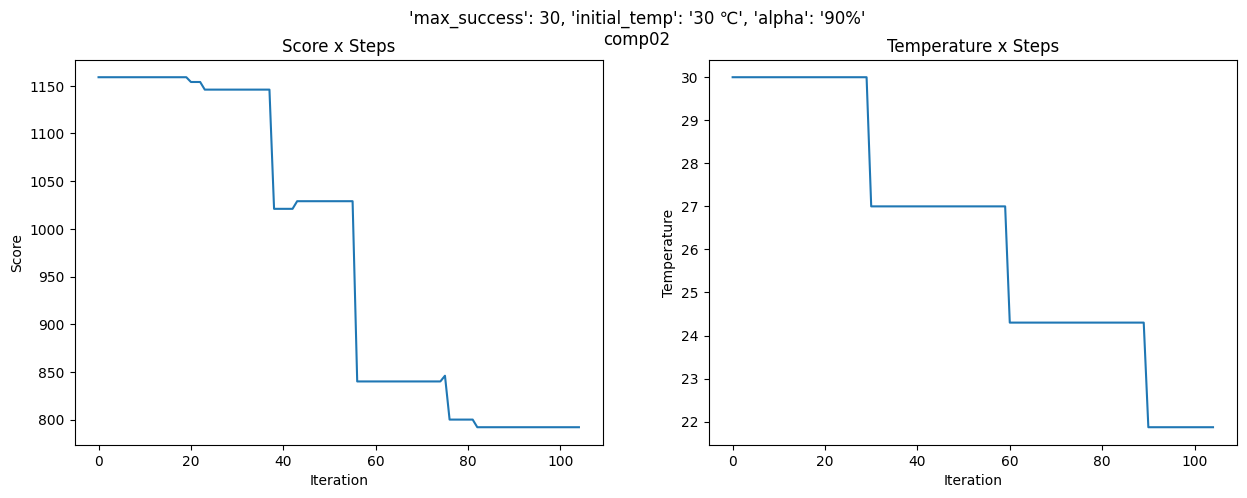

Score: 438


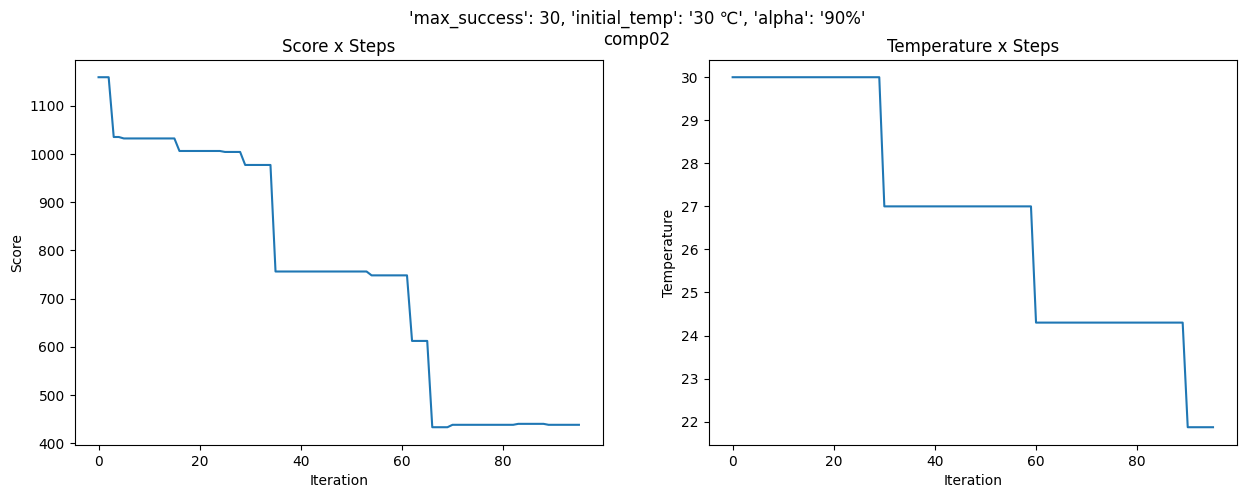

Score: 812


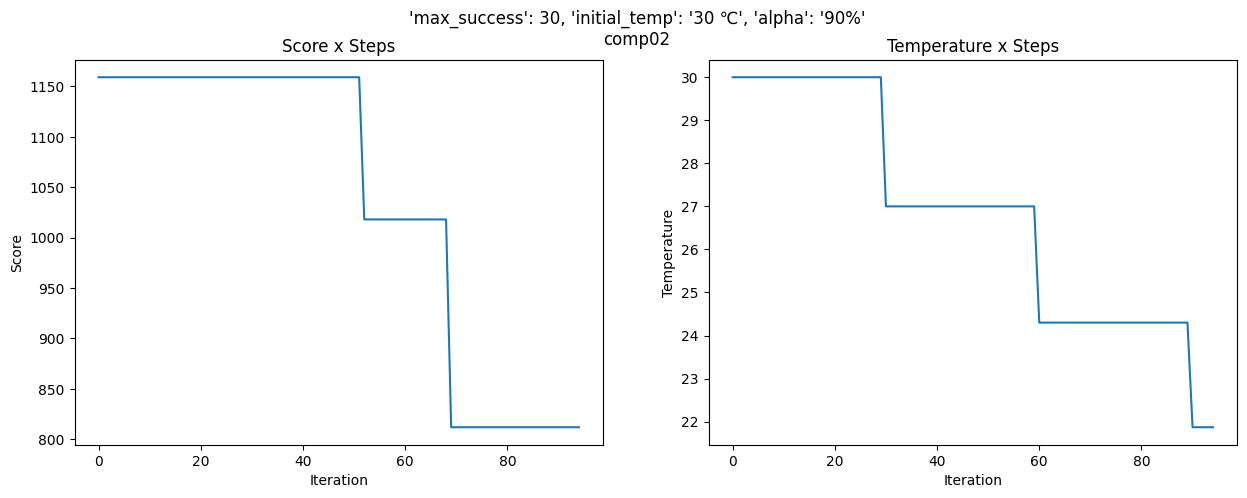

Score: 665


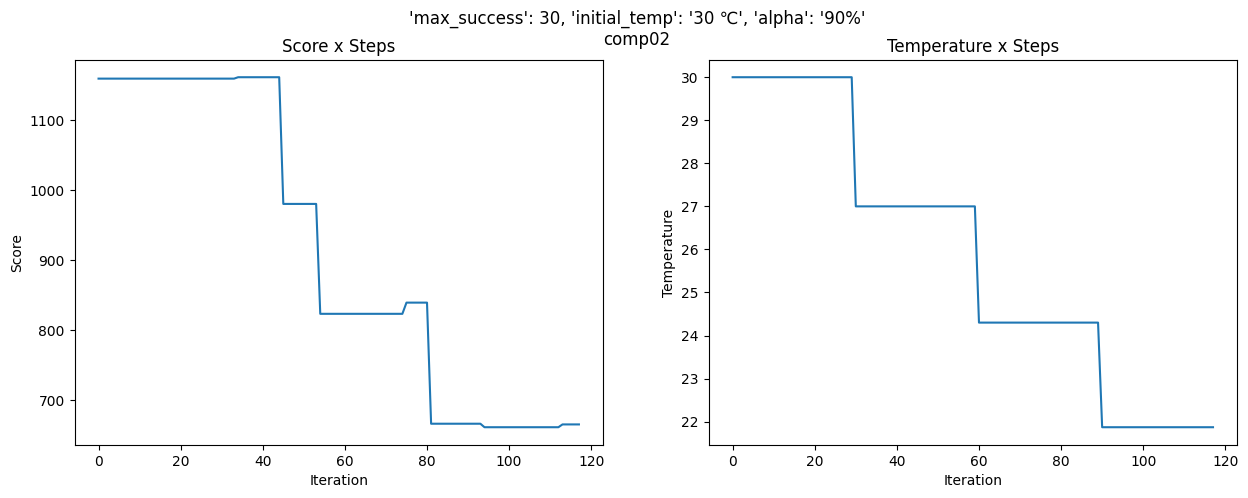

Score: 71


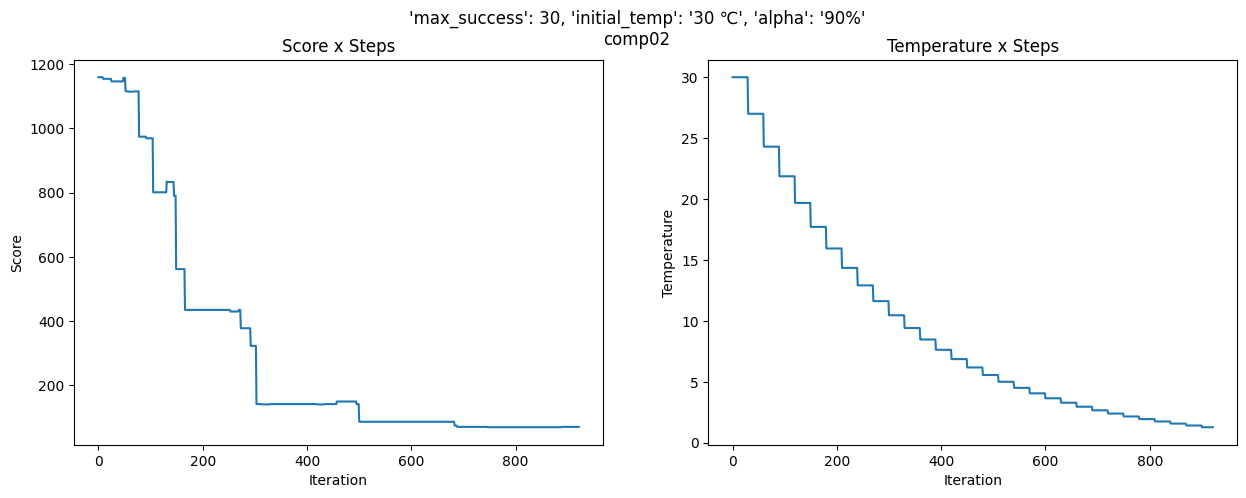

Score: 716


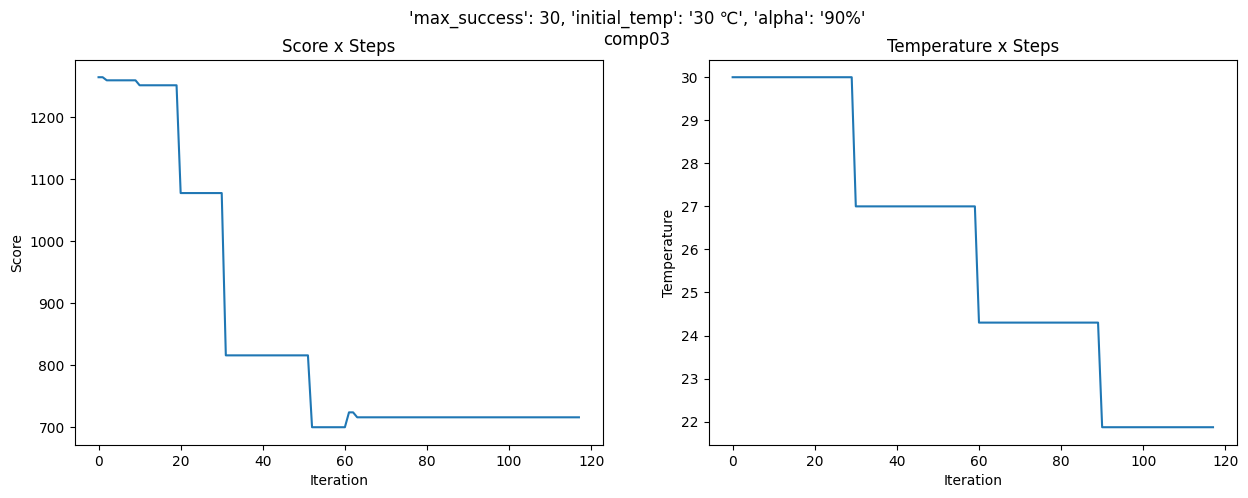

Score: 271


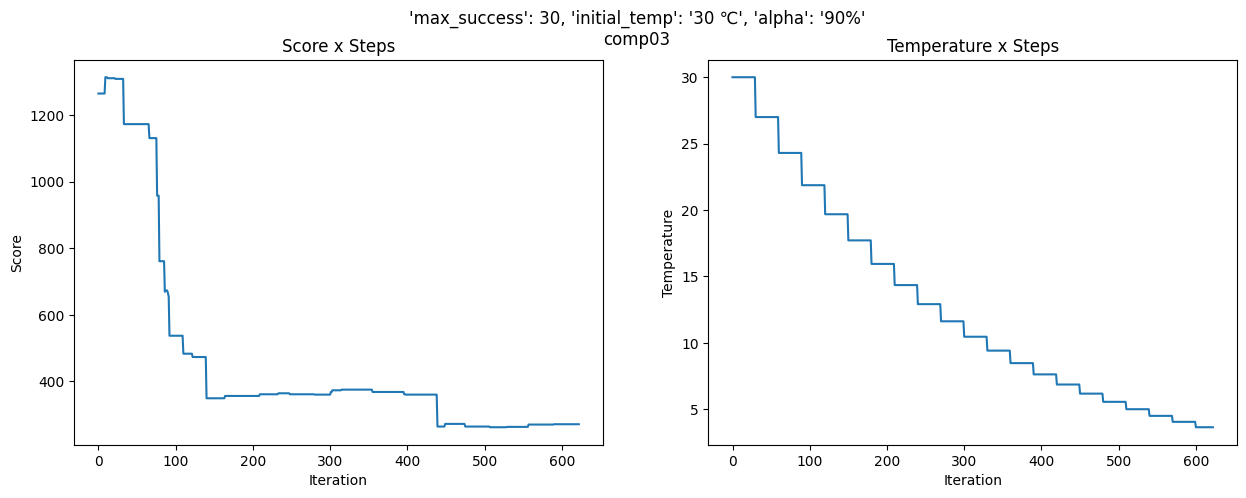

Score: 1068


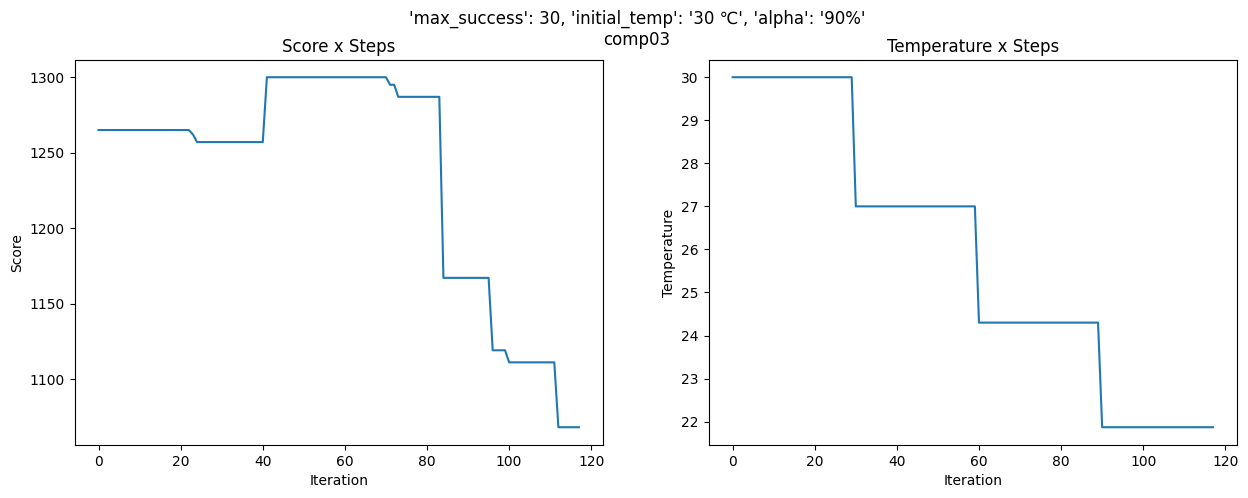

Score: 953


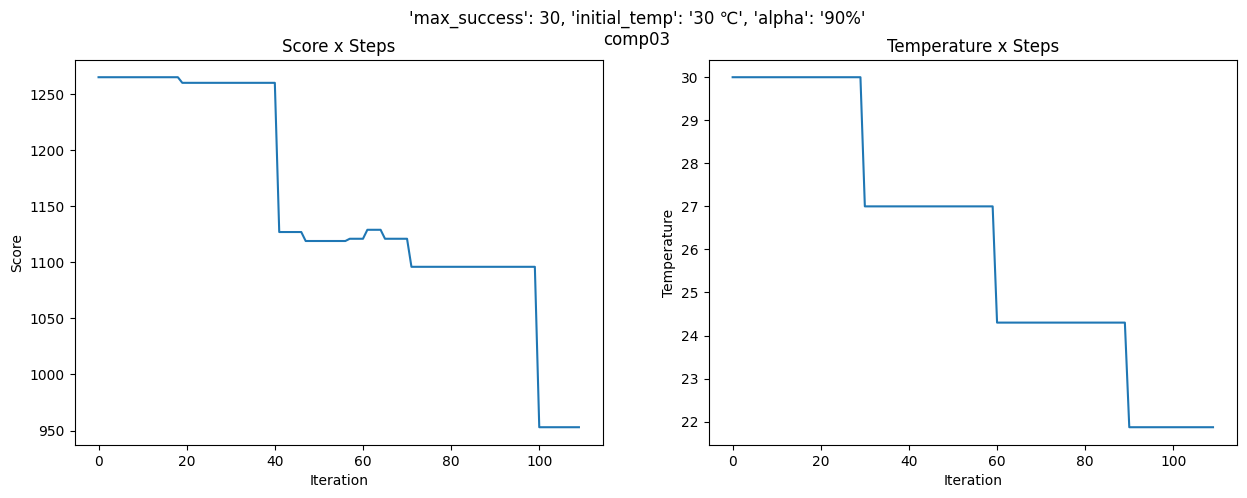

Score: 256


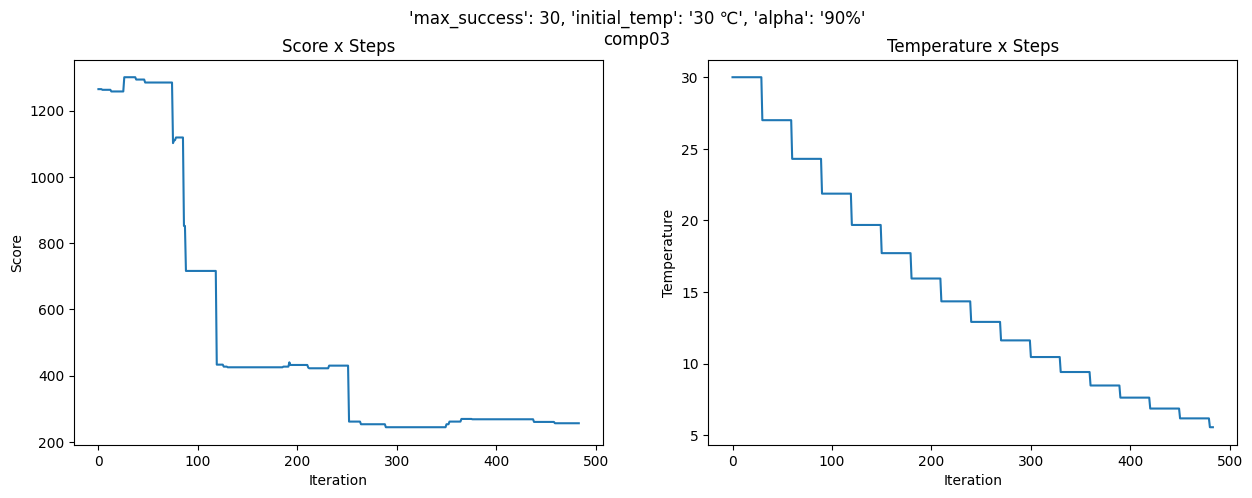

Score: 122


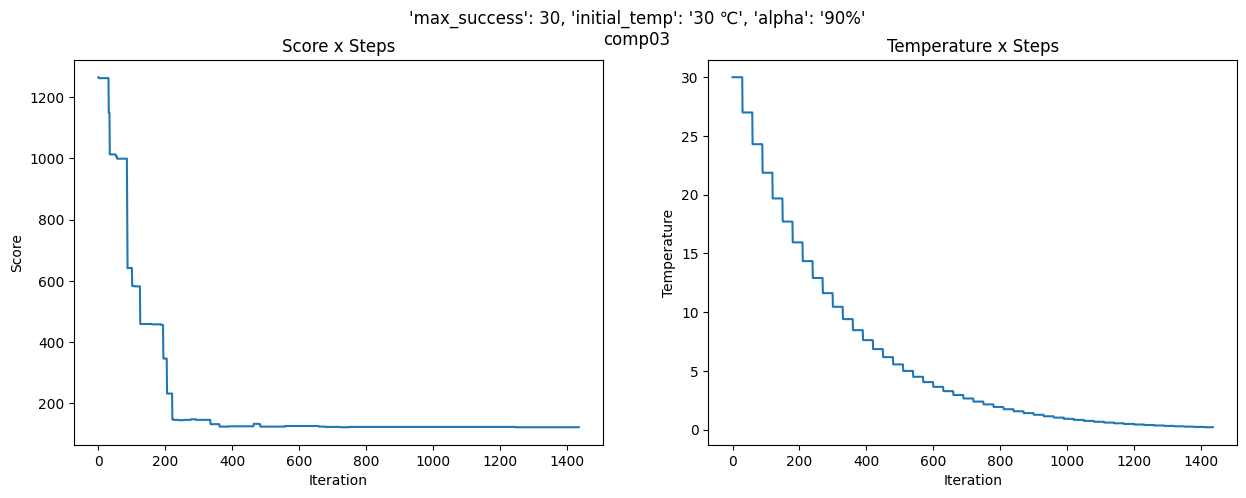

Score: 24


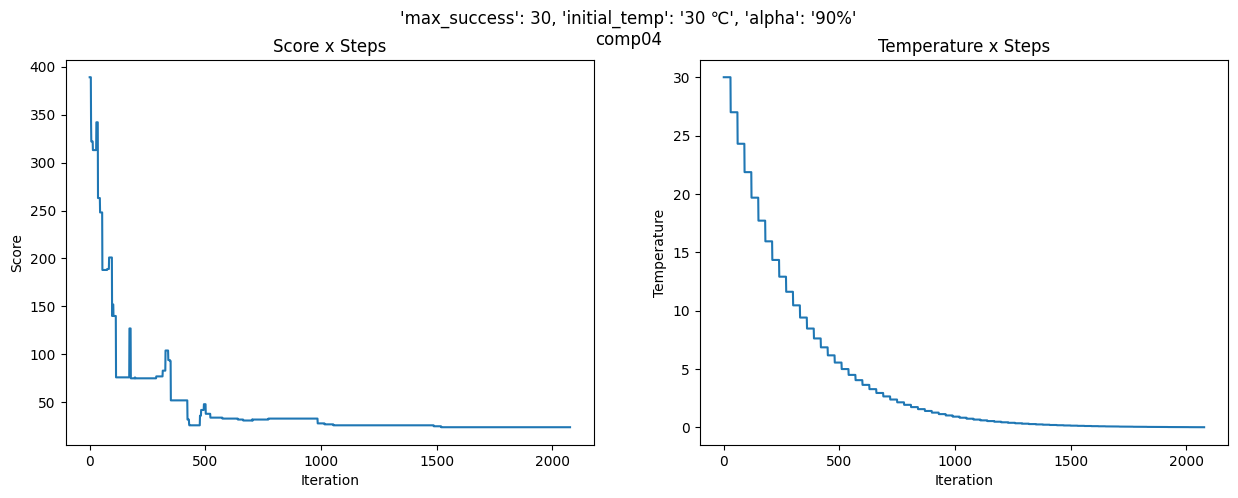

Score: 239


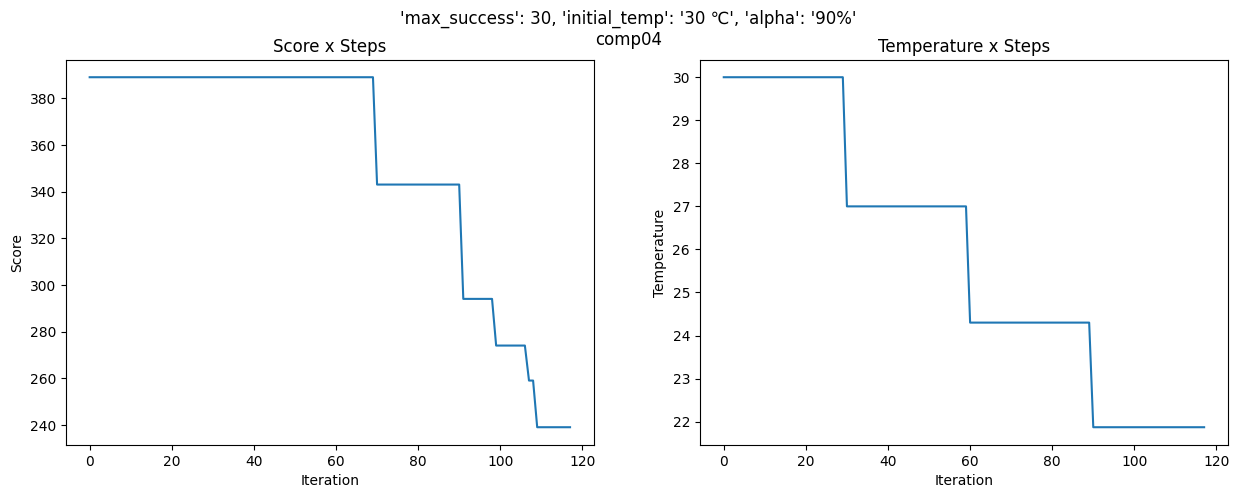

Score: 24


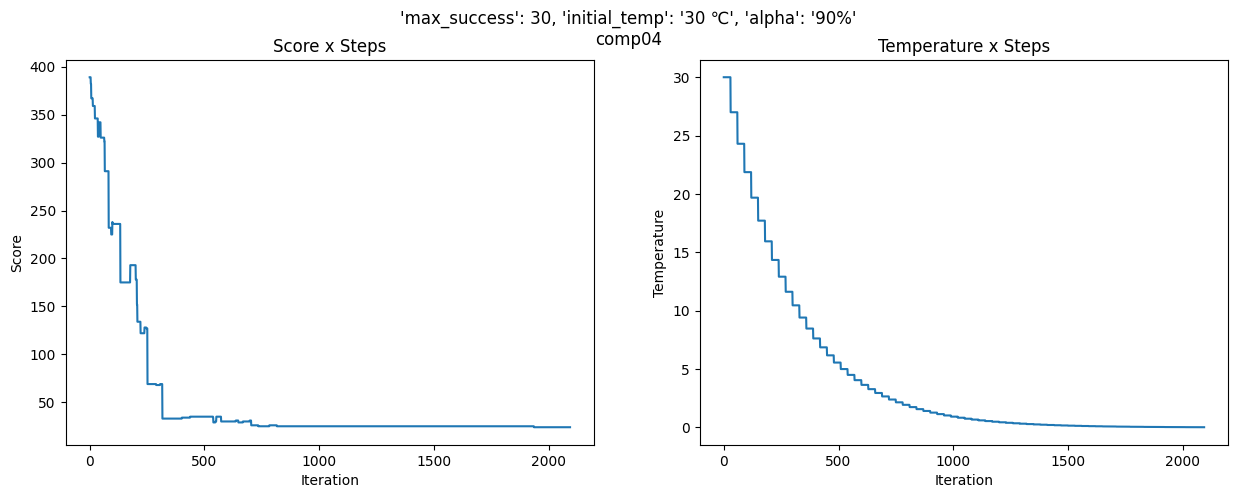

Score: 25


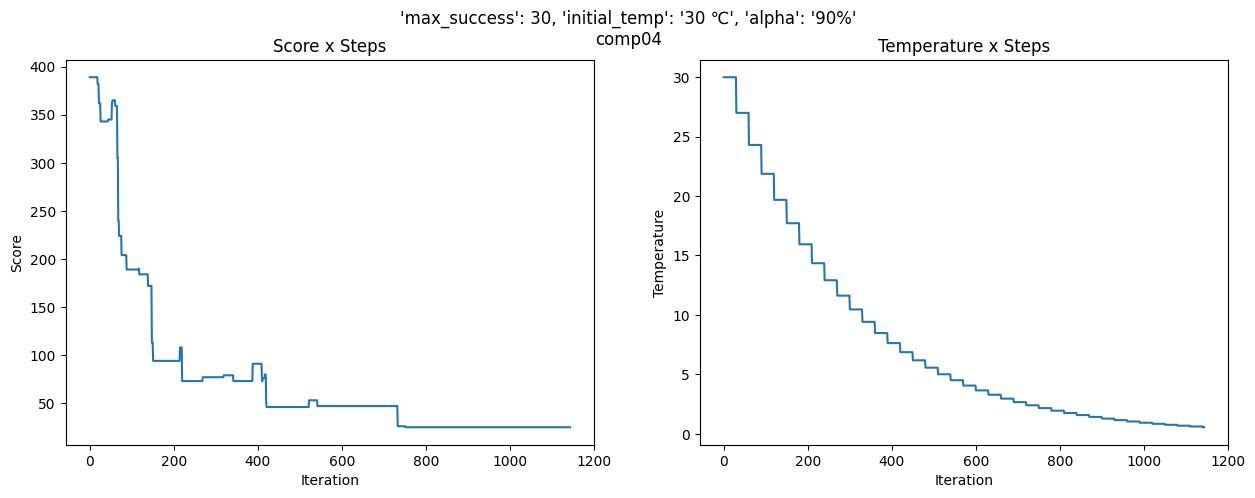

Score: 146


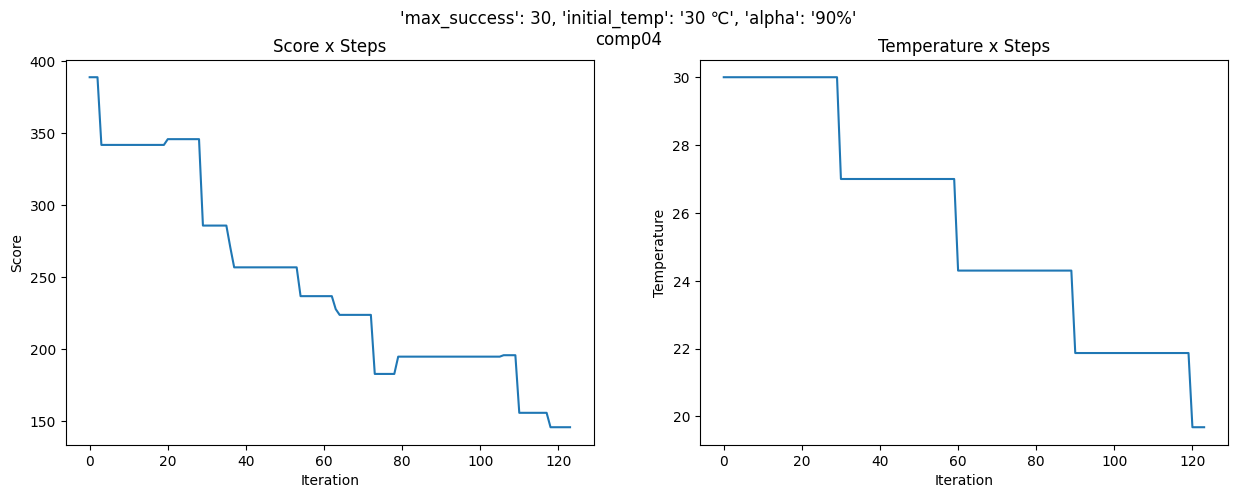

Score: 30


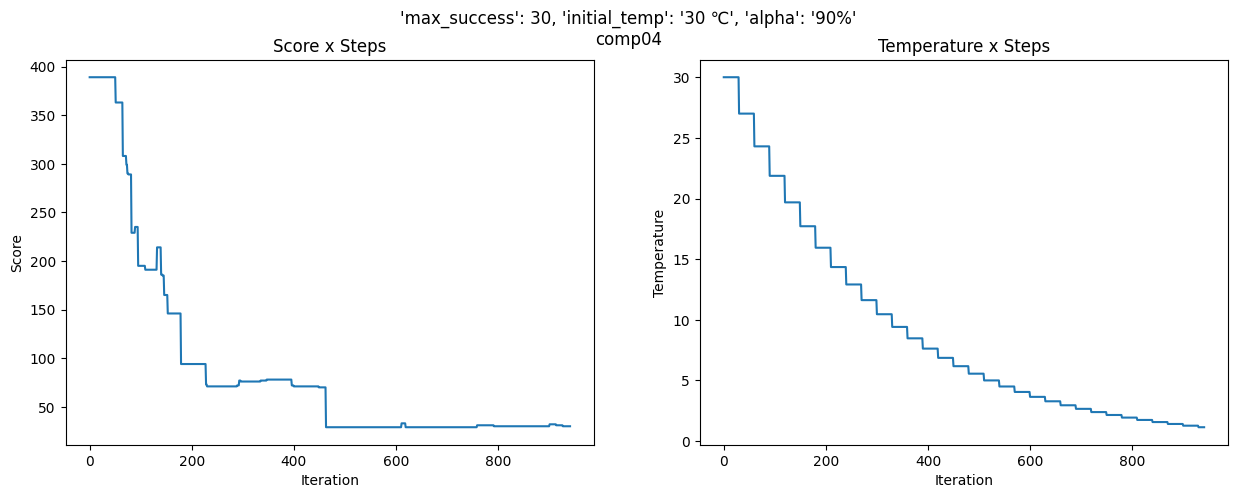

Score: 114


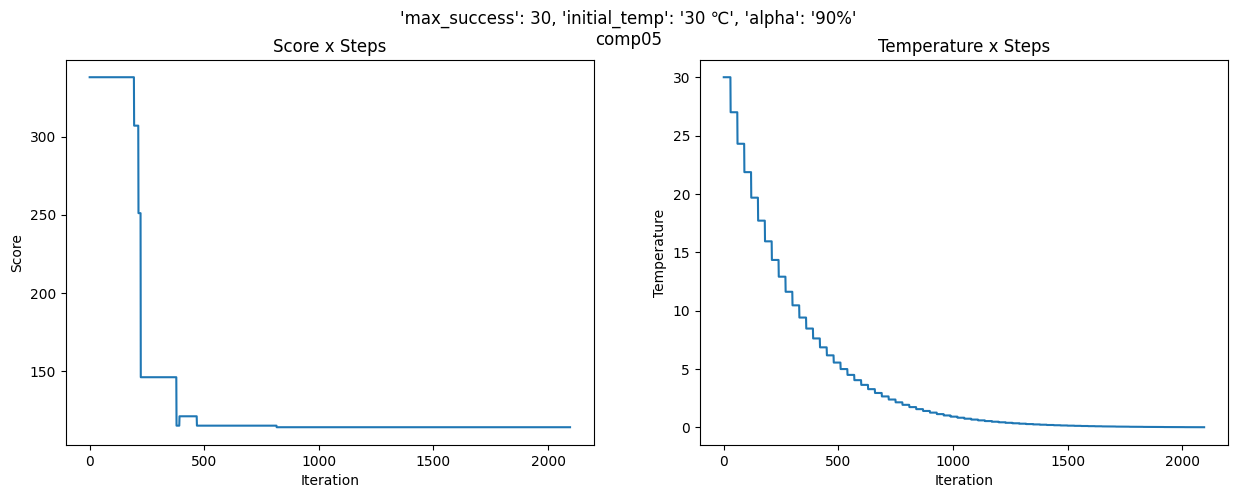

Score: 277


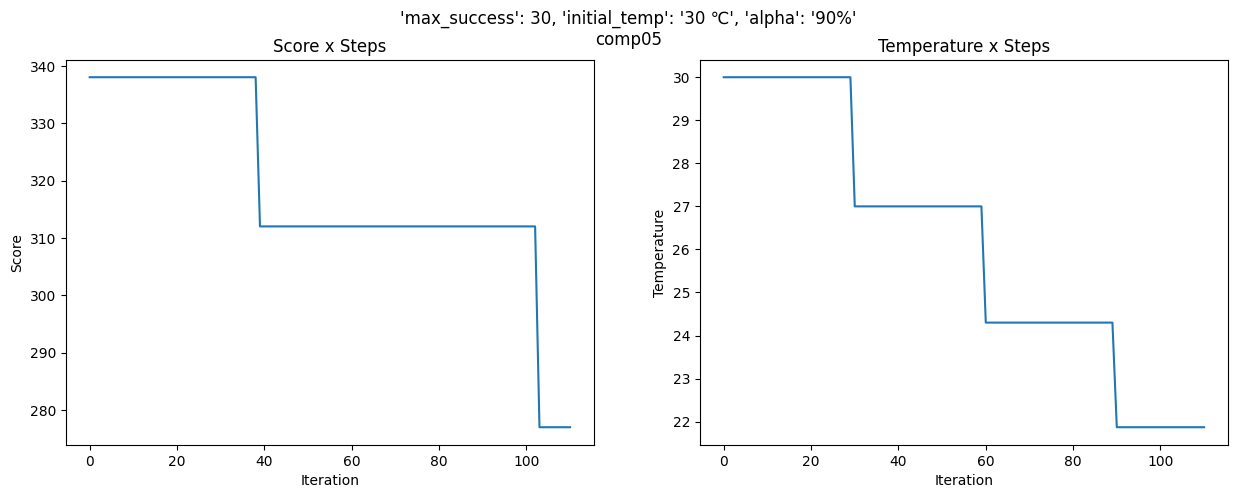

Score: 114


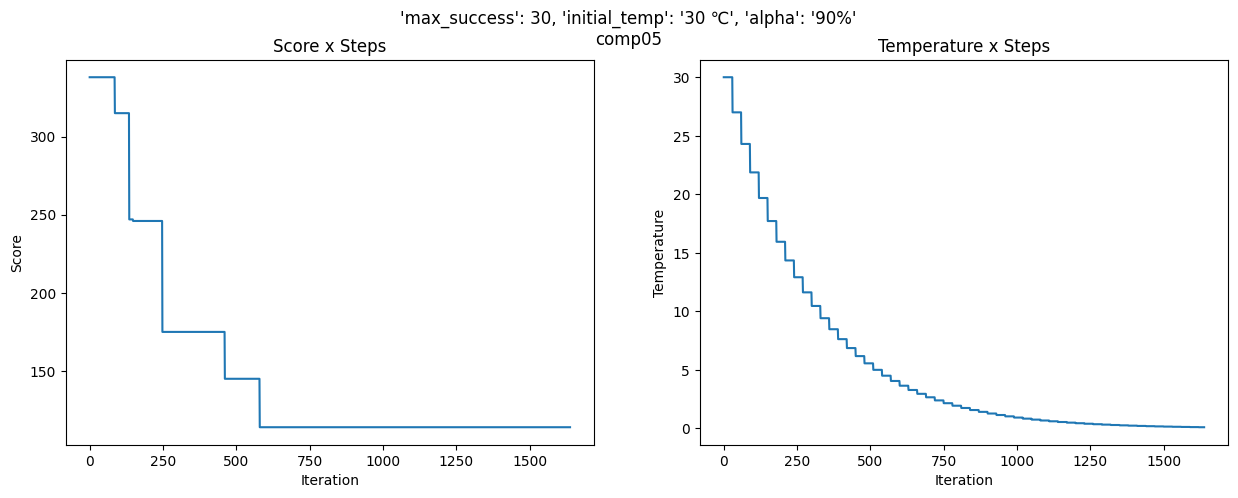

Score: 152


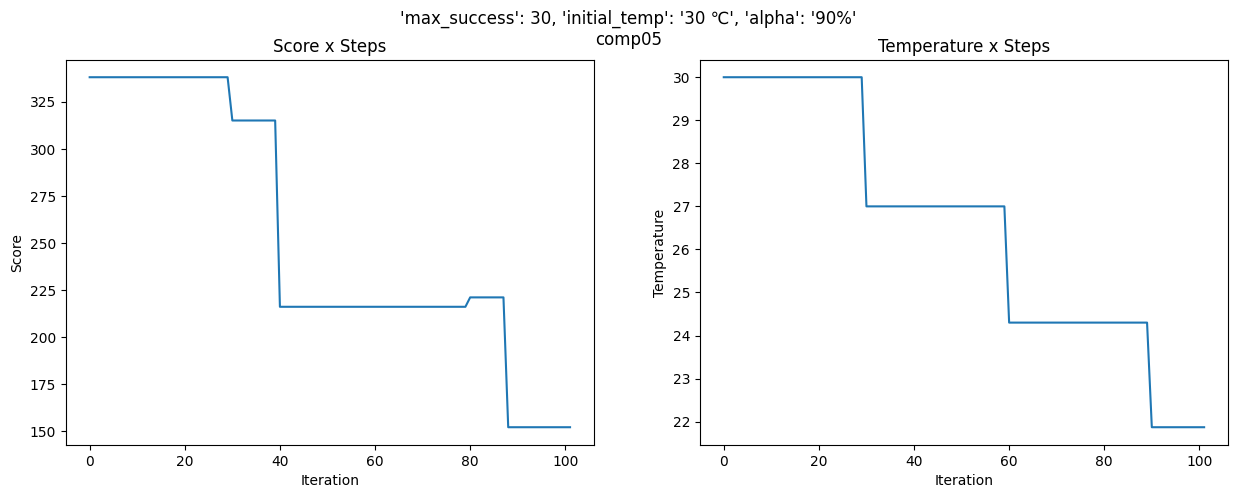

Score: 282


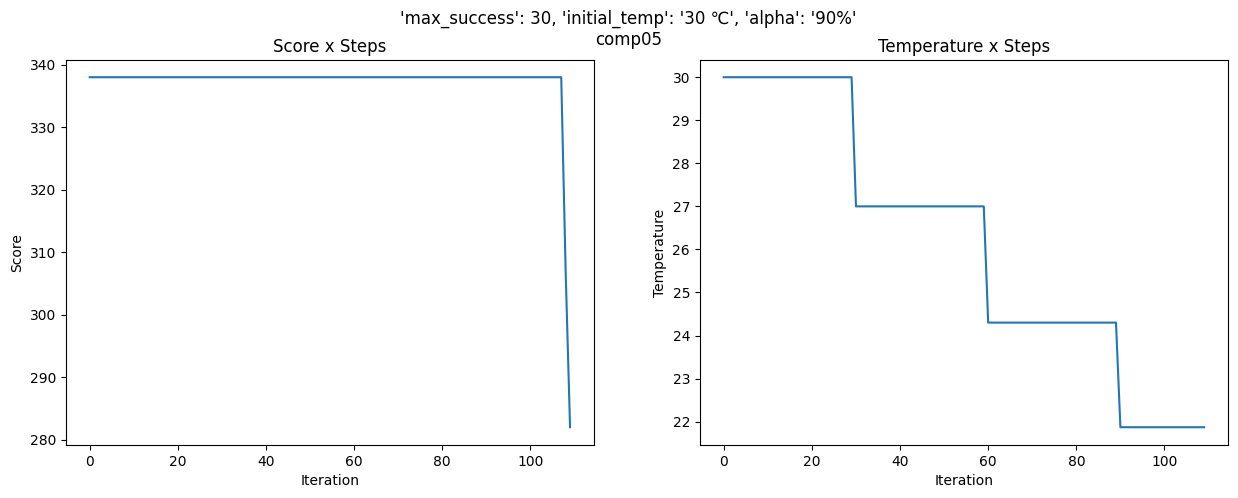

Score: 76


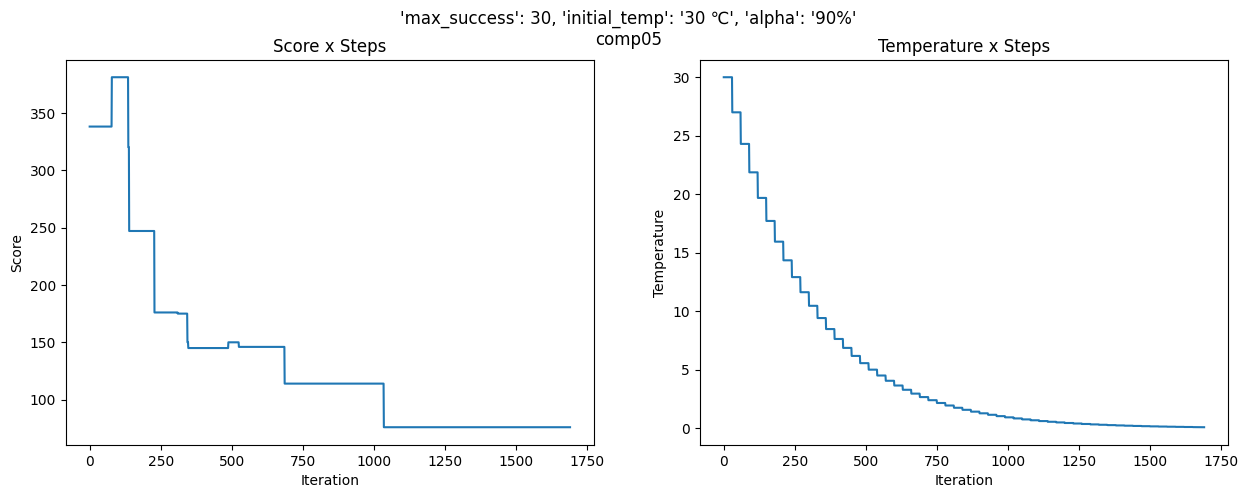

Score: 364


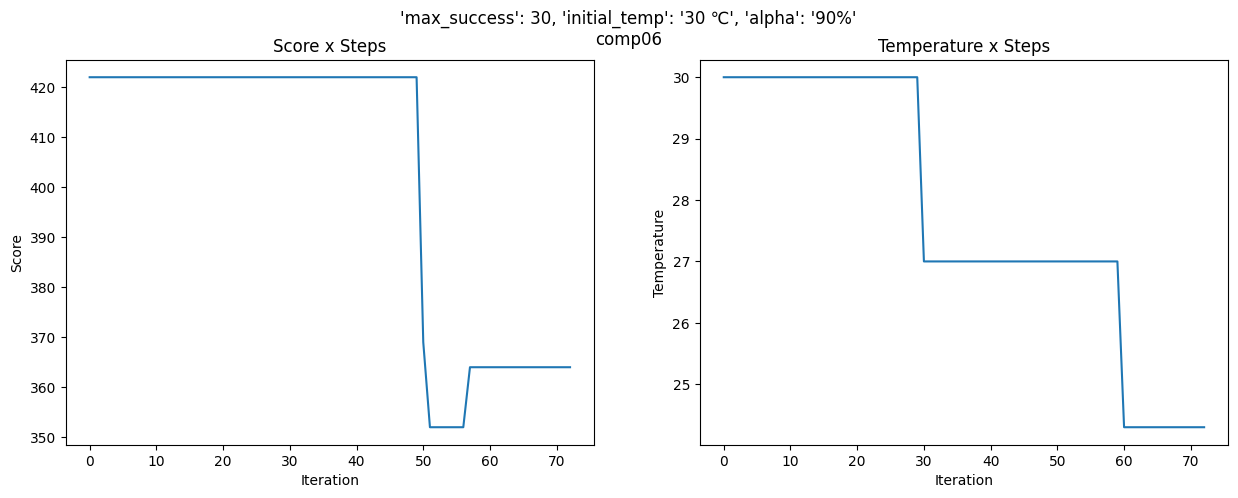

Score: 28


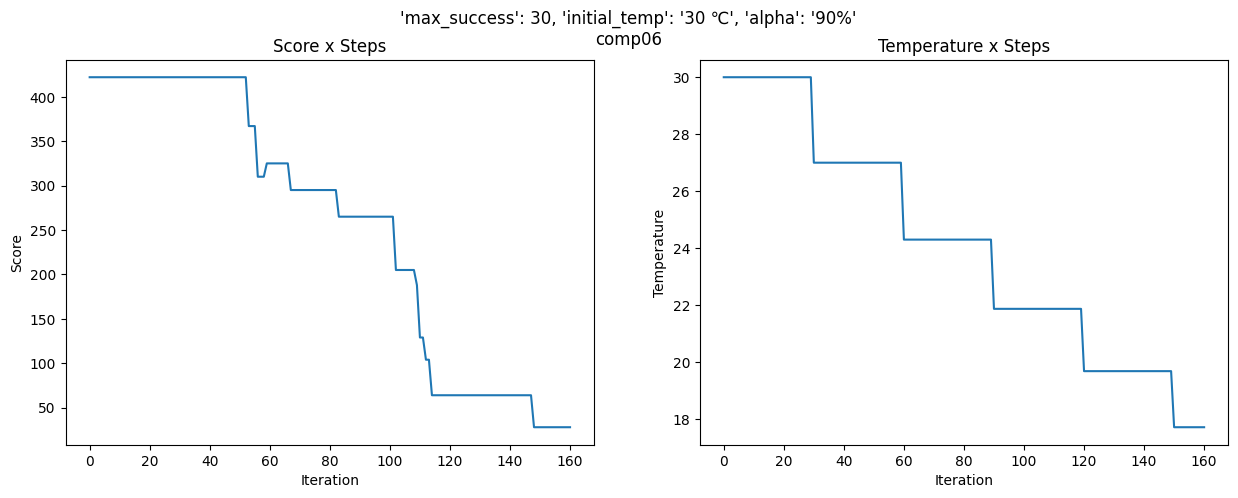

Score: 13


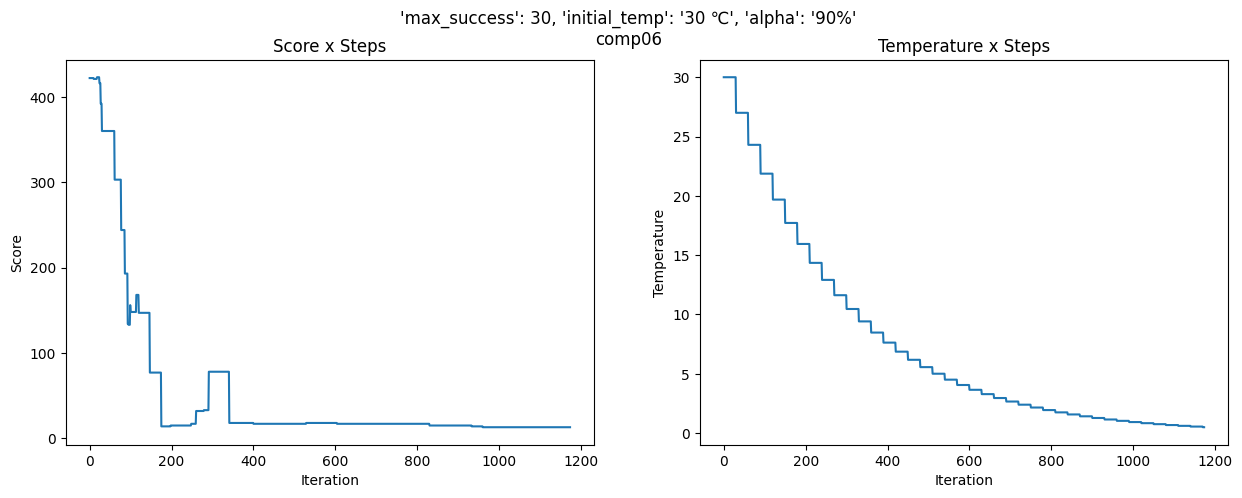

Score: 37


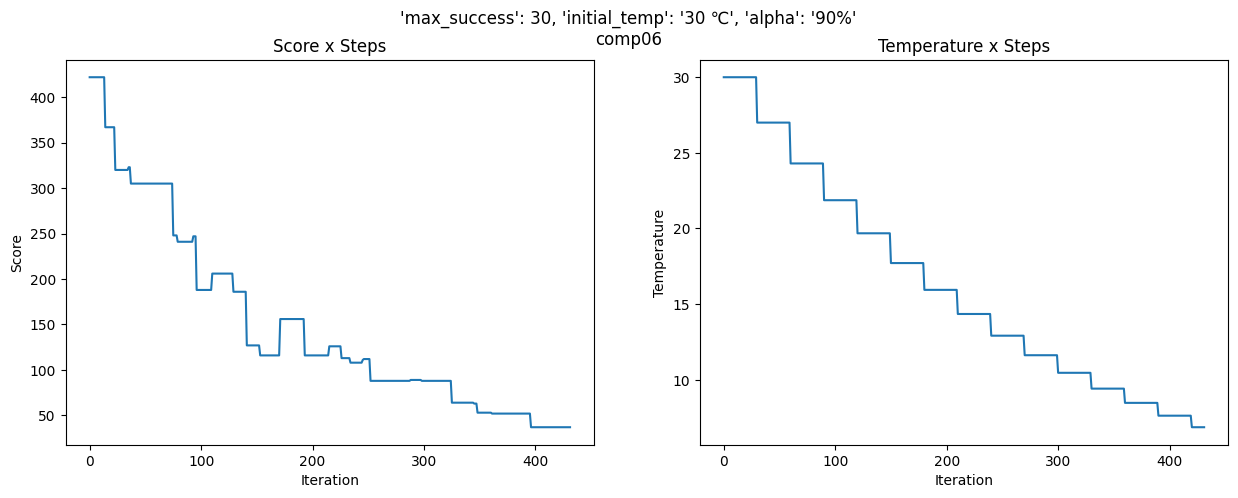

Score: 77


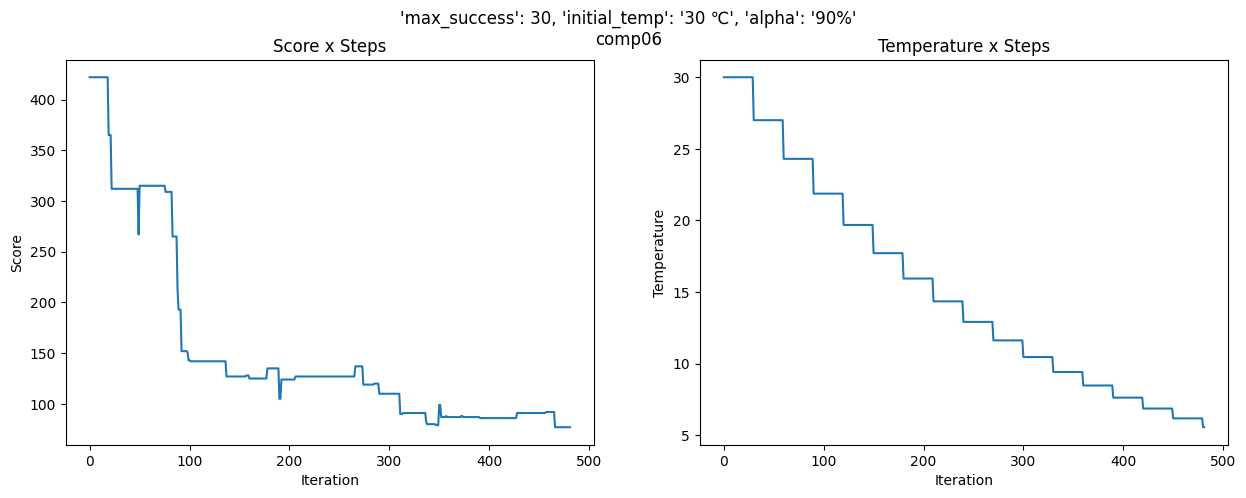

Score: 15


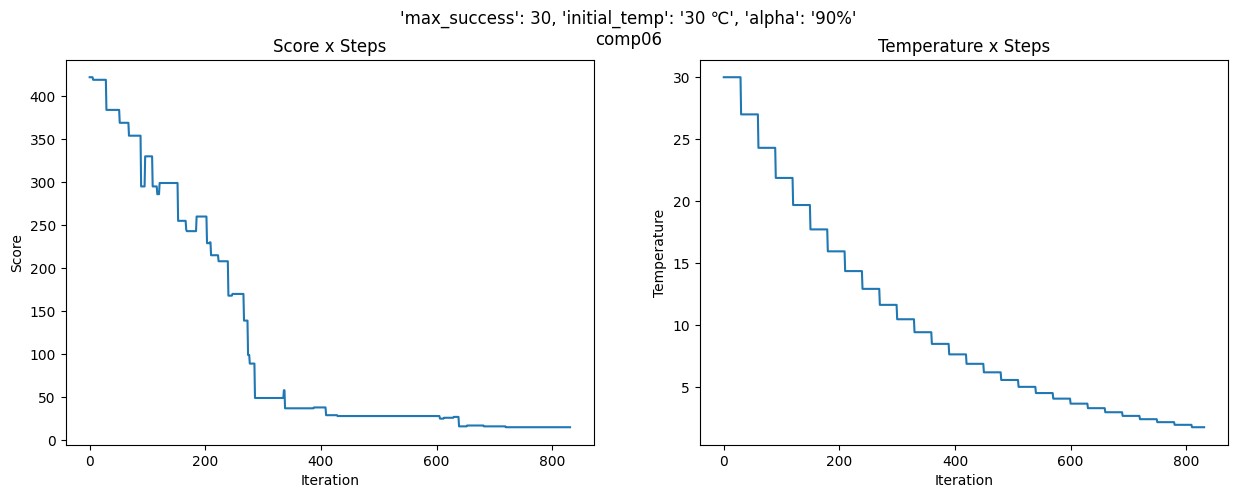

Score: 304


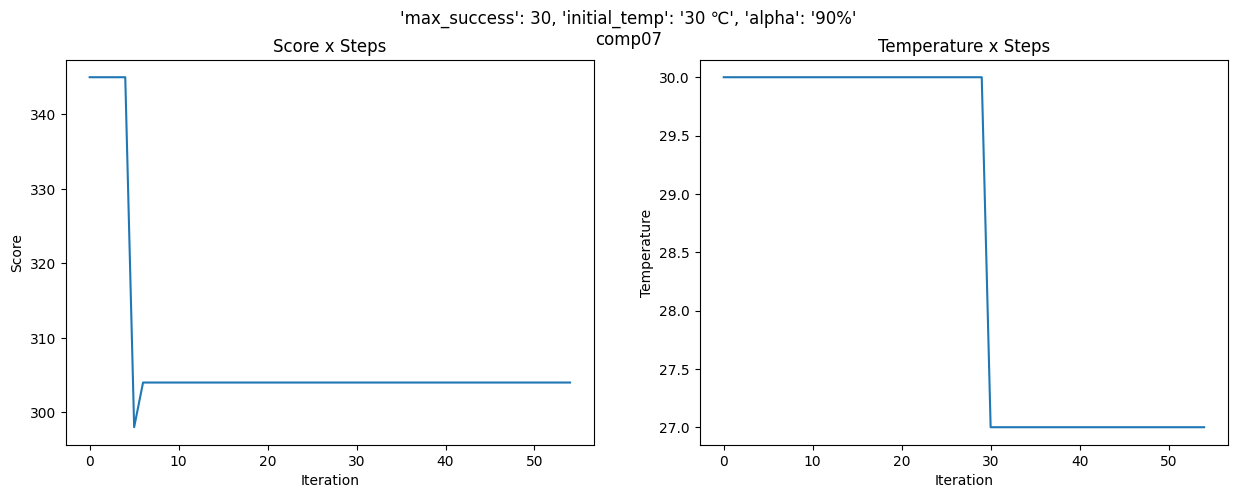

Score: 267


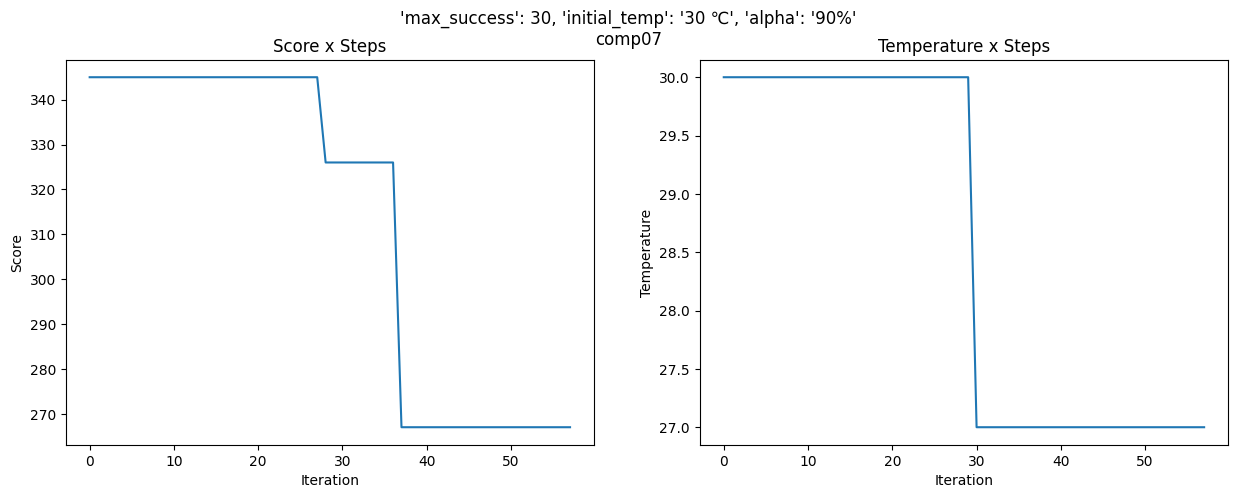

Score: 41


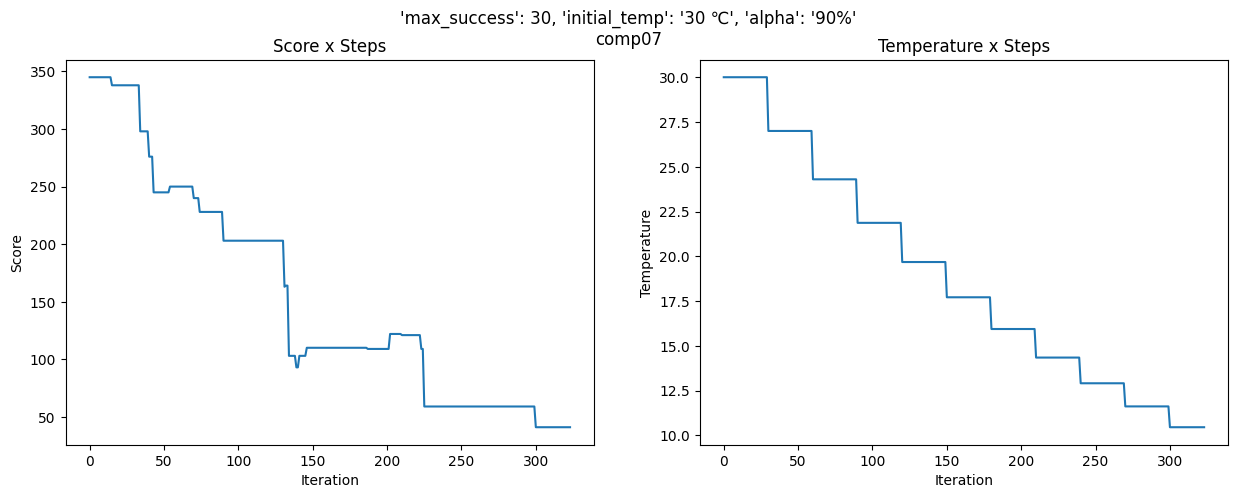

Score: 107


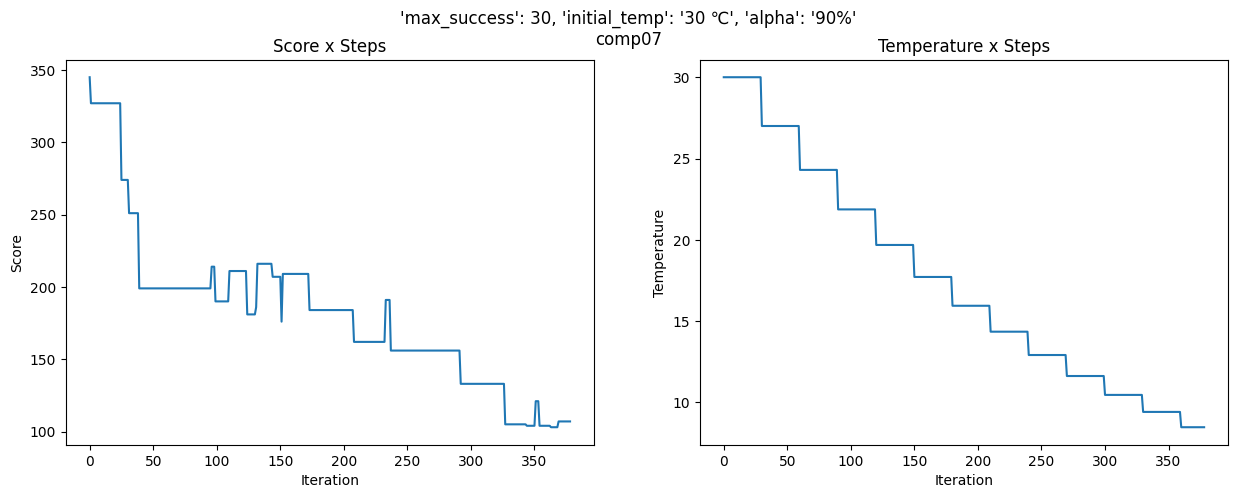

Score: 42


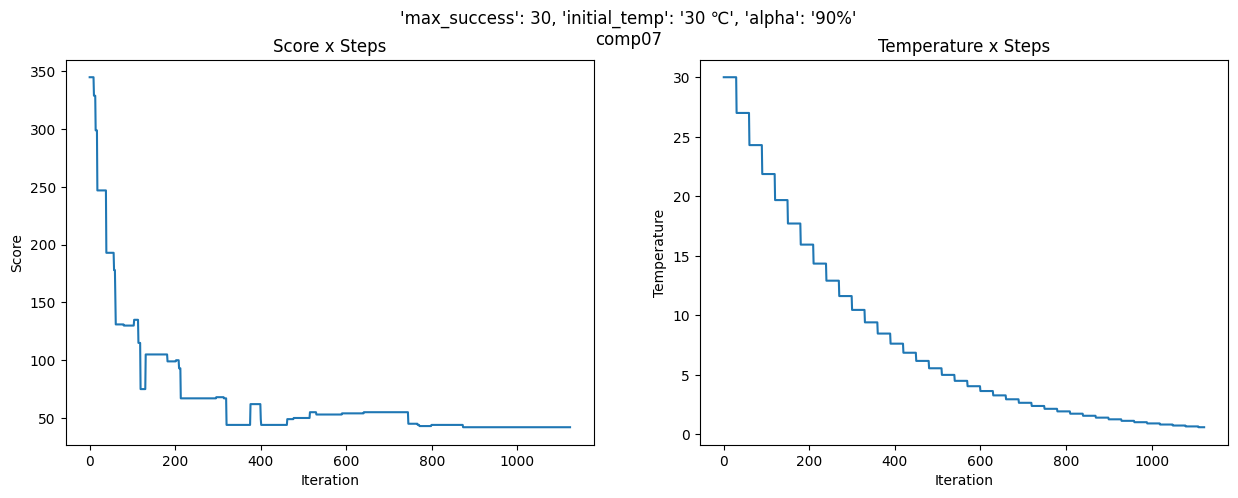

Score: 44


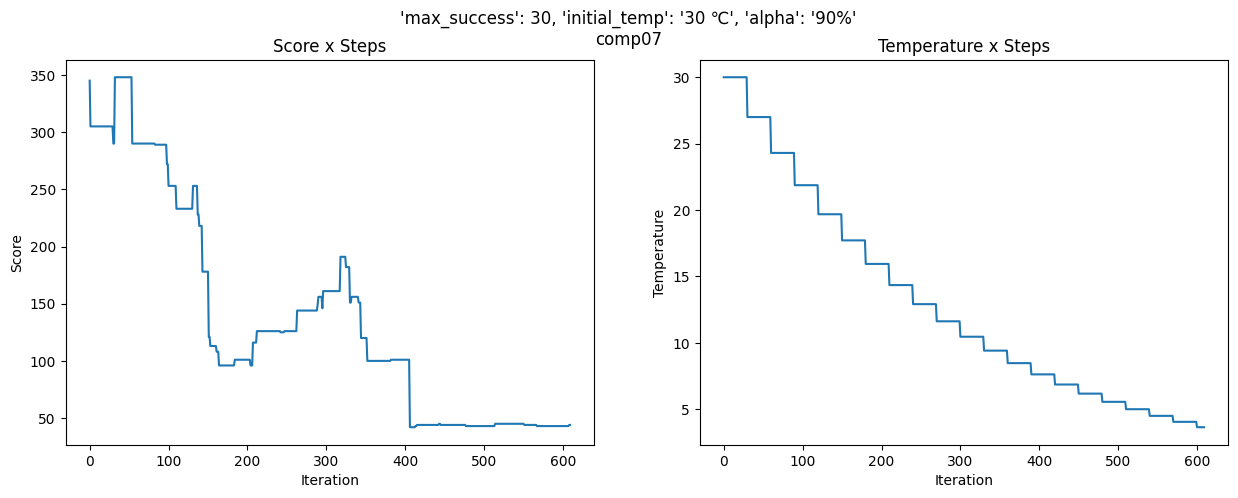

Score: 319


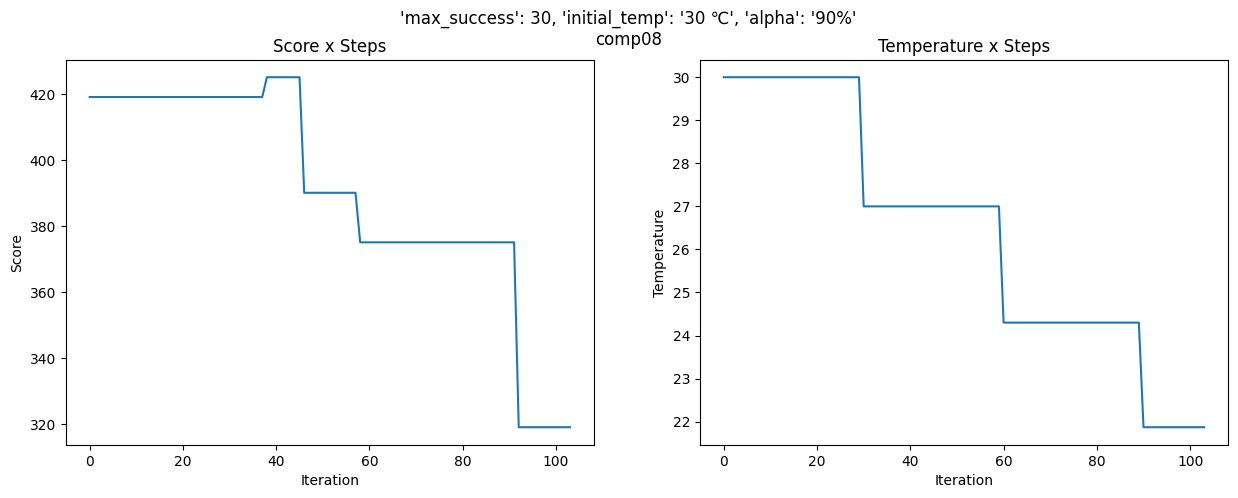

Score: 245


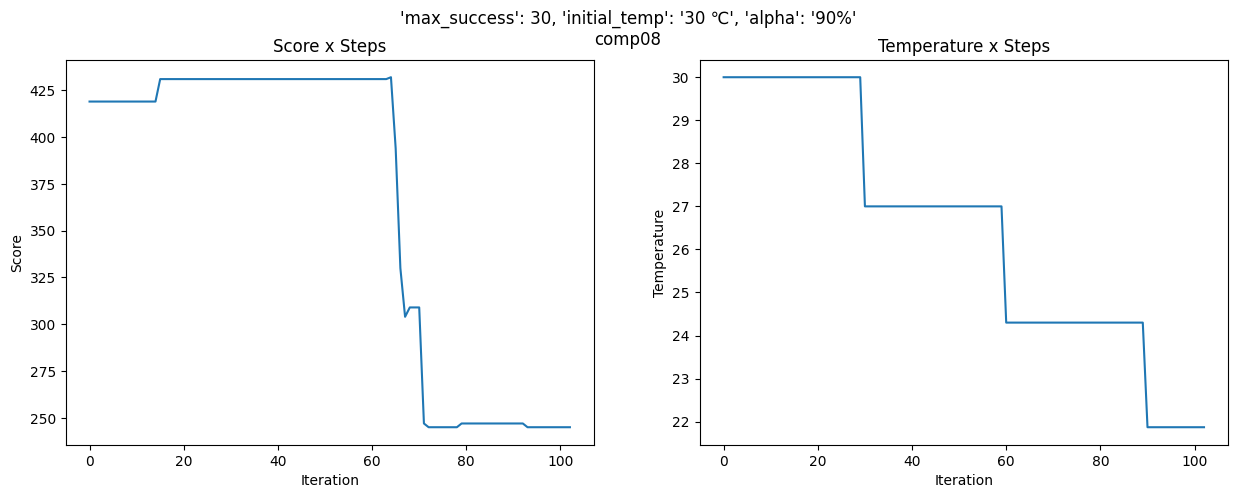

Score: 39


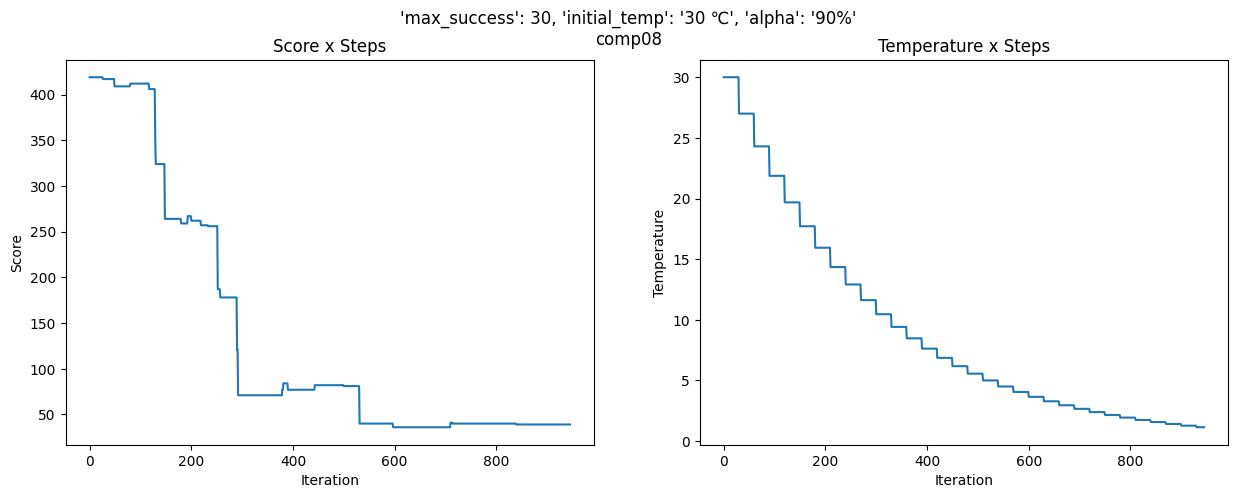

Score: 156


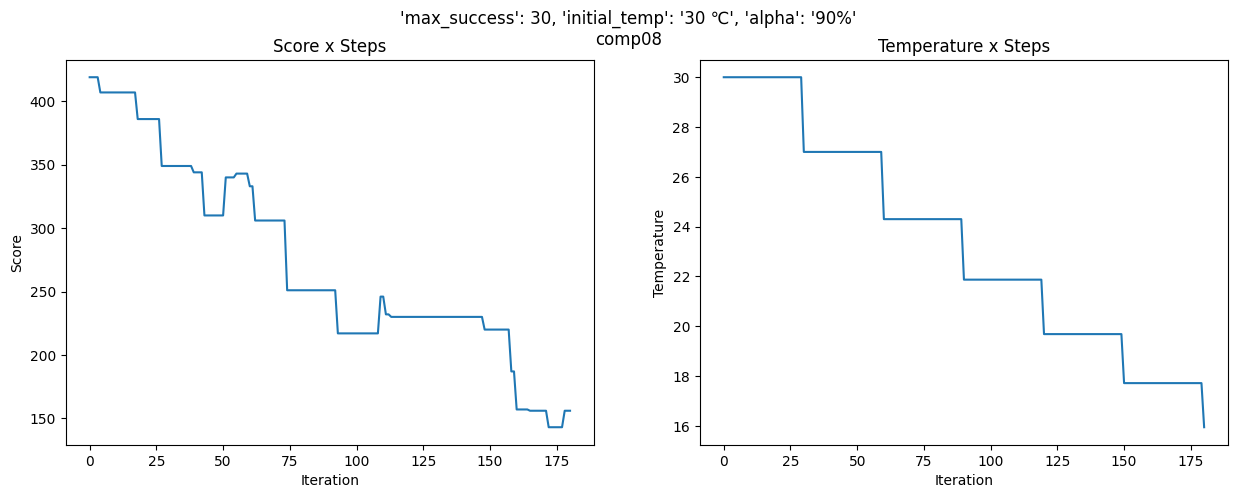

Score: 82


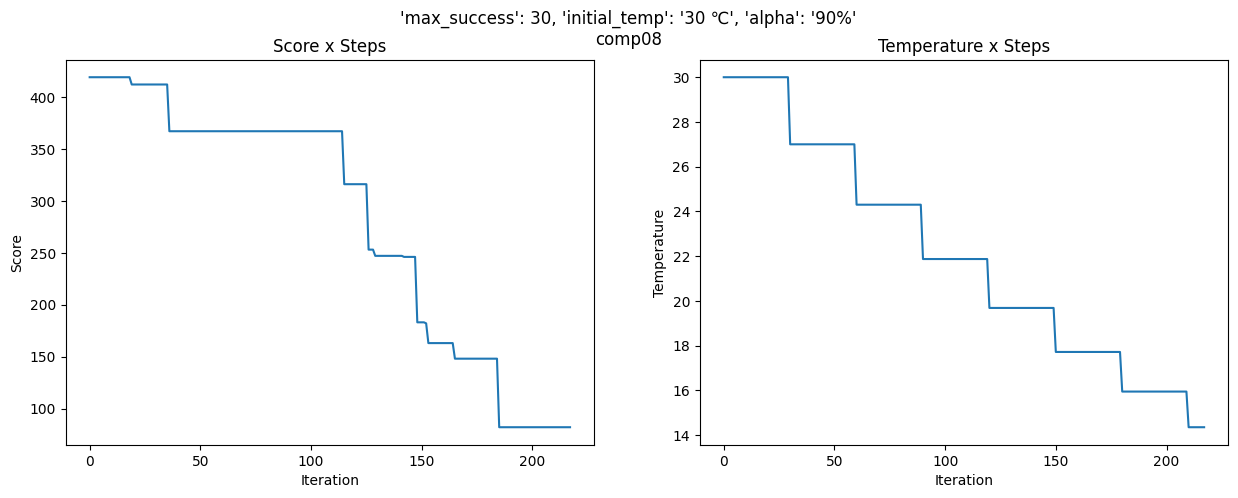

Score: 30


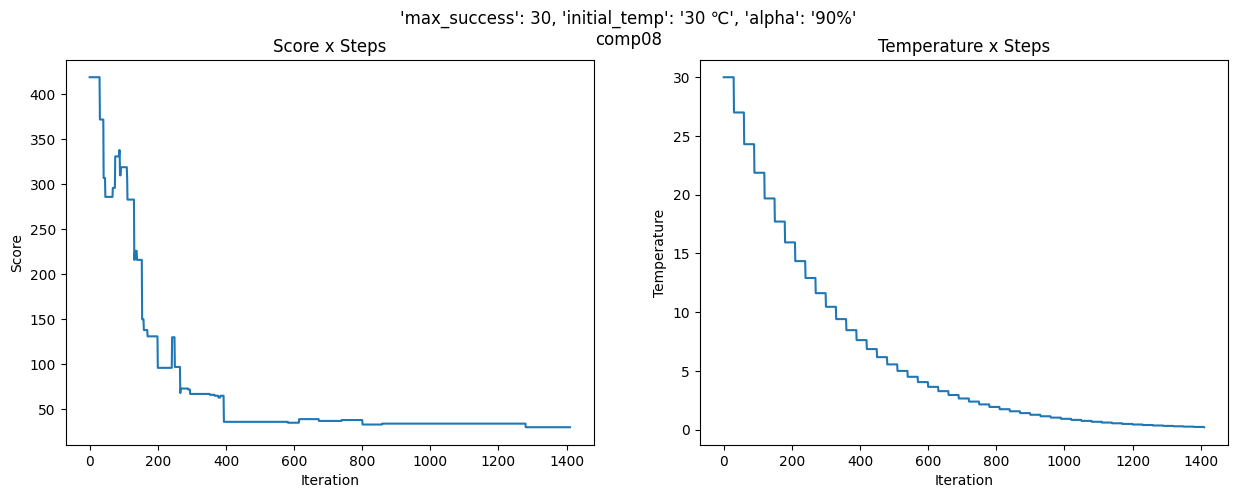

Score: 181


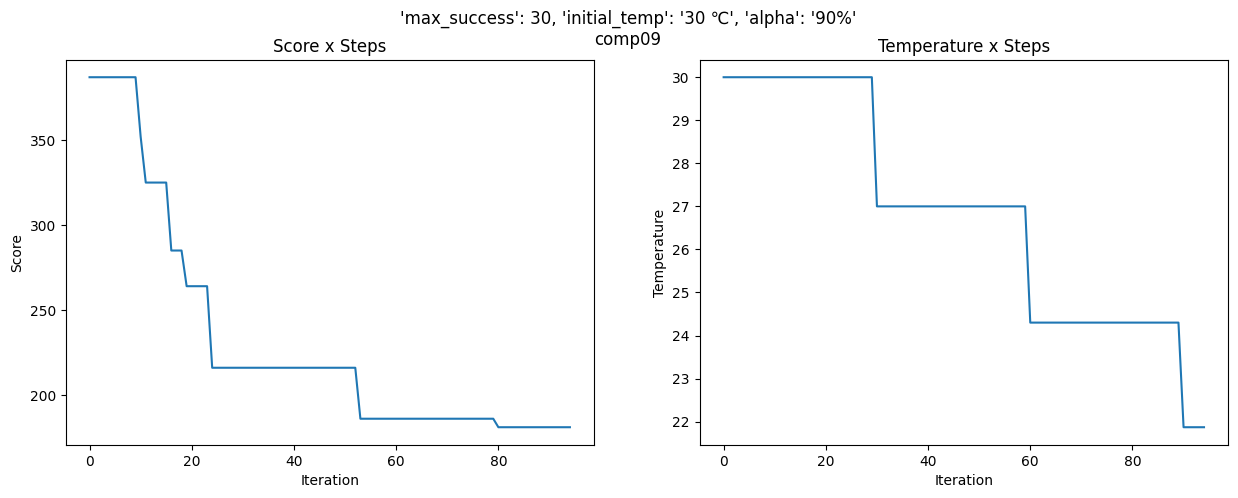

Score: 164


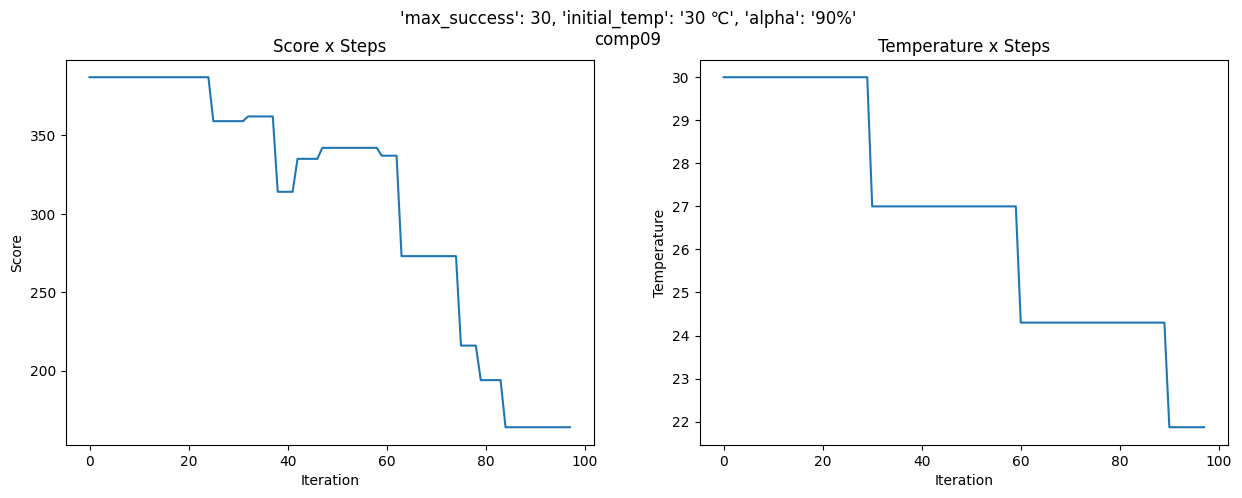

Score: 280


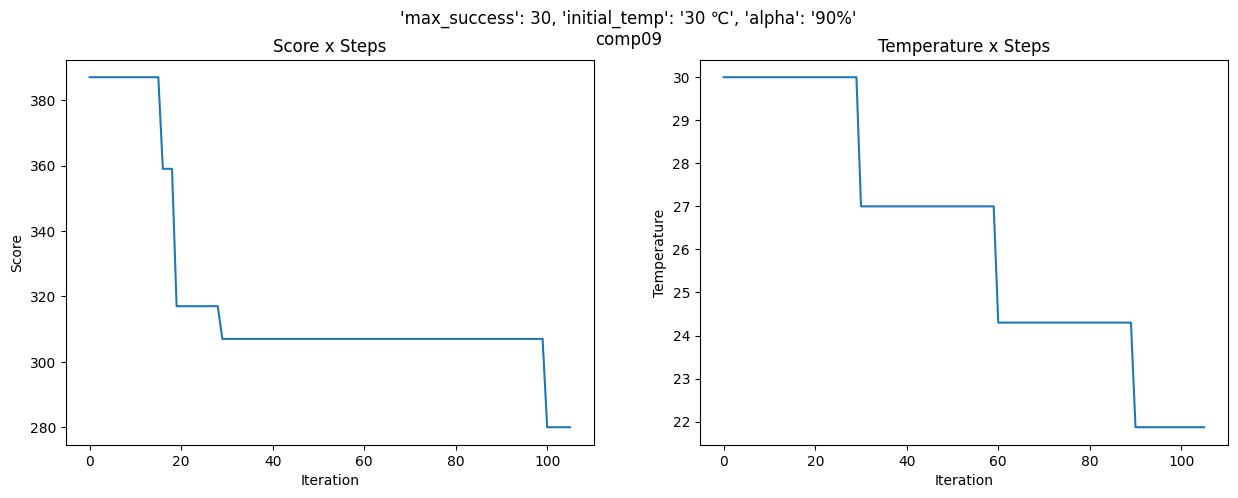

Score: 72


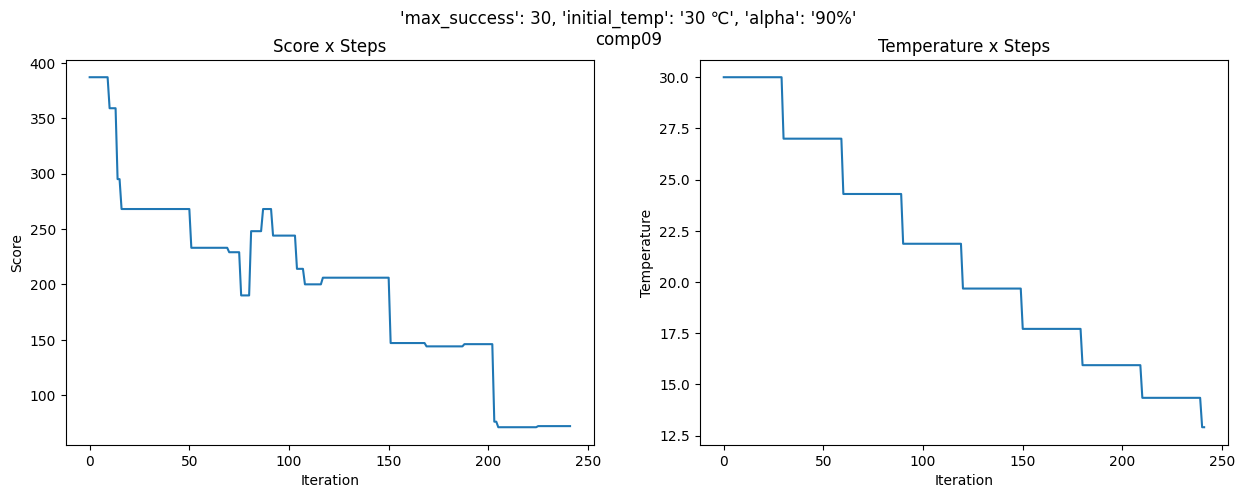

Score: 138


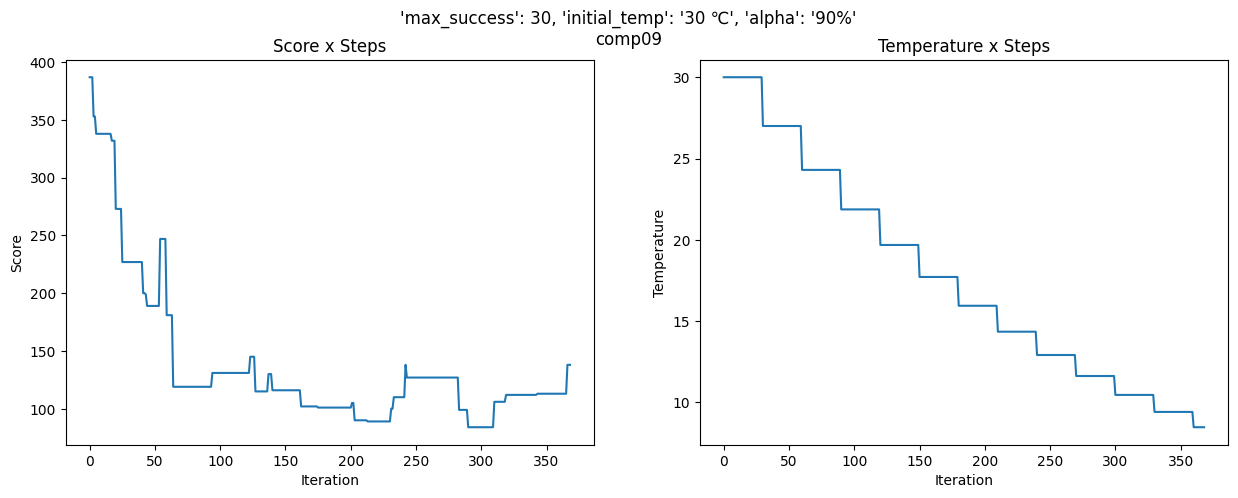

Score: 68


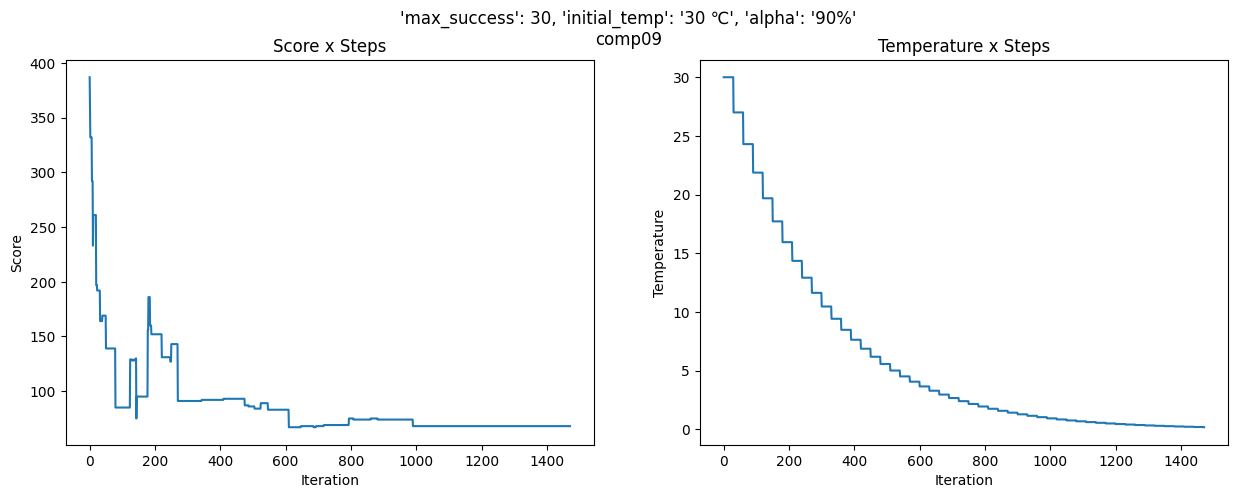

Score: 40


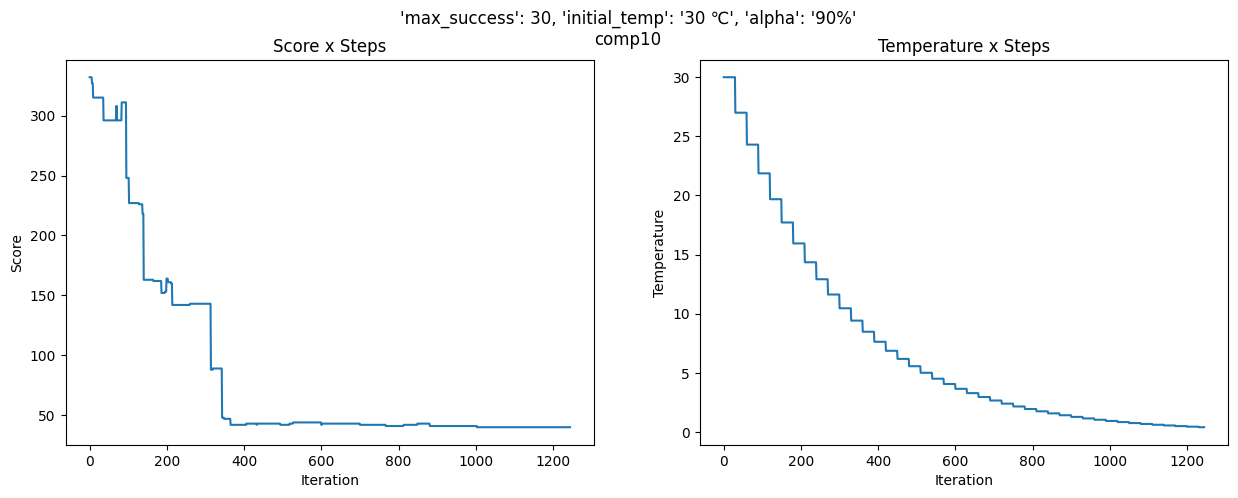

Score: 312


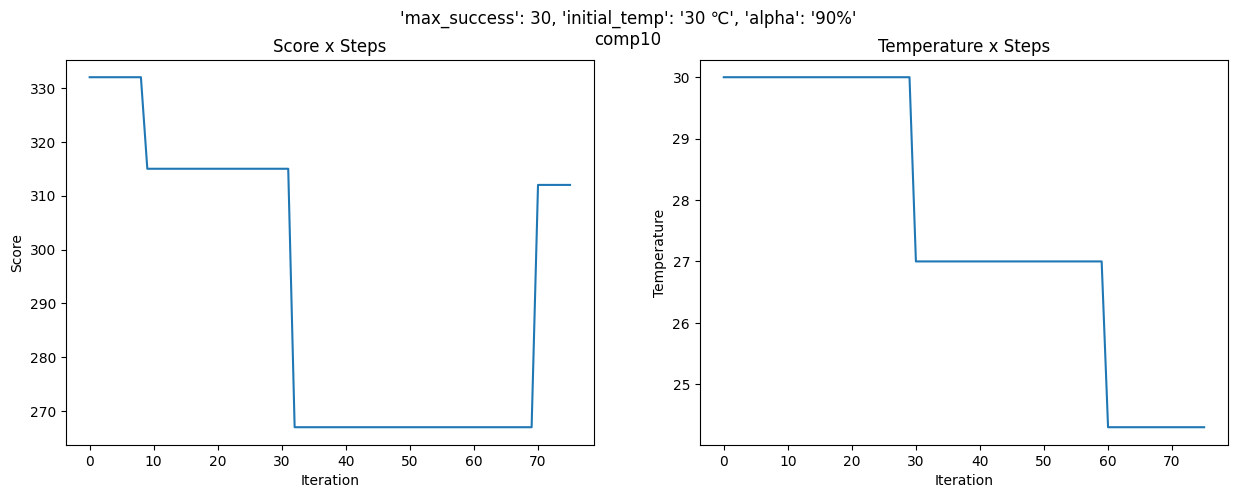

Score: 45


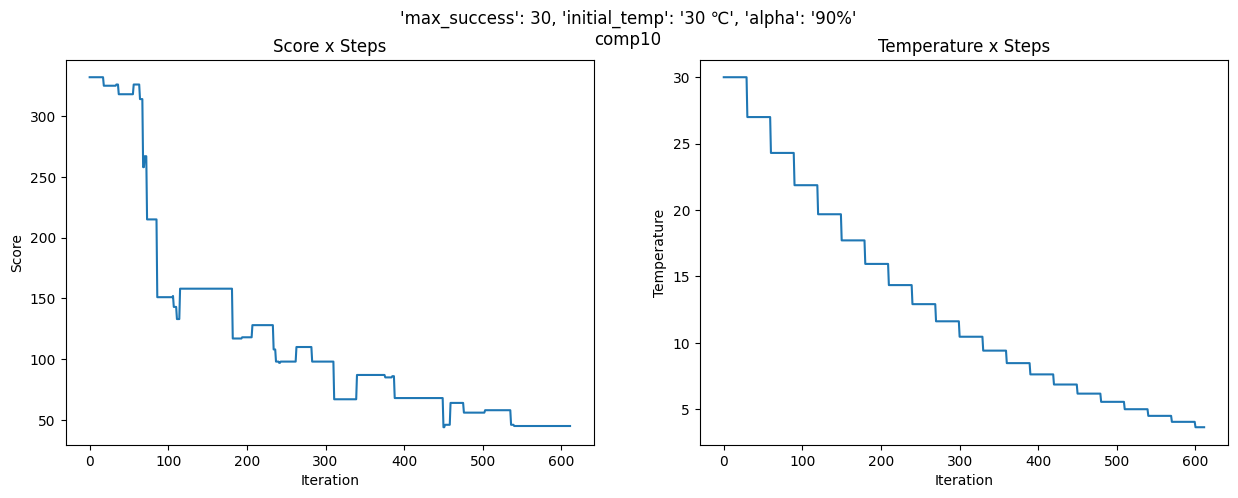

Score: 49


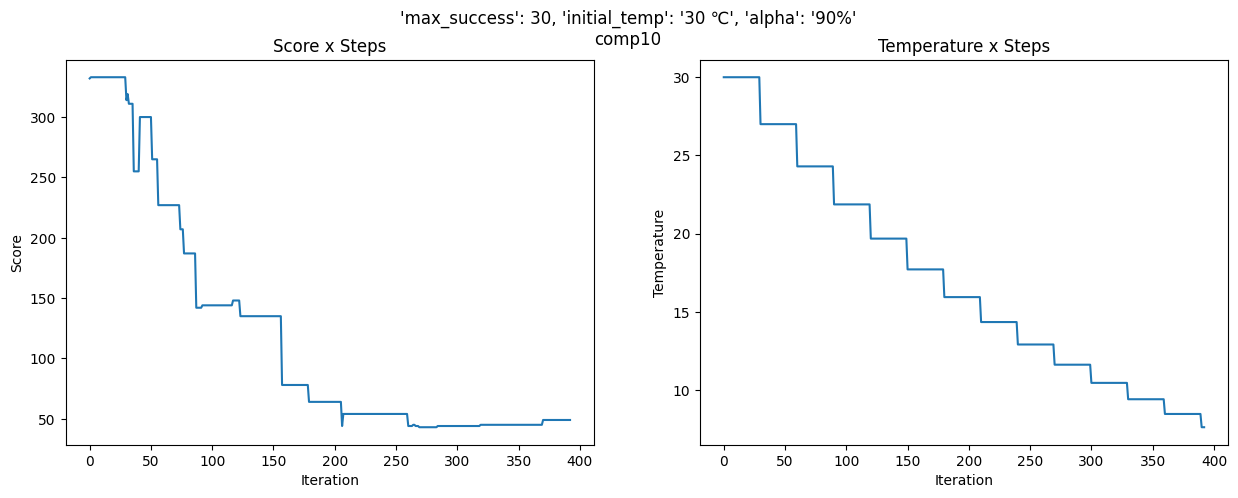

Score: 62


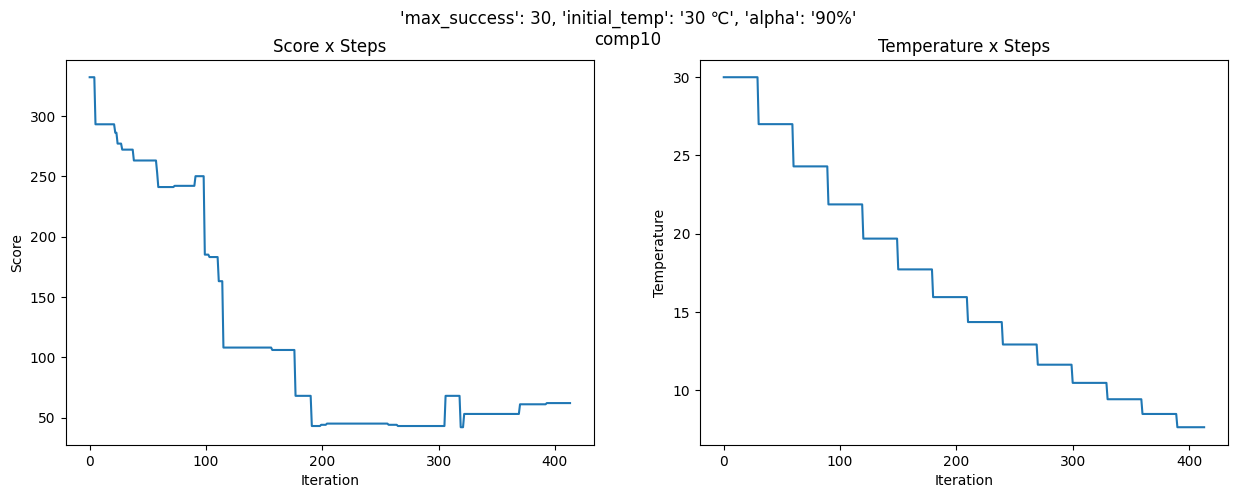

Score: 41


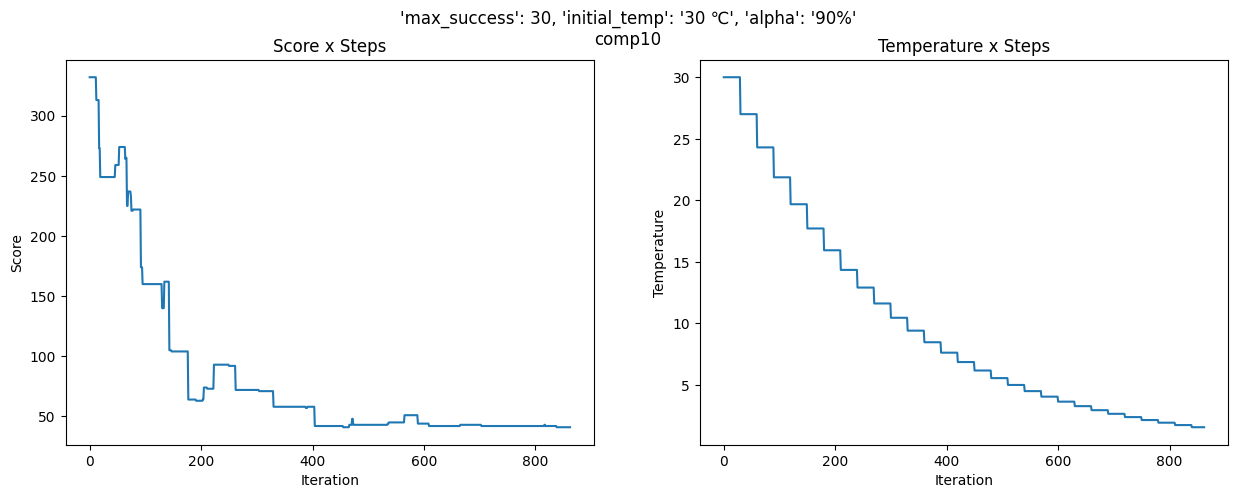

Score: 47


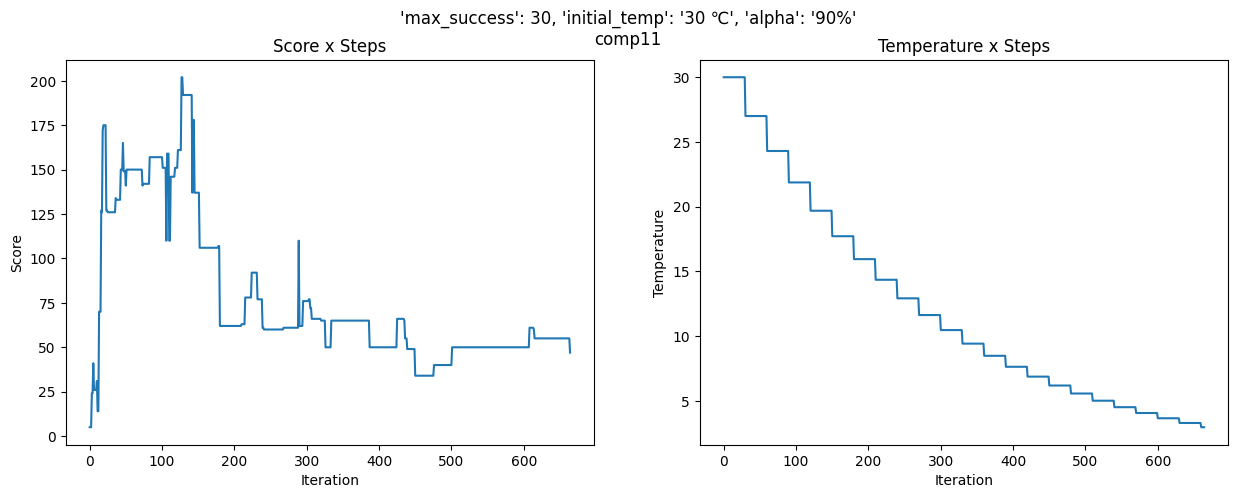

Score: 20


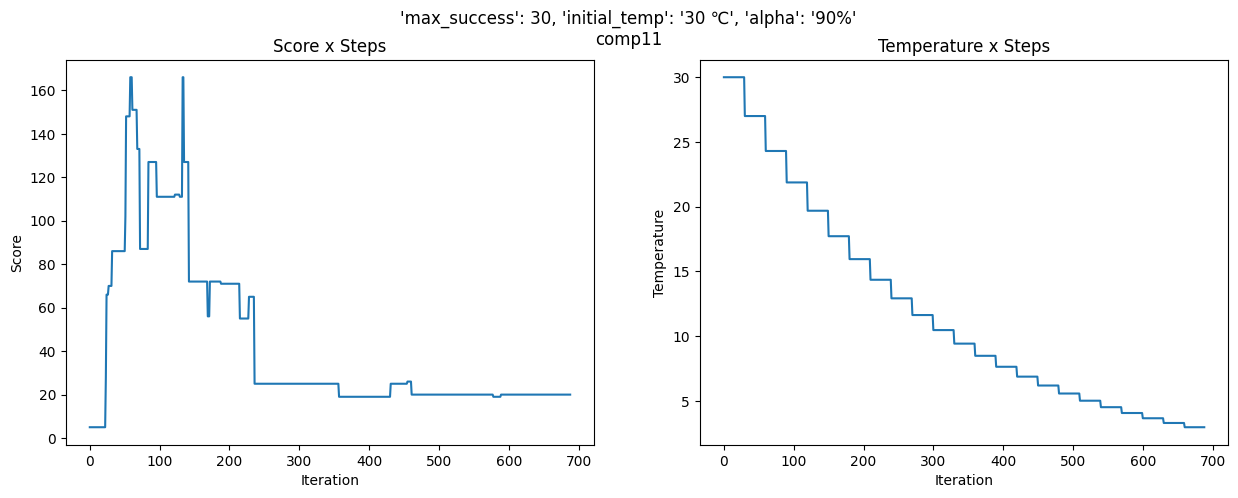

Score: 18


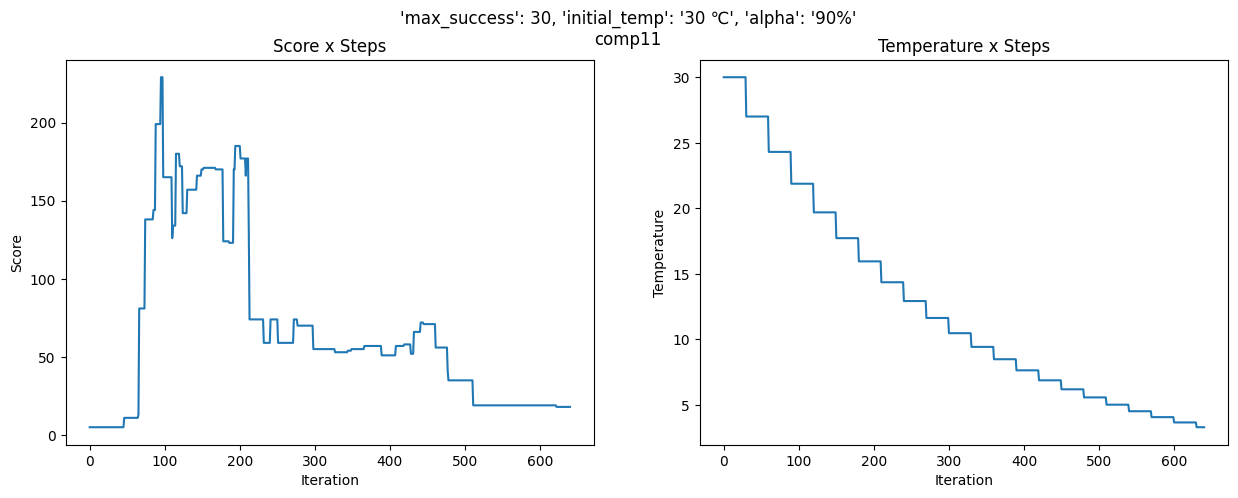

Score: 12


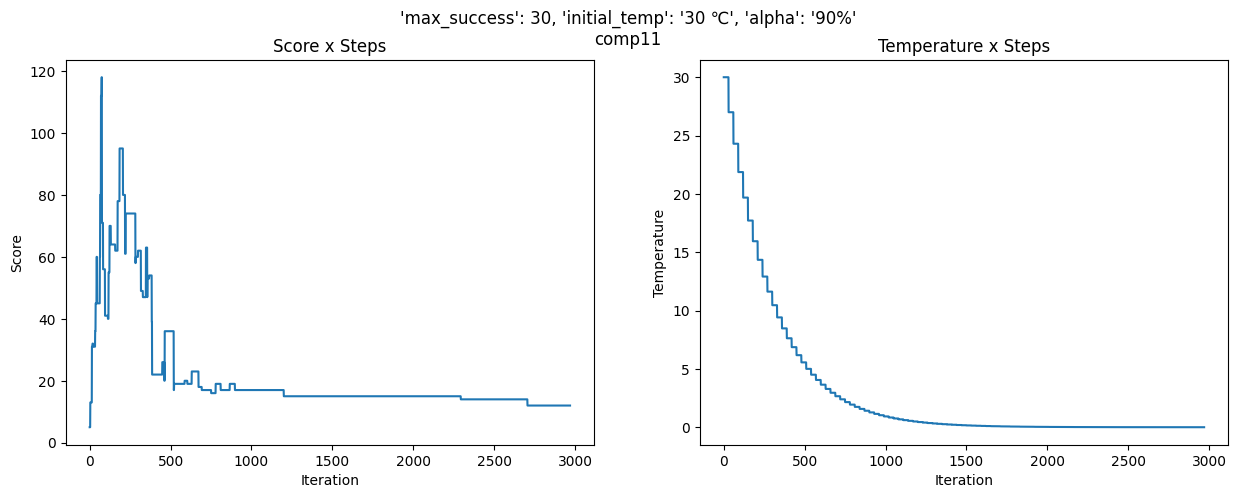

Score: 19


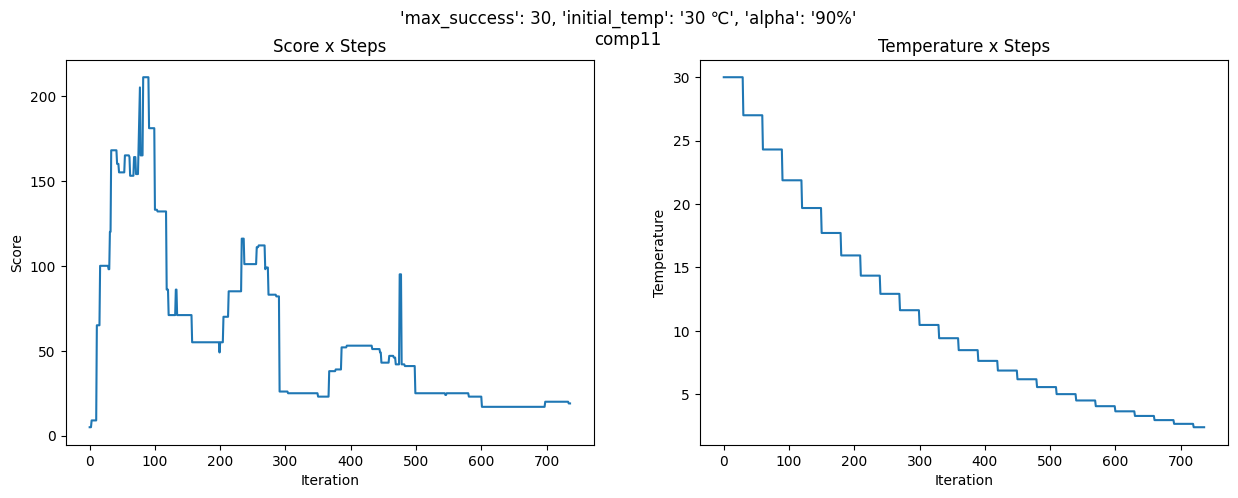

Score: 8


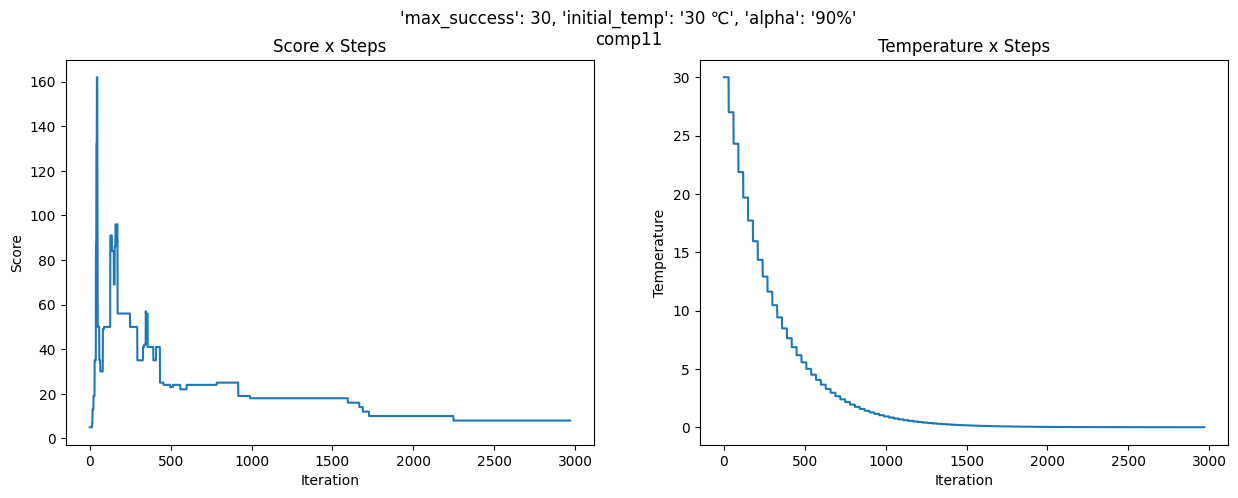

Score: 53


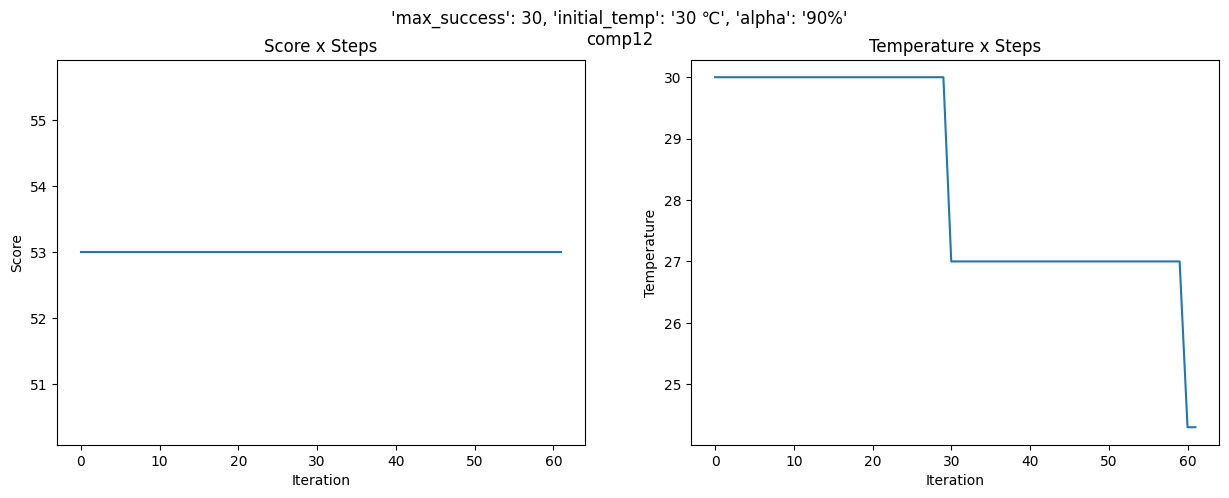

Score: 60


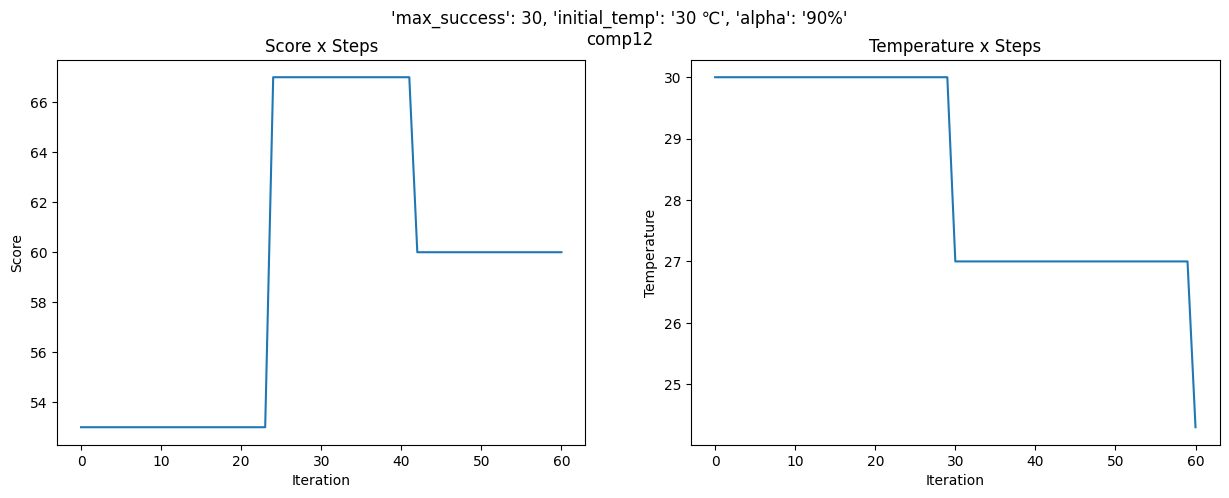

Score: 69


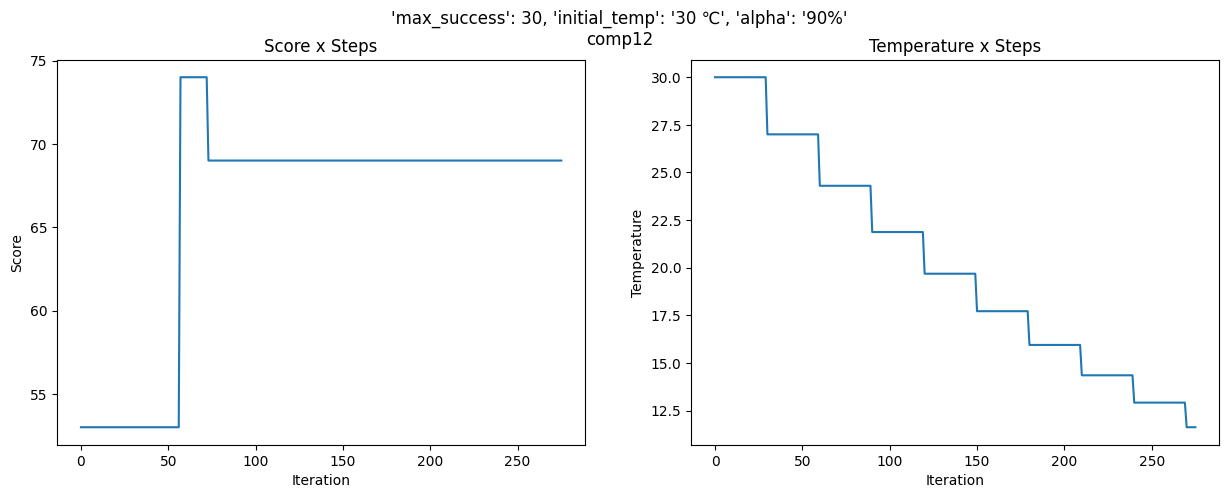

Score: 81


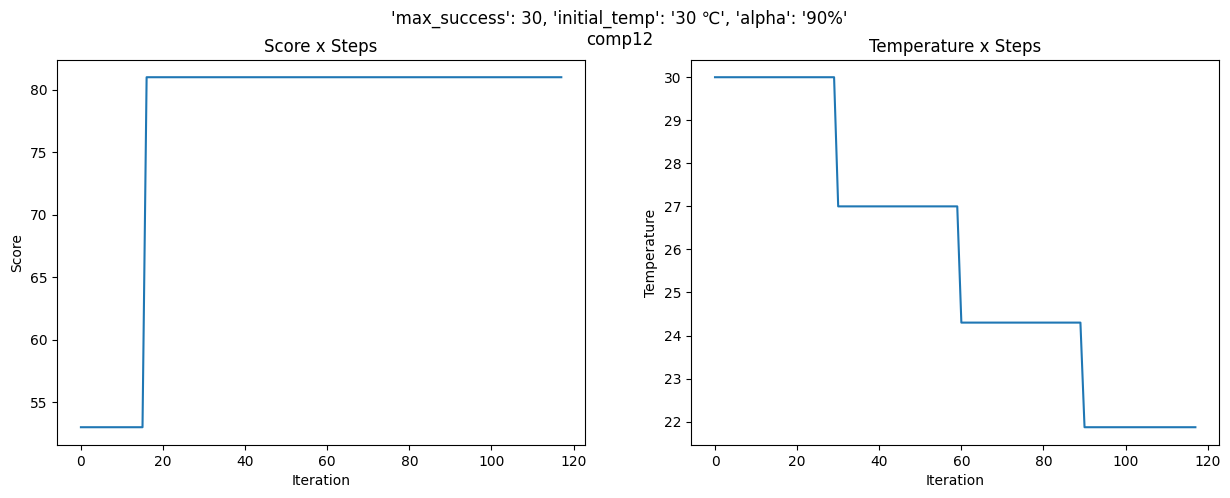

Score: 53


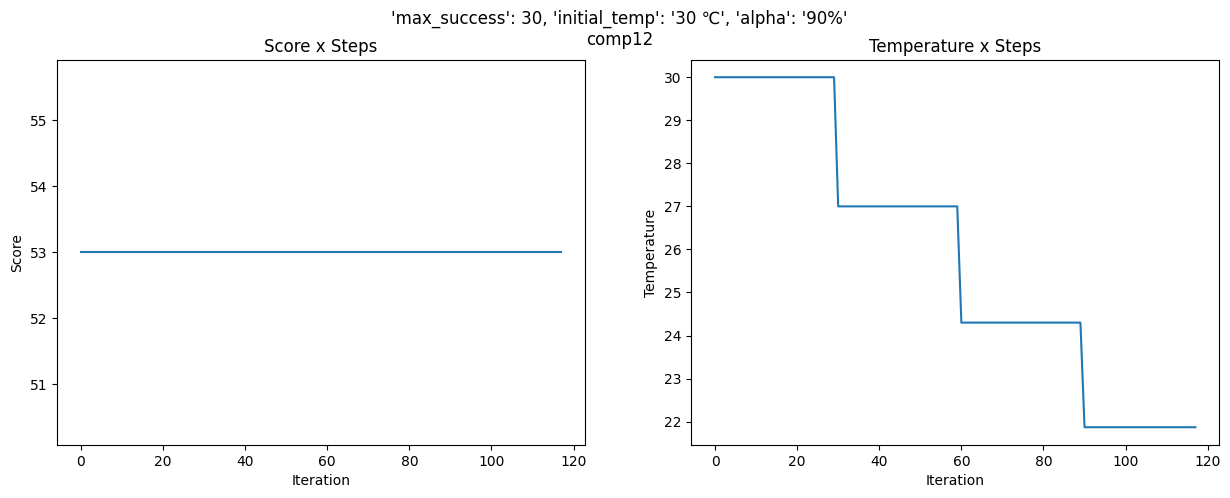

Score: 43


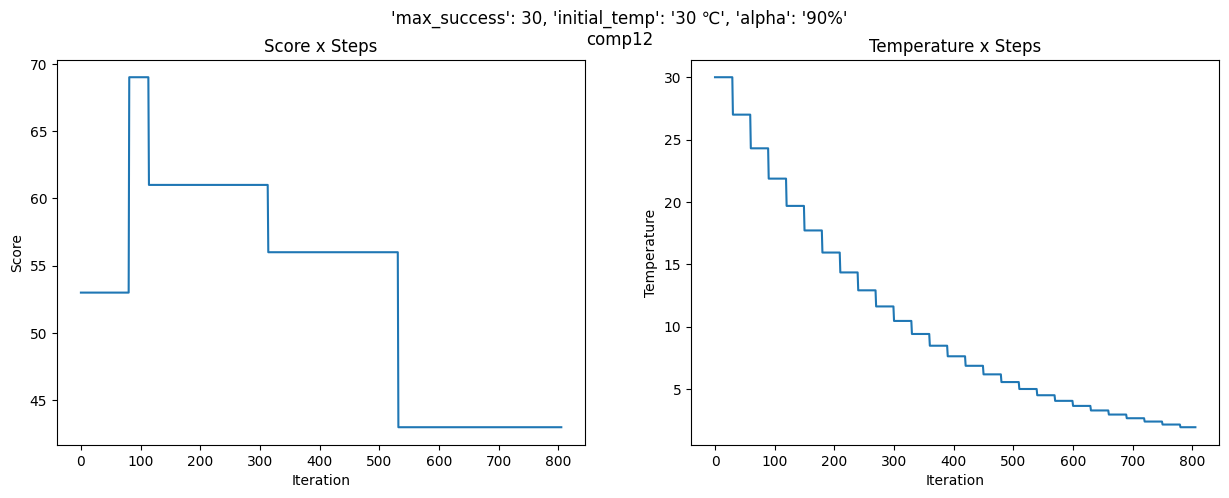

Score: 72


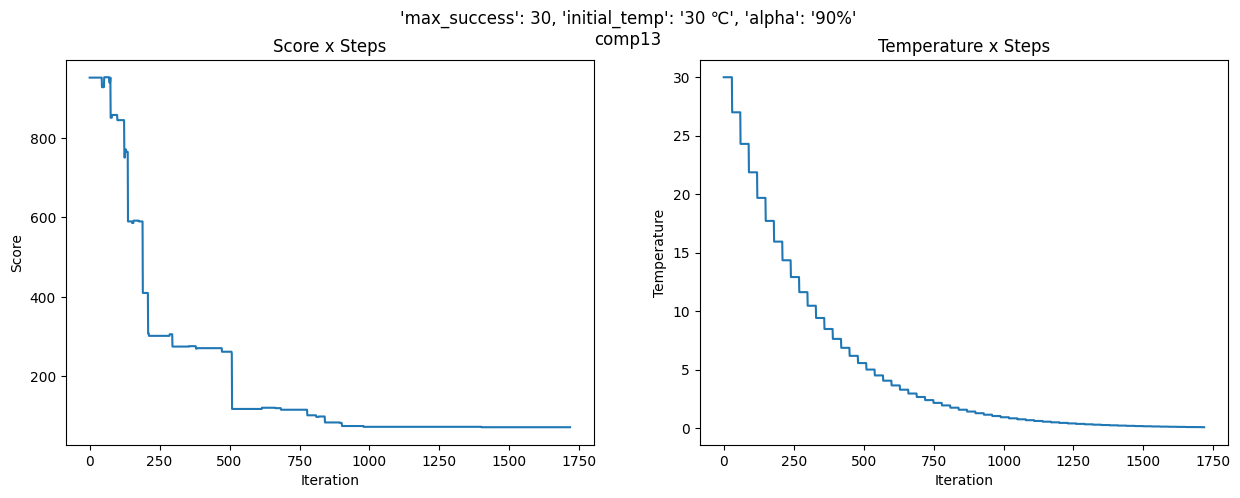

Score: 113


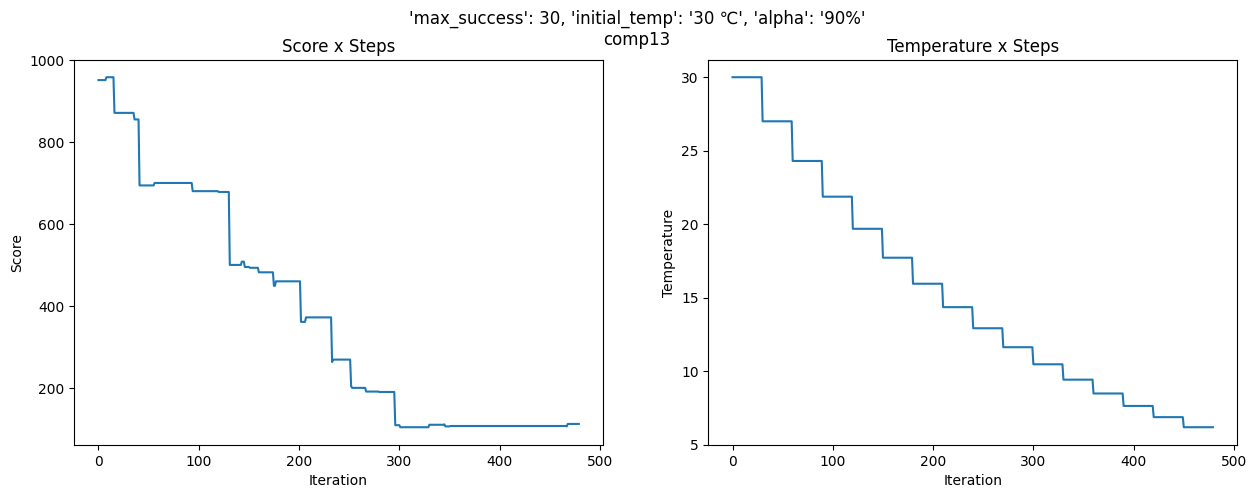

Score: 511


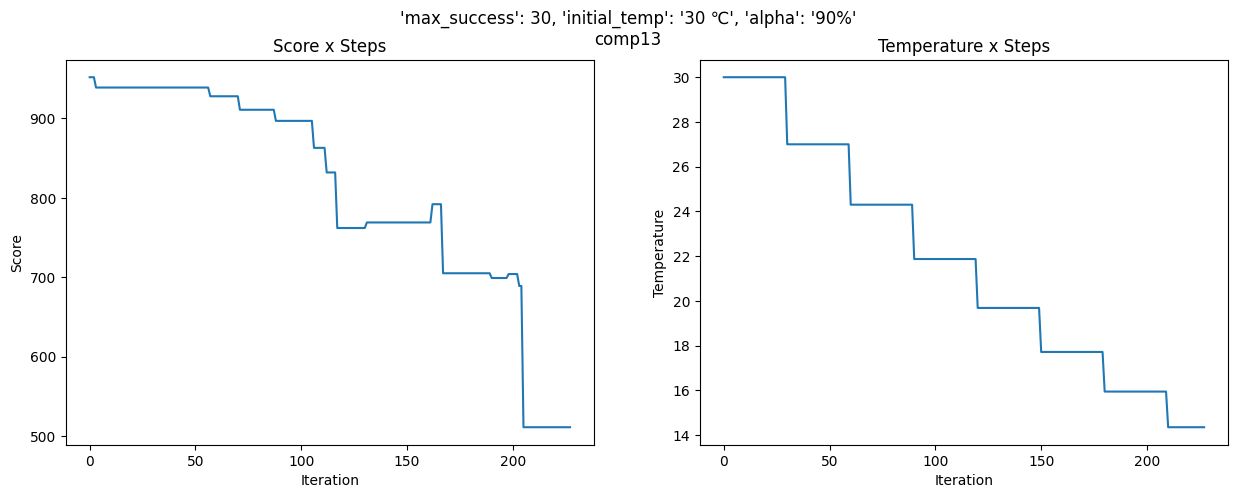

Score: 73


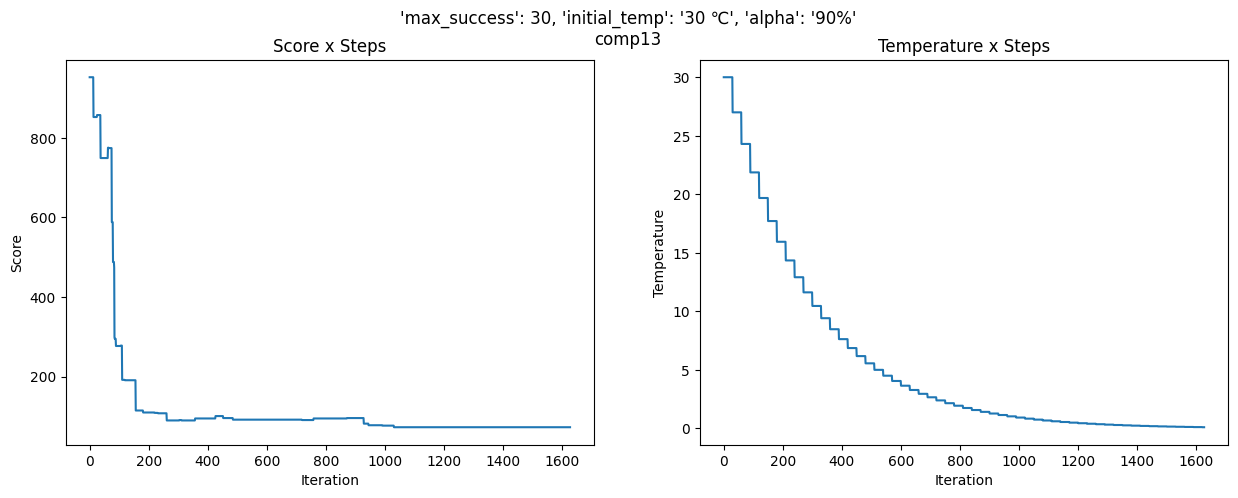

Score: 88


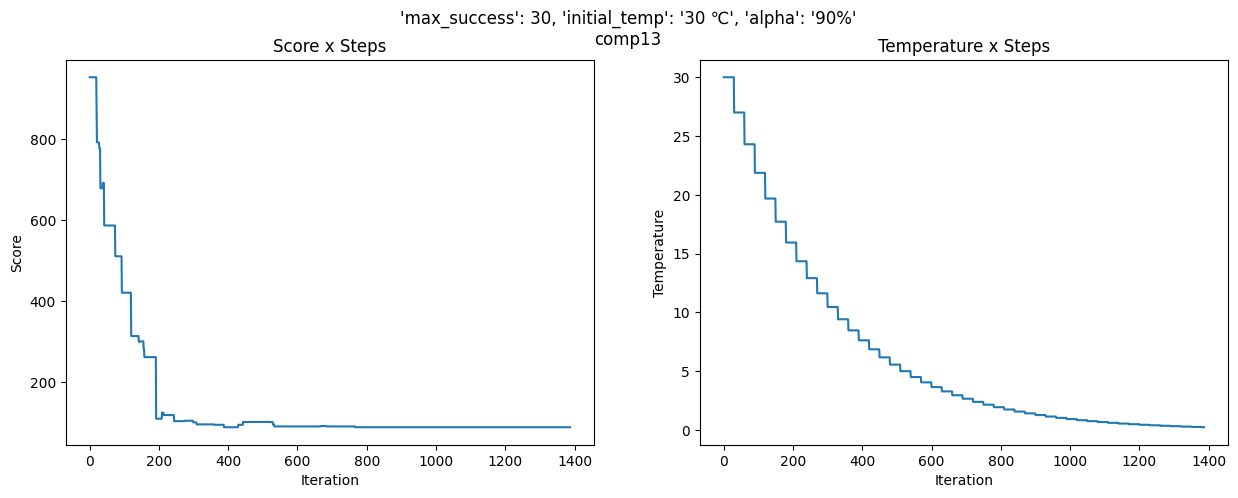

Score: 148


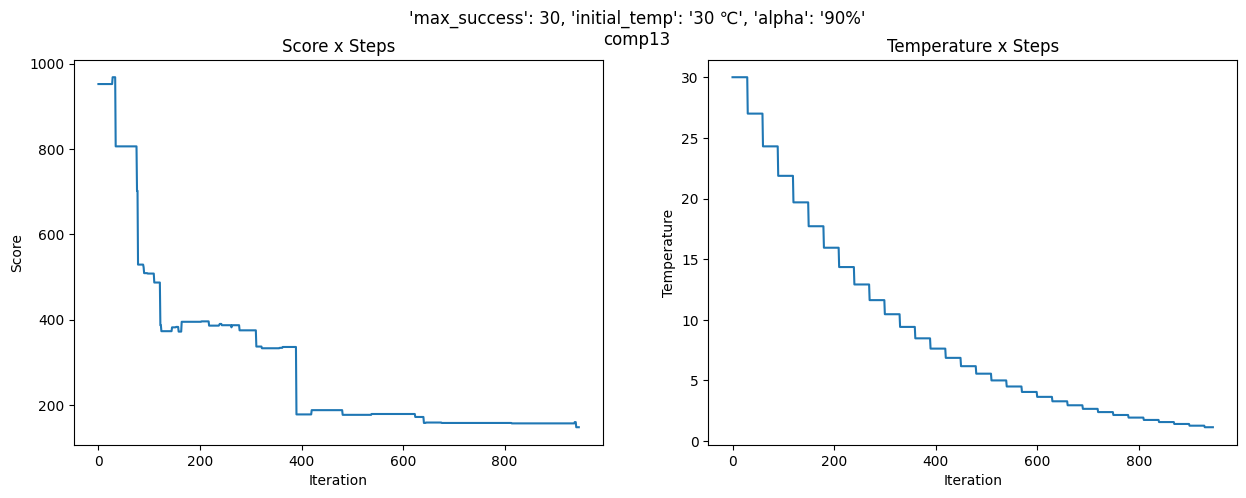

Score: 233


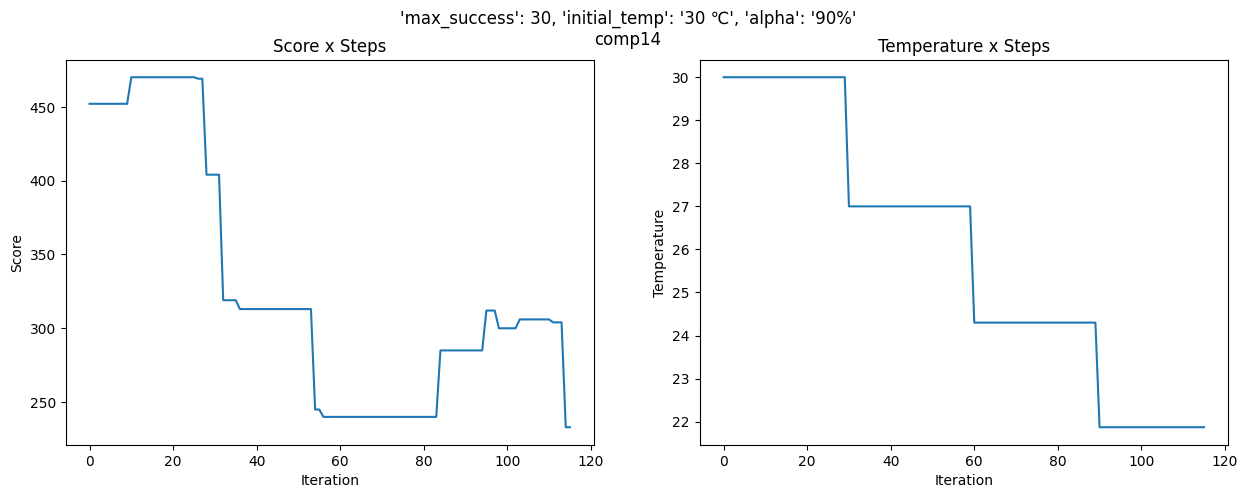

Score: 141


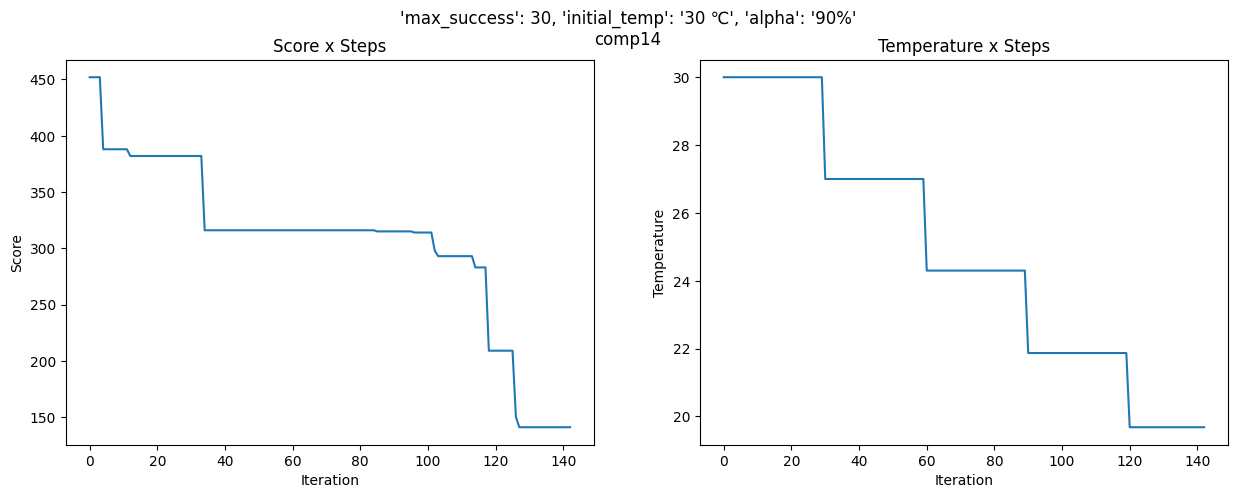

Score: 230


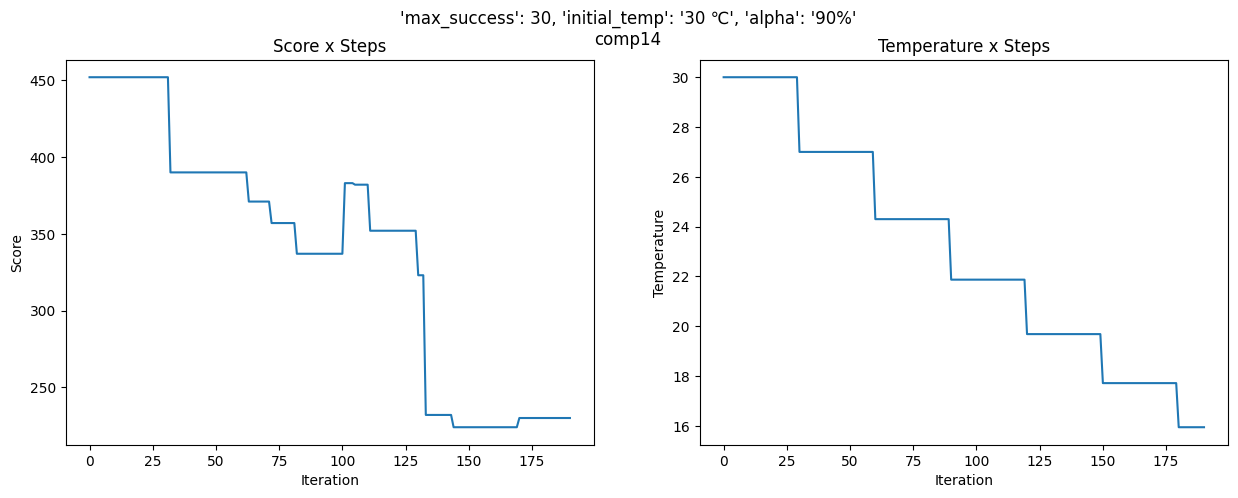

Score: 17


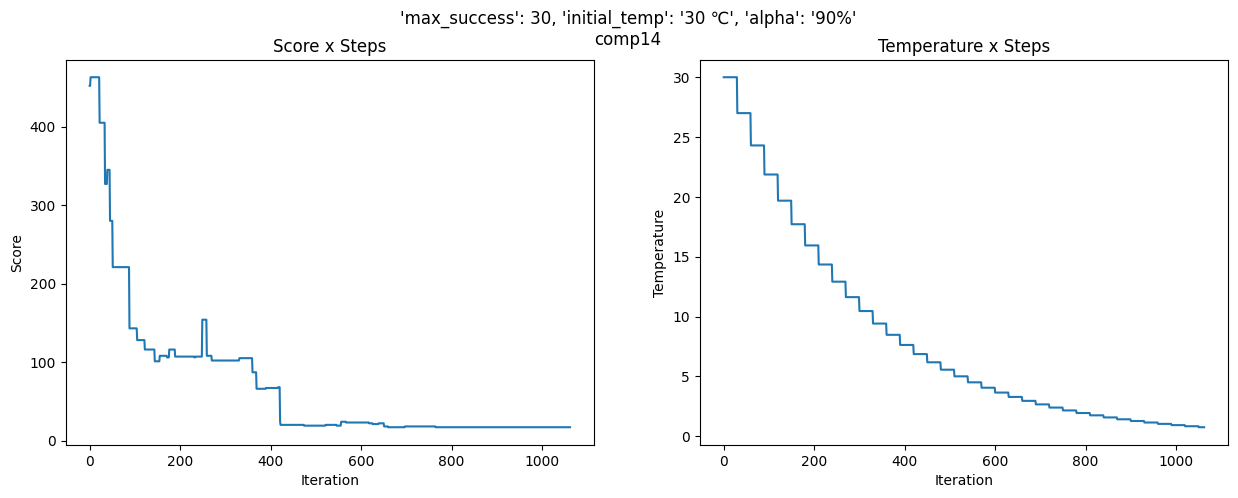

Score: 24


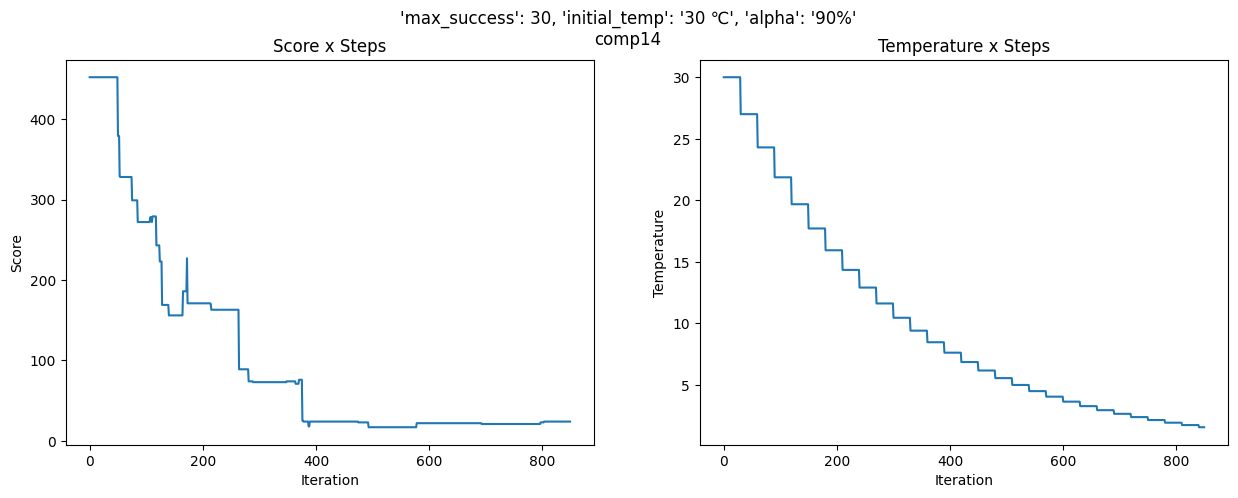

Score: 14


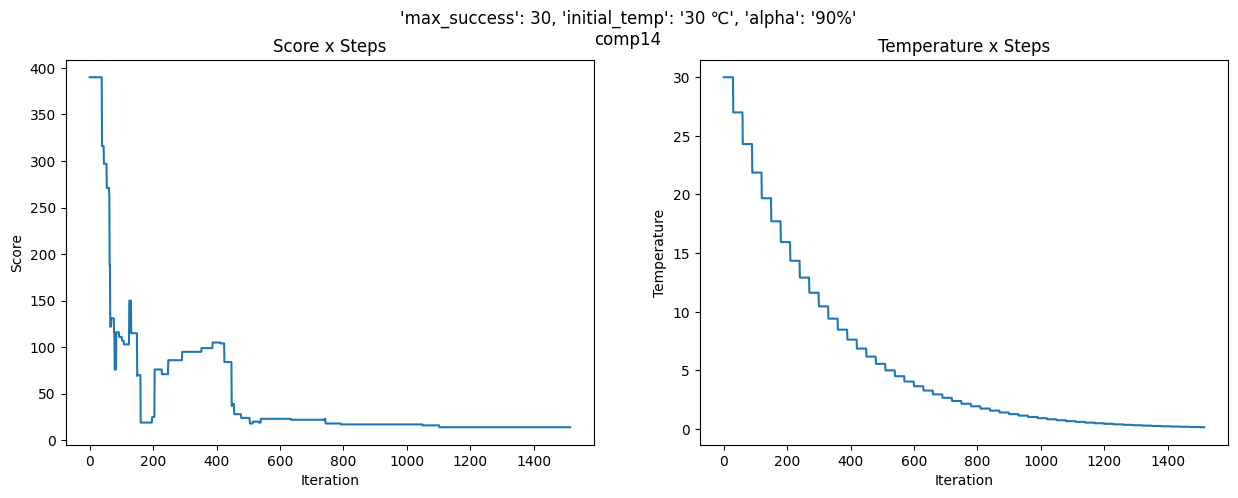

Score: 560


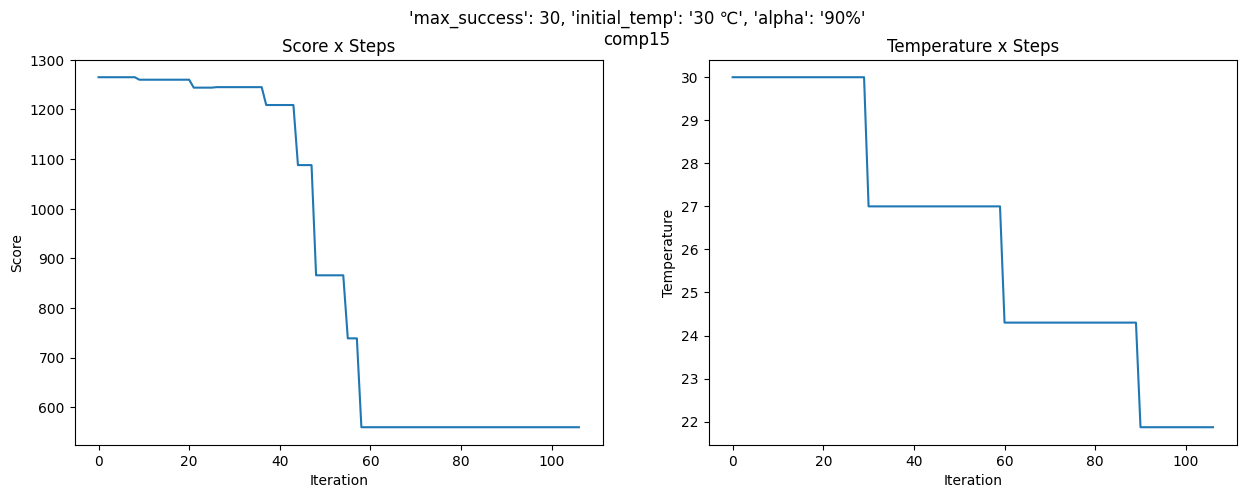

Score: 108


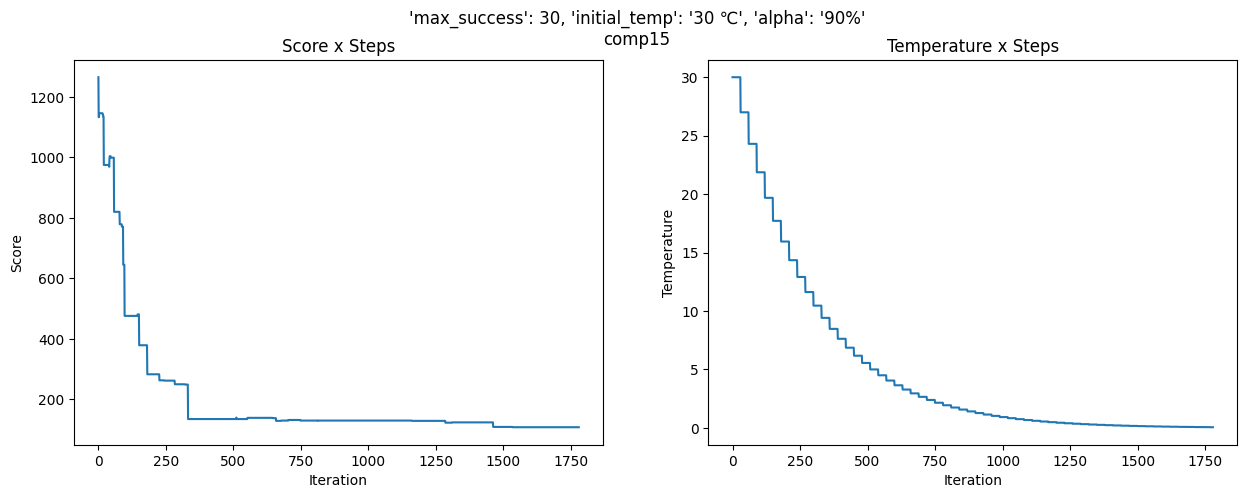

Score: 782


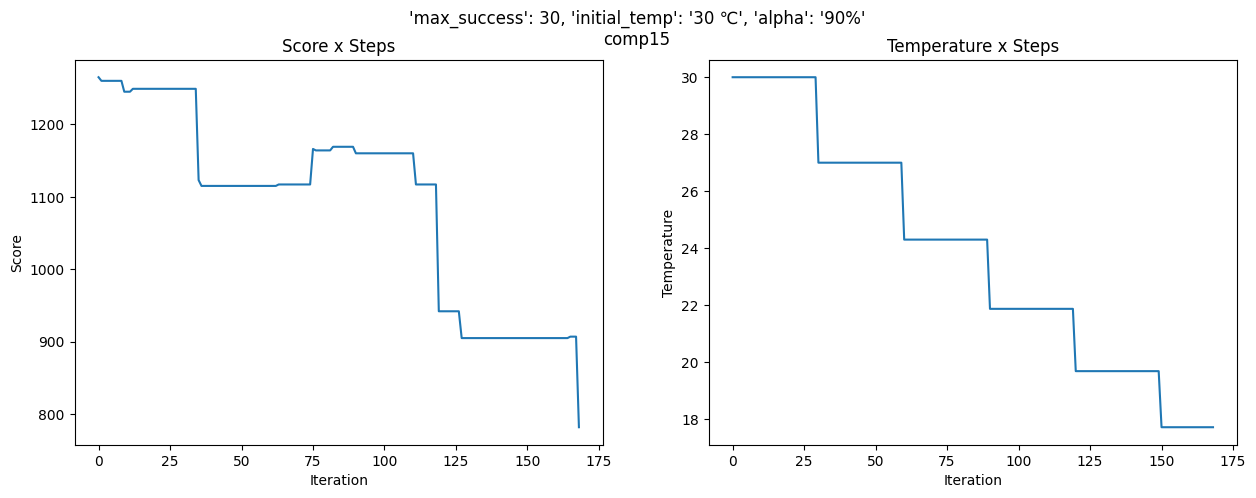

Score: 514


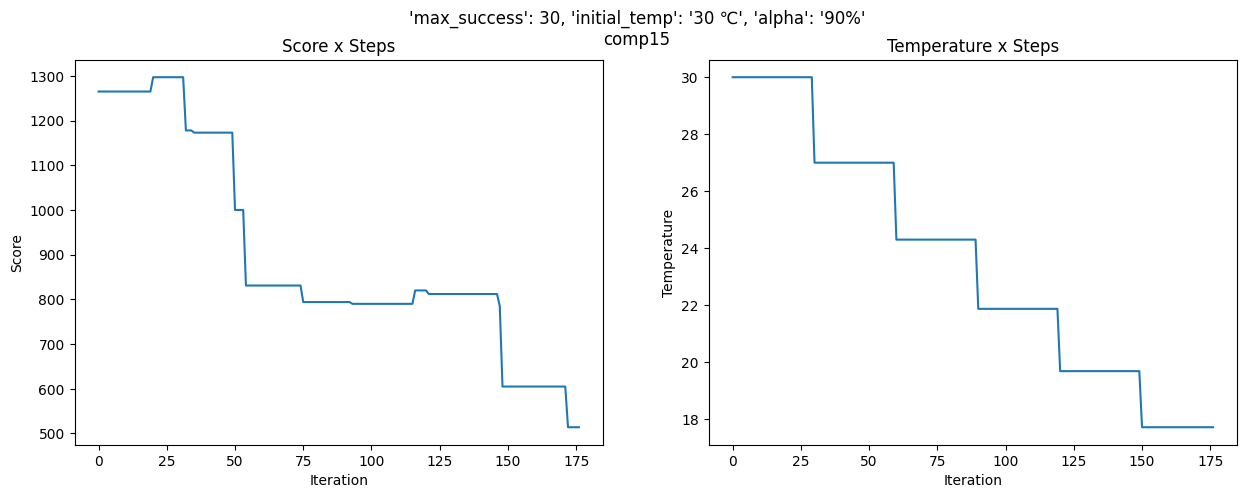

Score: 114


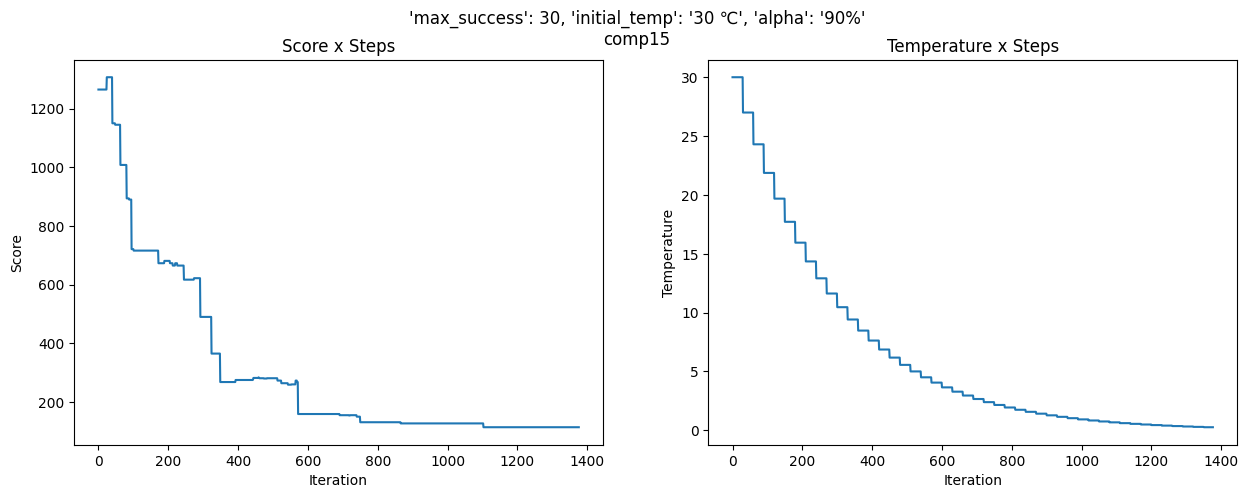

Score: 122


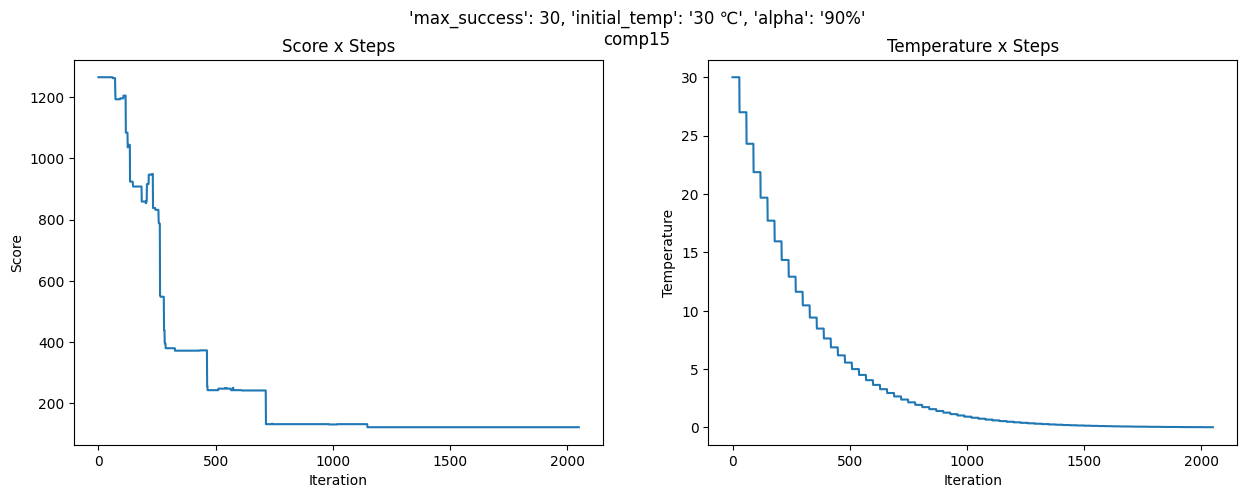

Score: 677


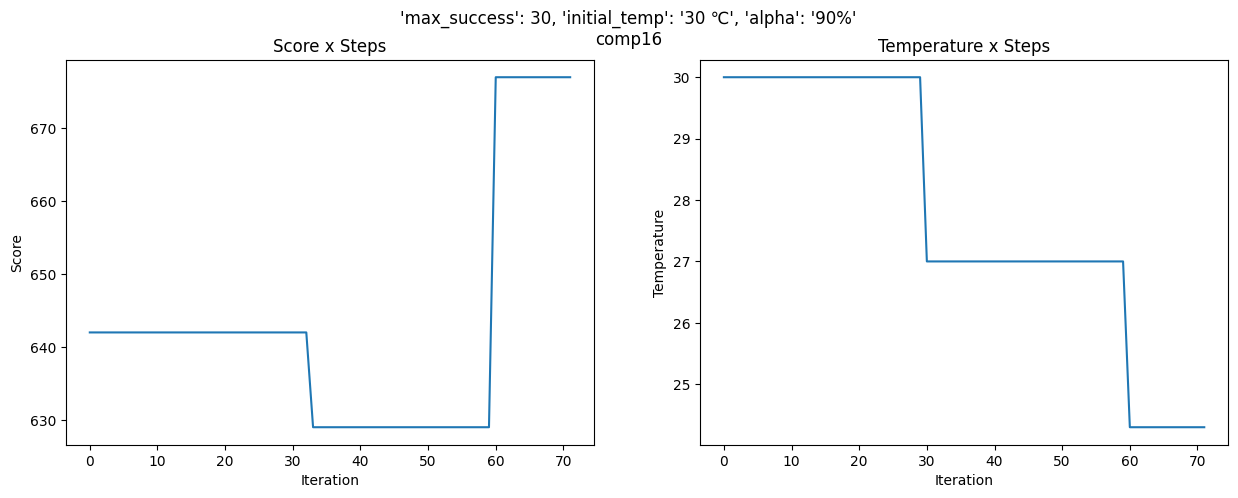

Score: 72


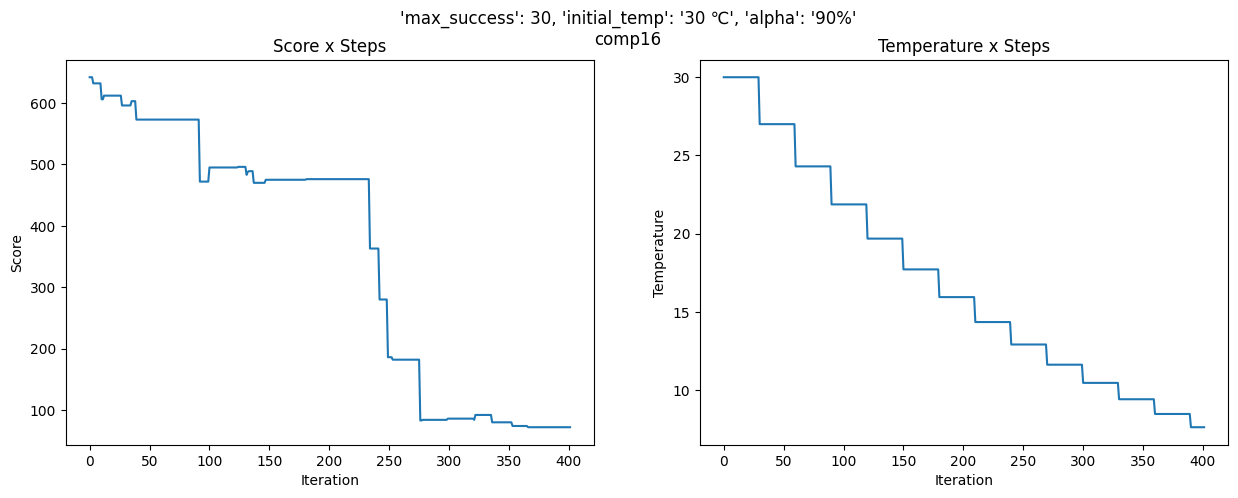

Score: 70


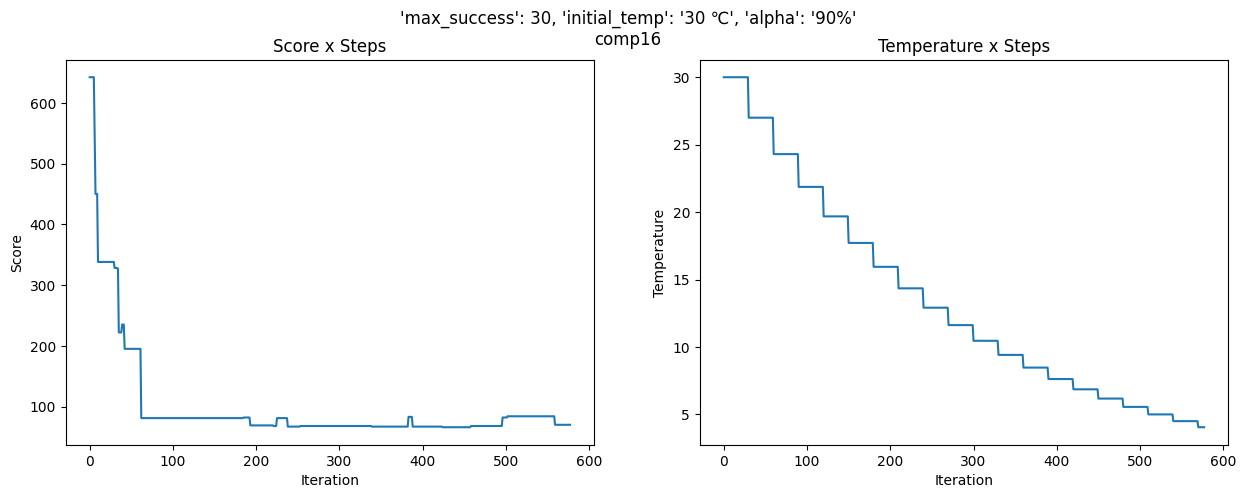

Score: 69


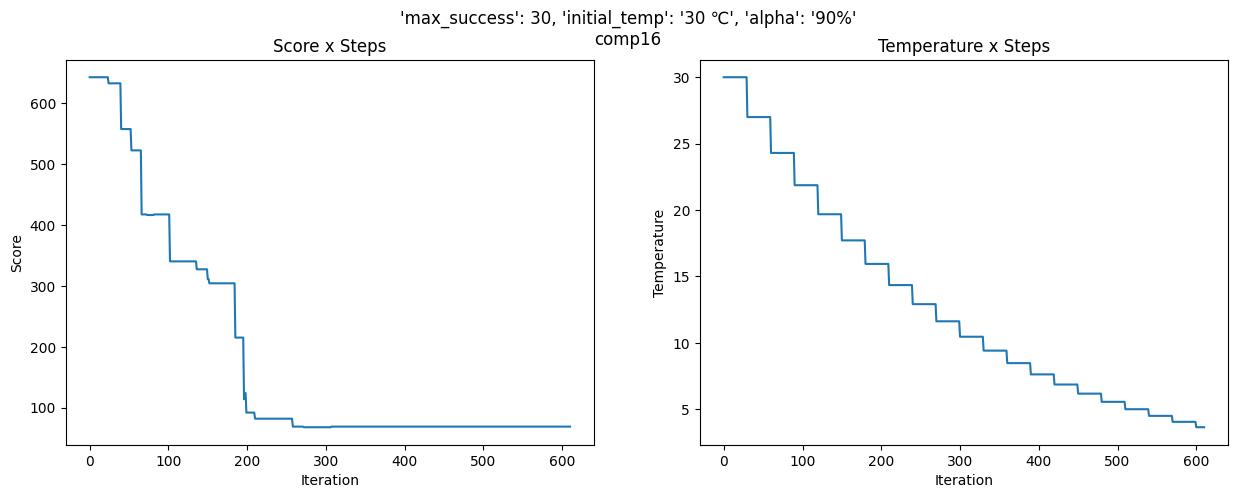

Score: 151


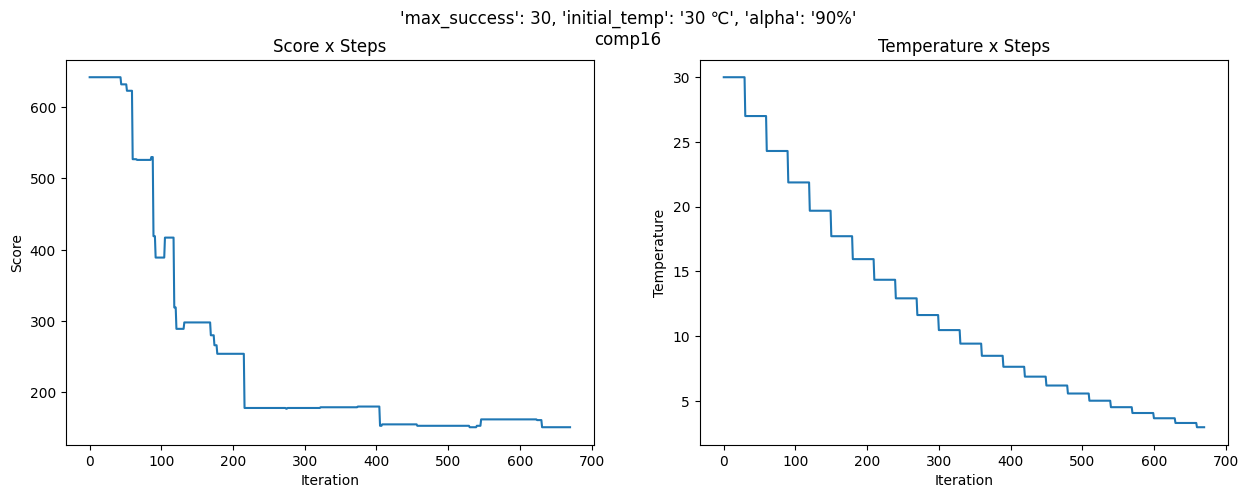

Score: 59


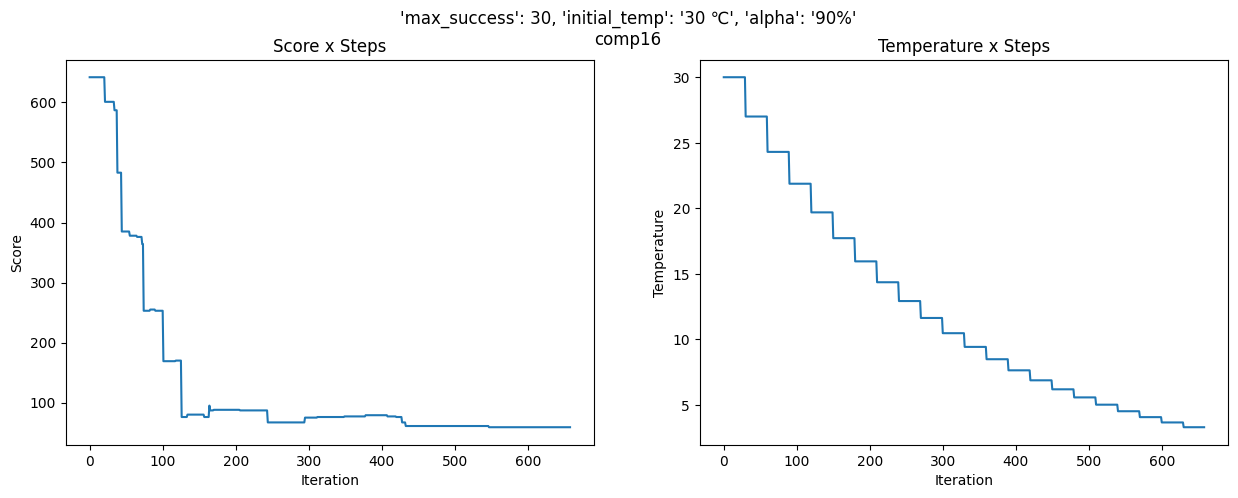

Score: 24


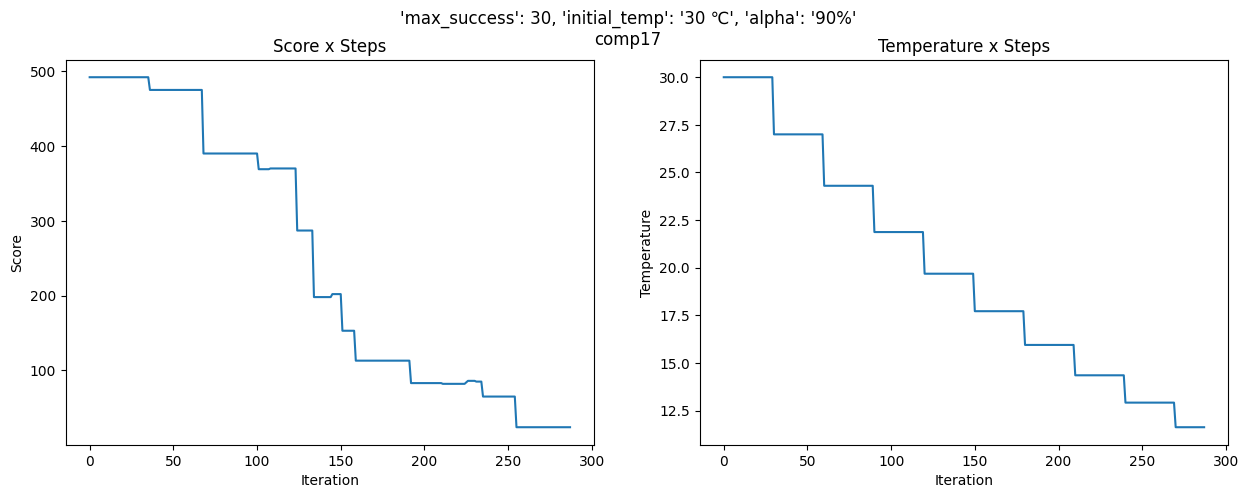

Score: 282


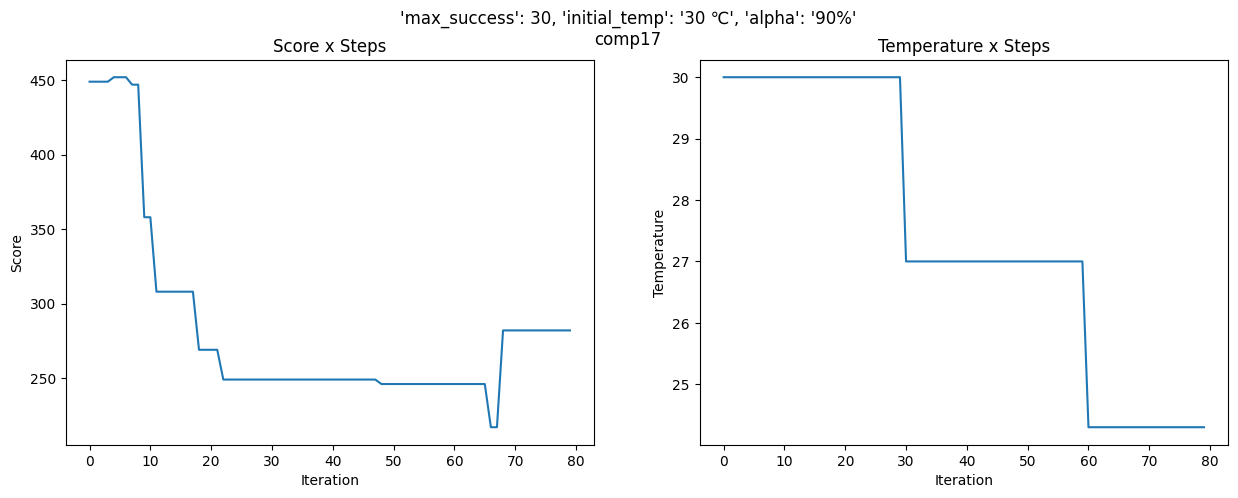

Score: 329


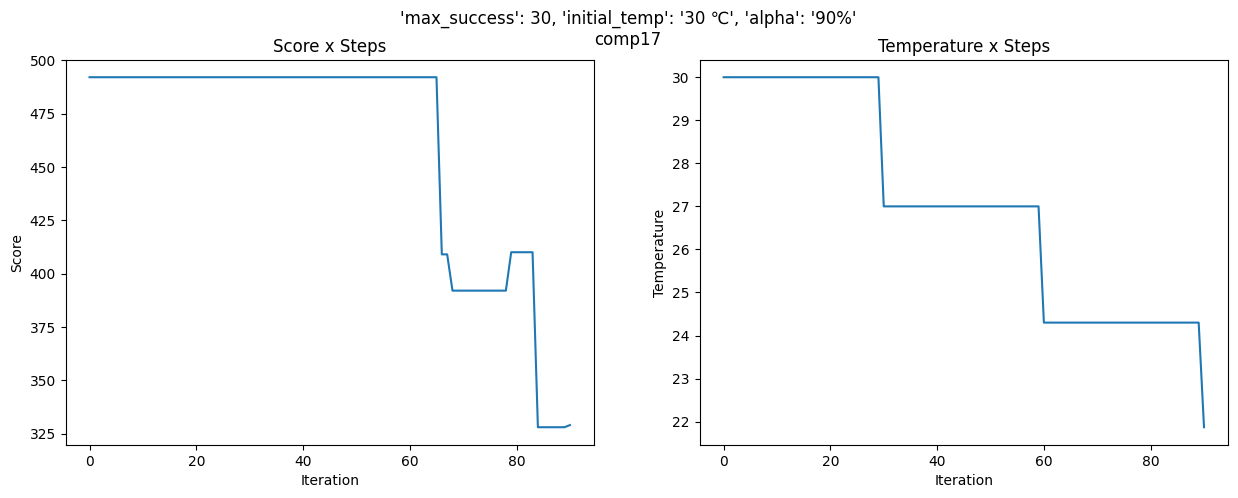

Score: 114


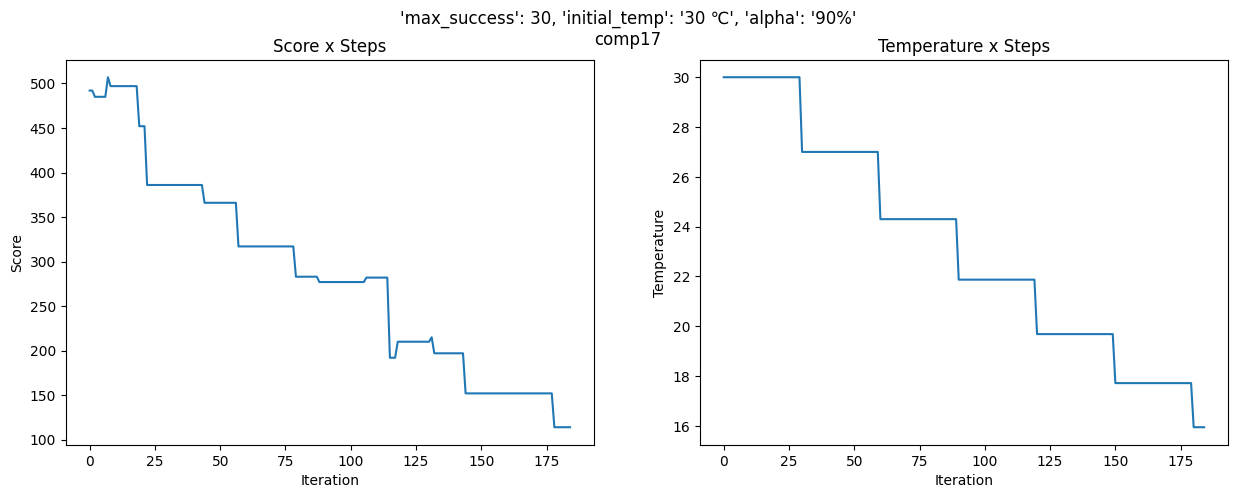

Score: 18


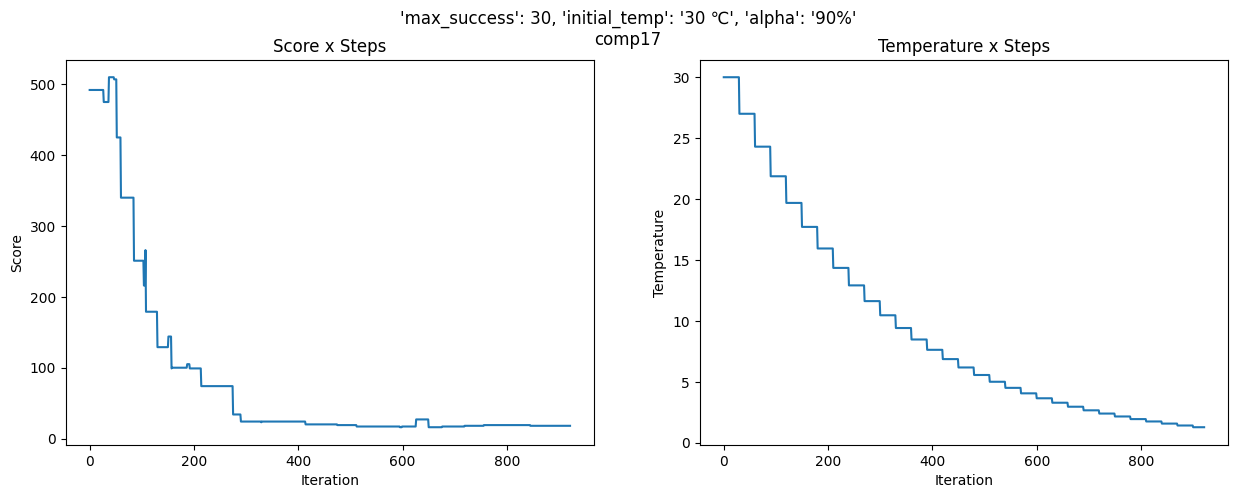

Score: 35


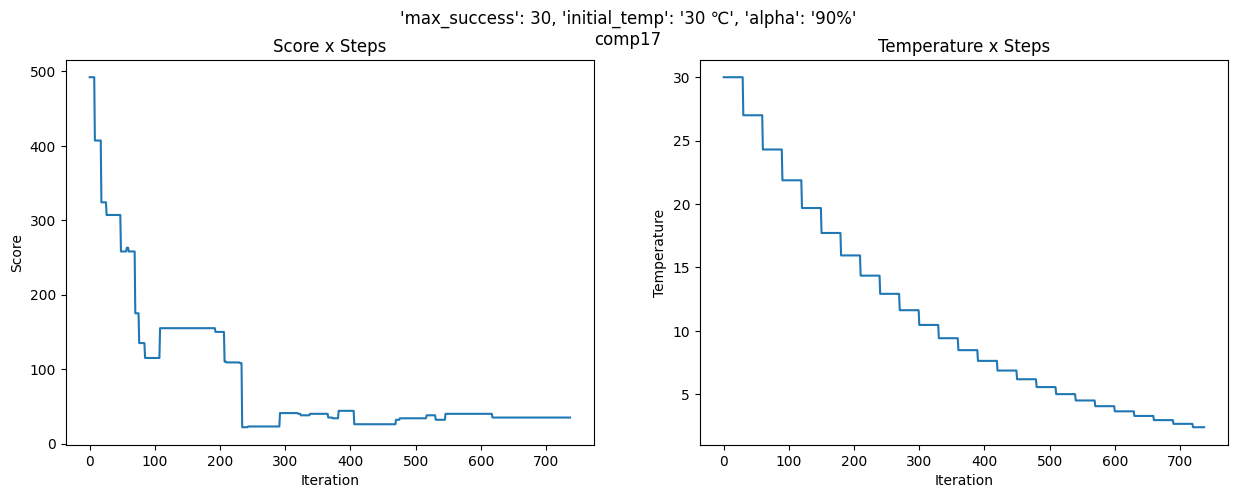

Score: 165


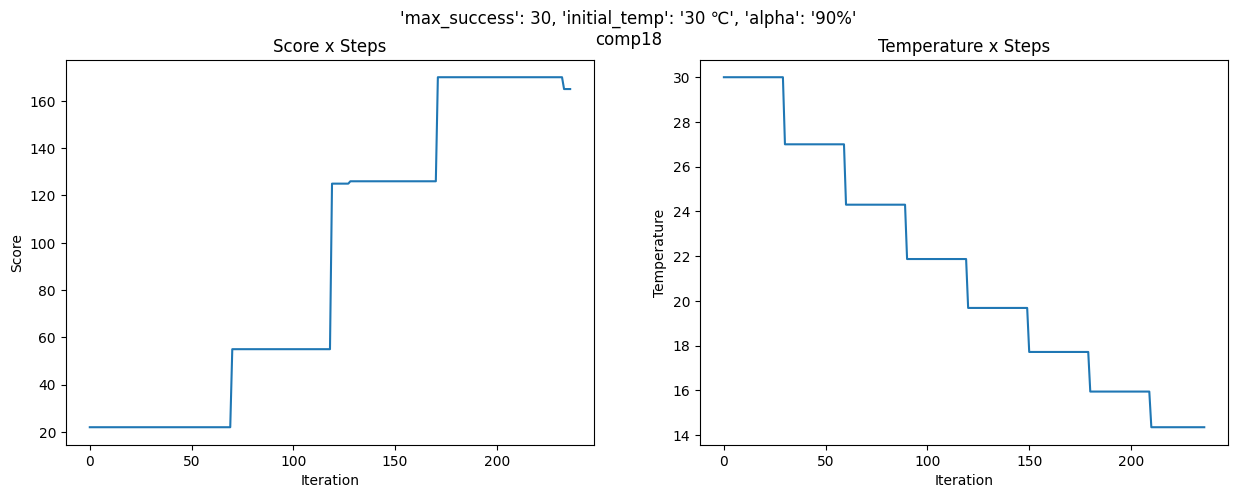

Score: 44


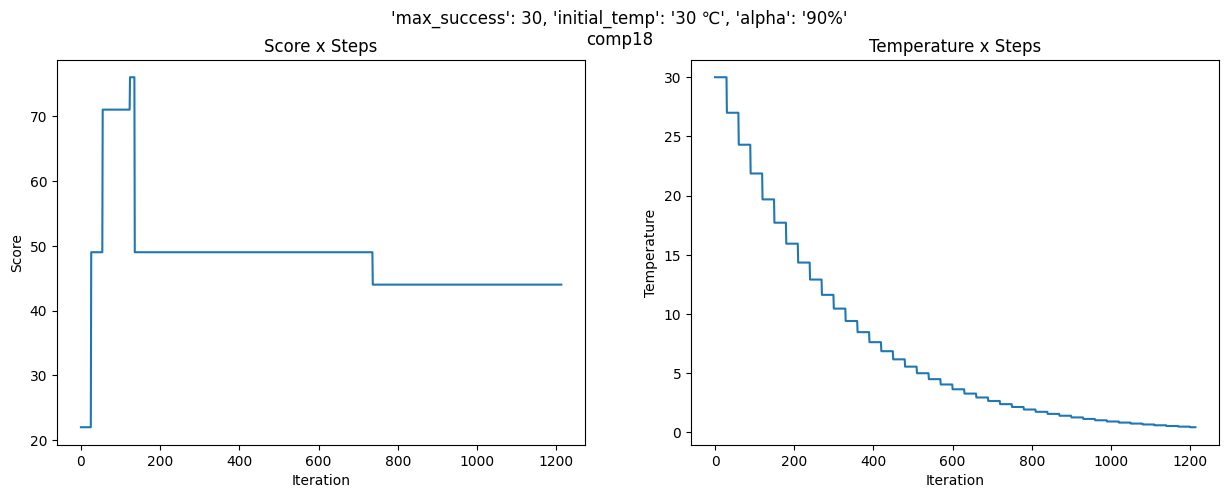

Score: 97


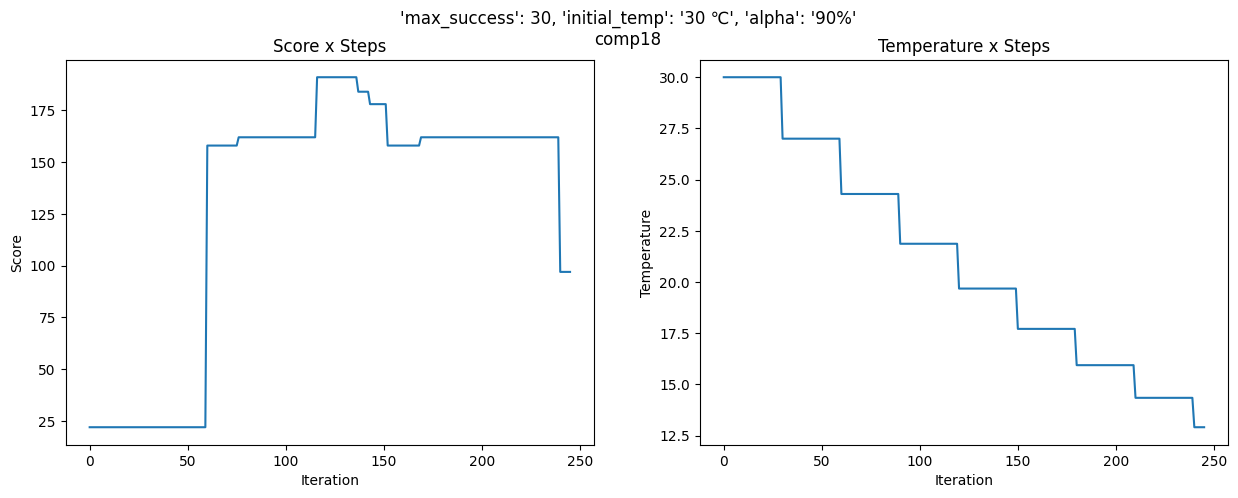

Score: 77


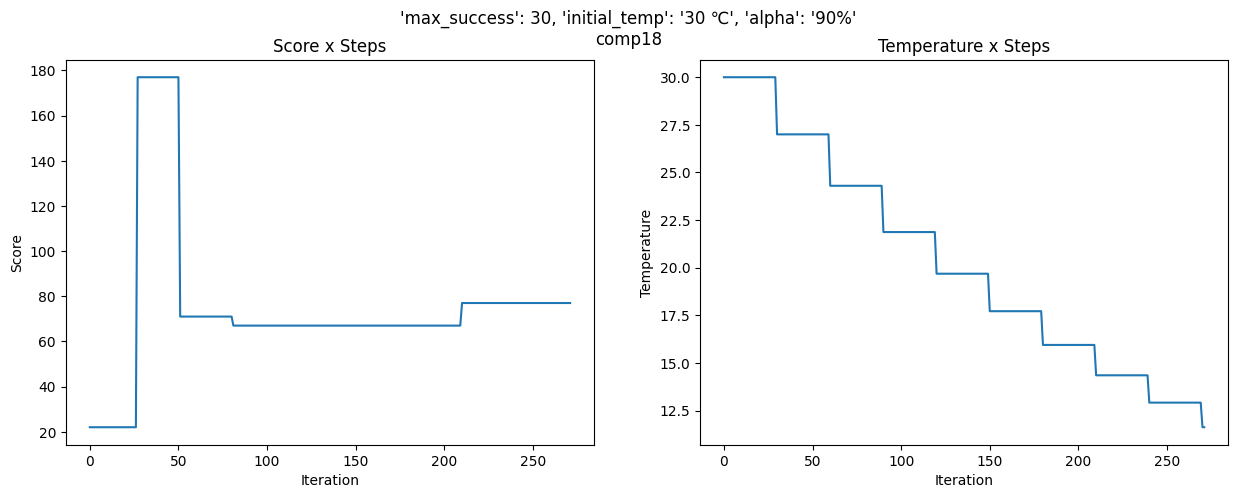

Score: 22


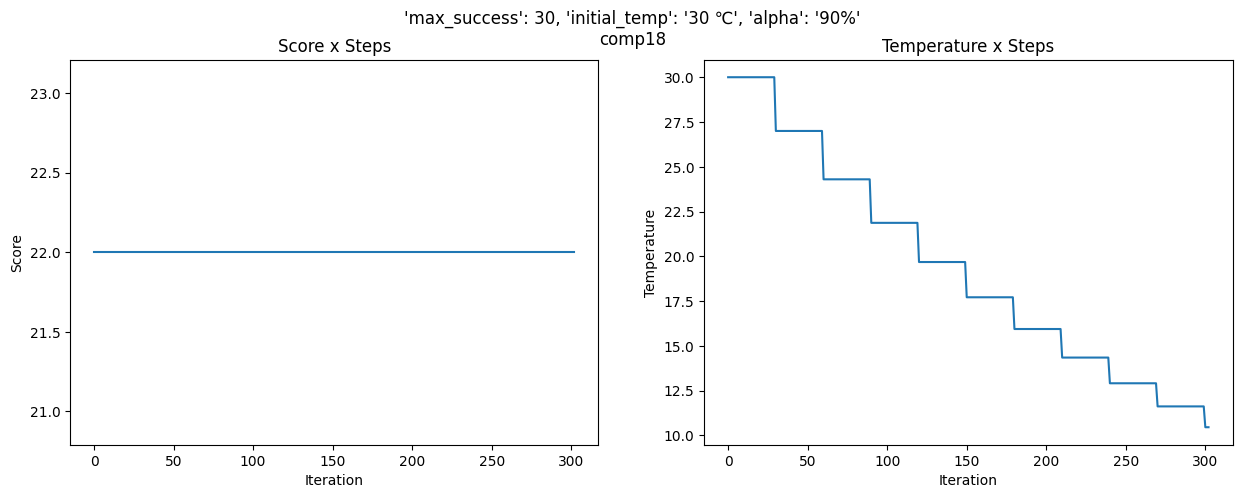

Score: 66


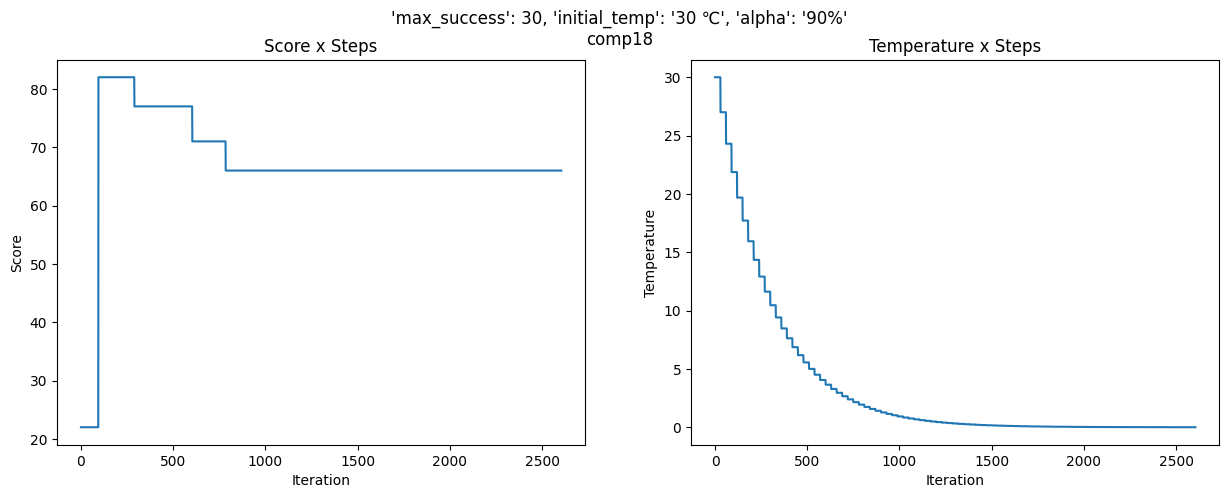

Score: 379


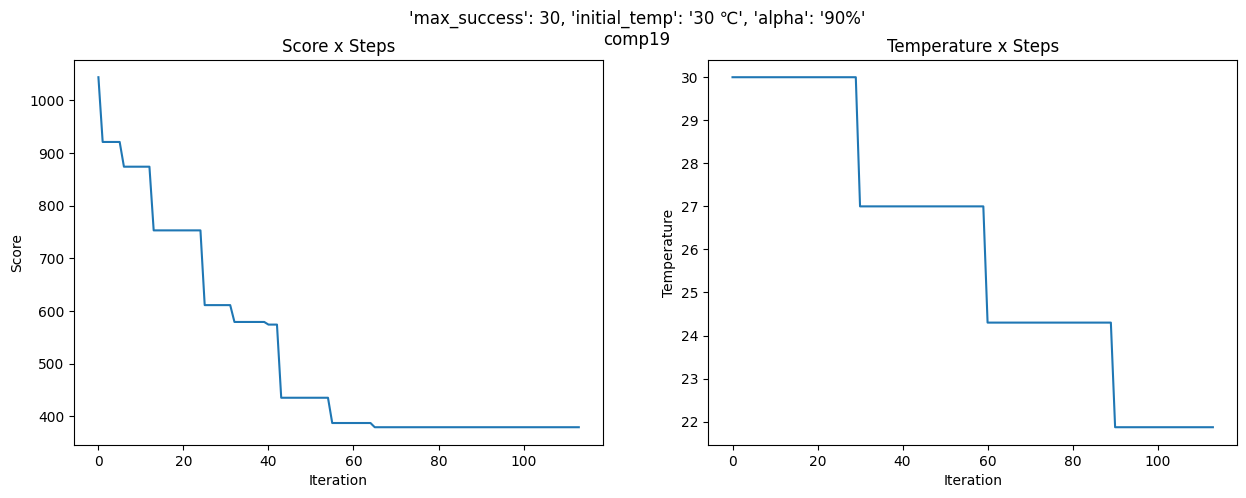

Score: 315


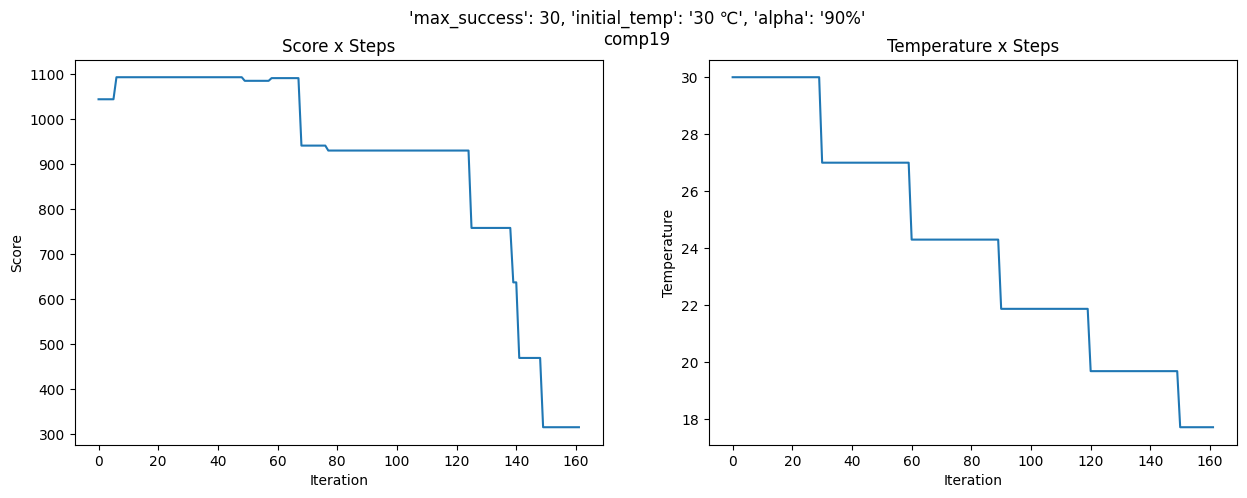

Score: 115


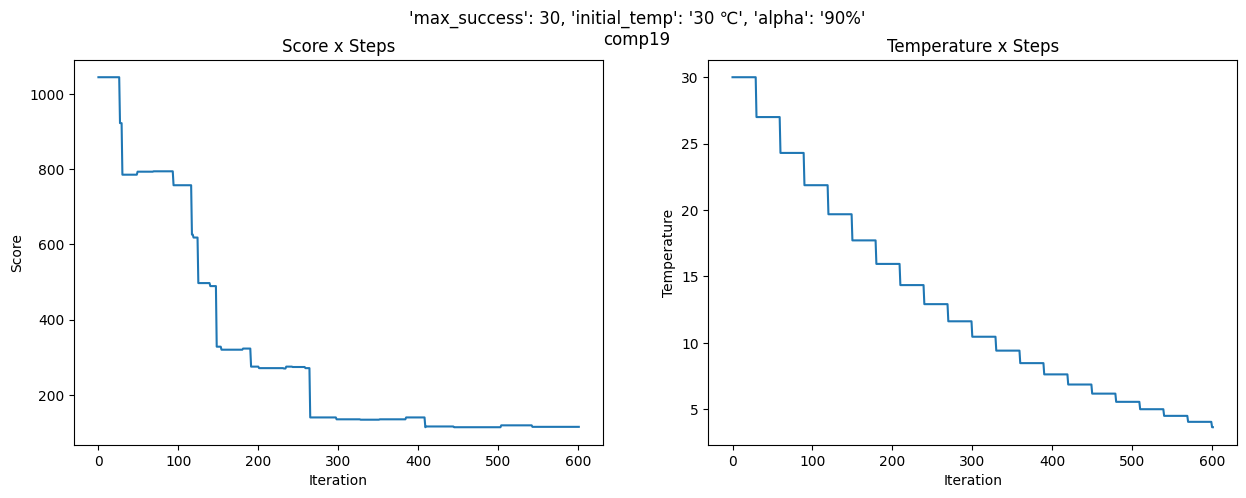

Score: 149


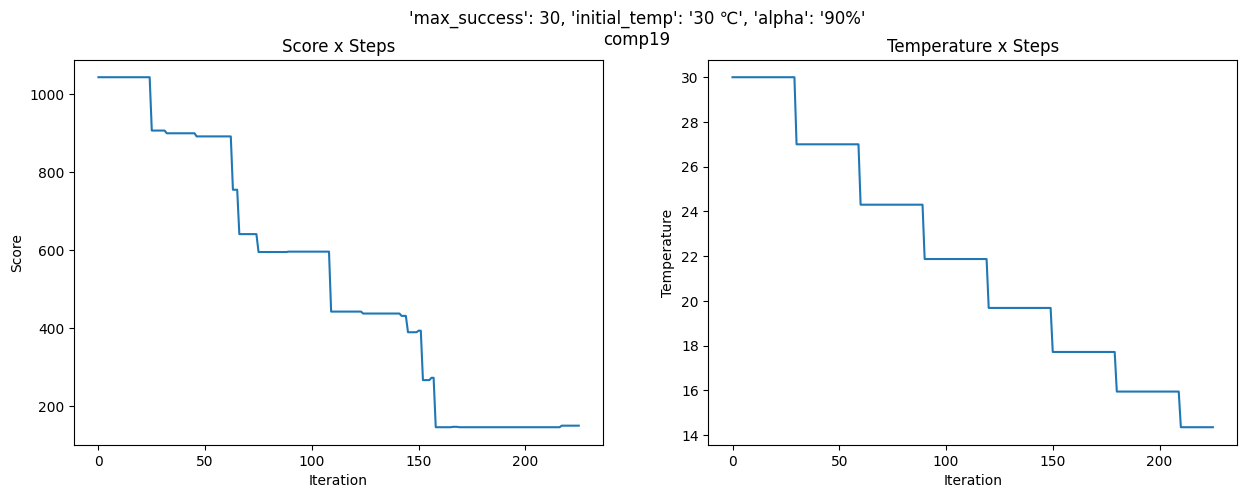

Score: 118


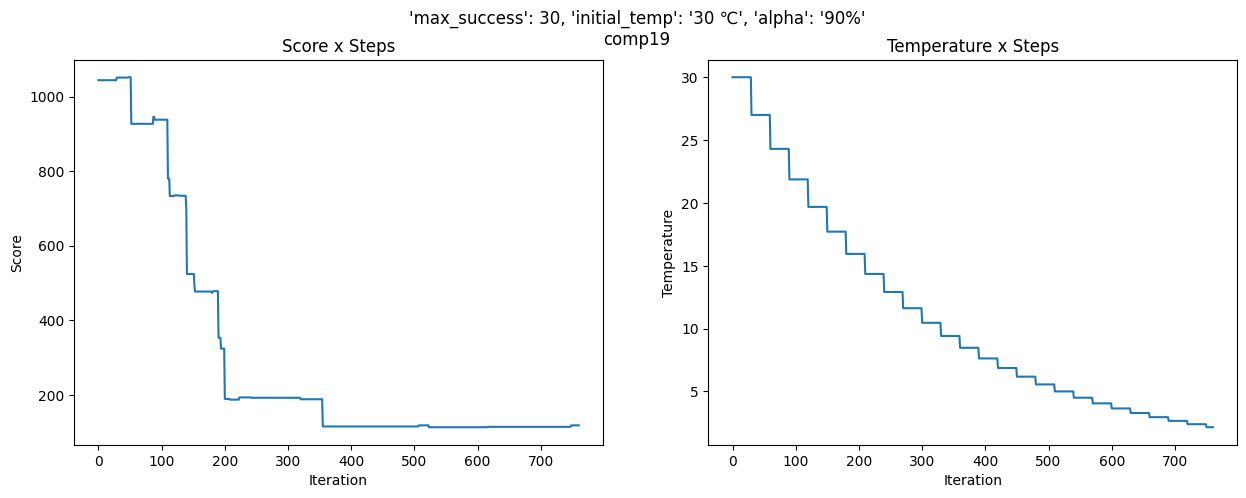

Score: 127


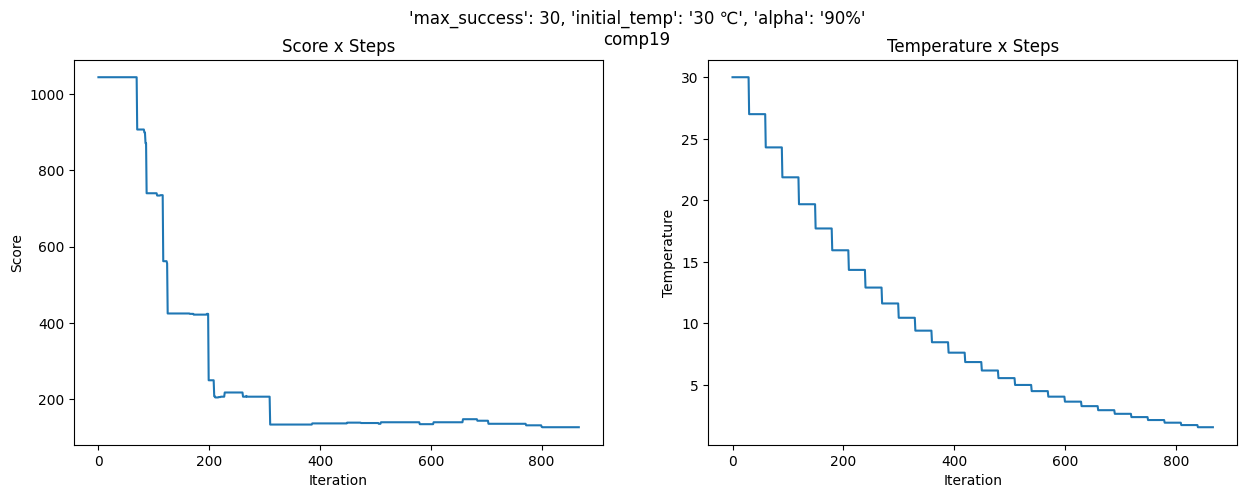

Score: 346


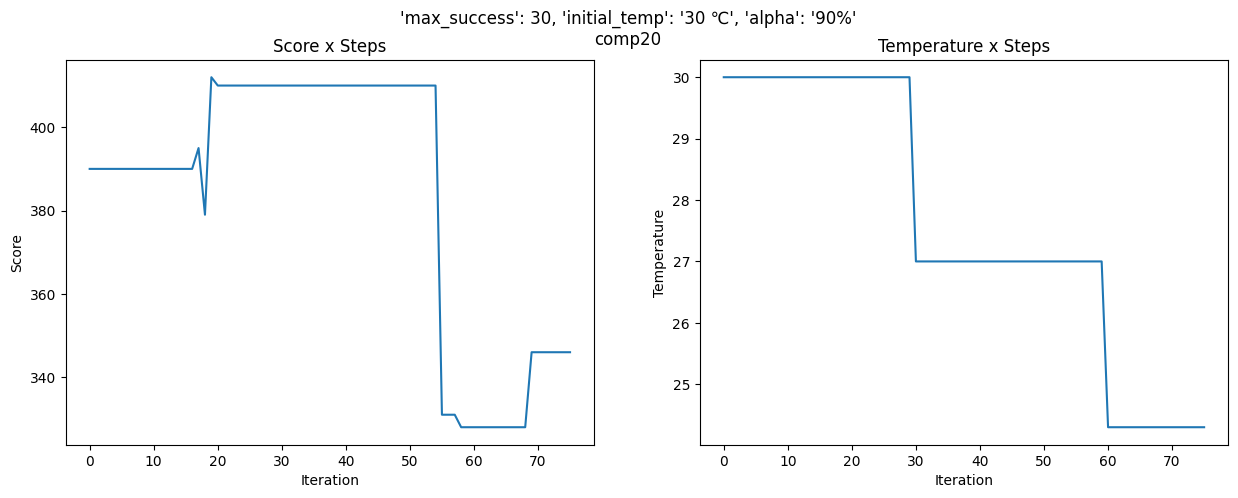

Score: 258


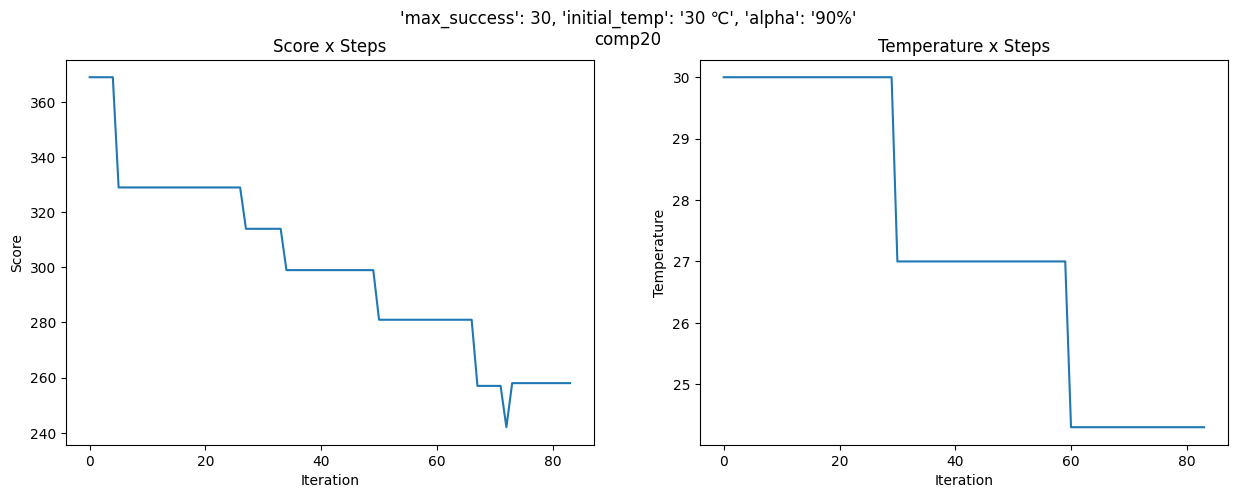

Score: 100


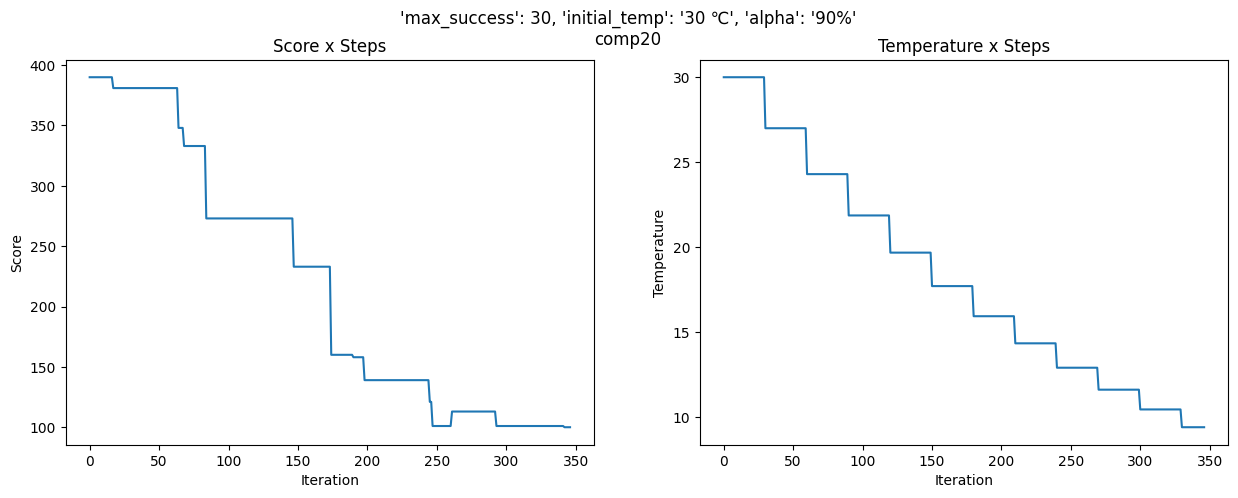

Score: 39


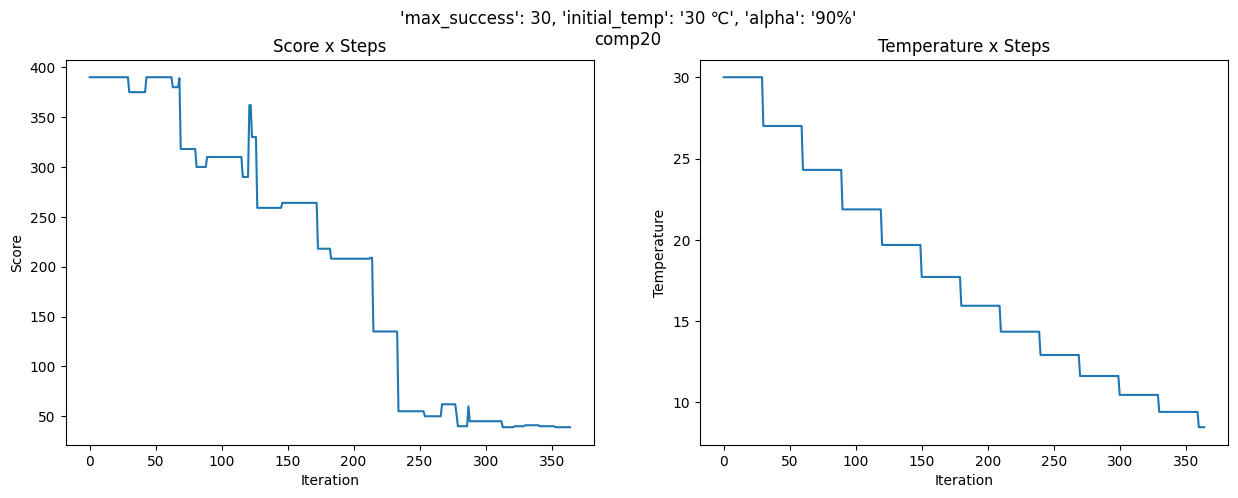

Score: 41


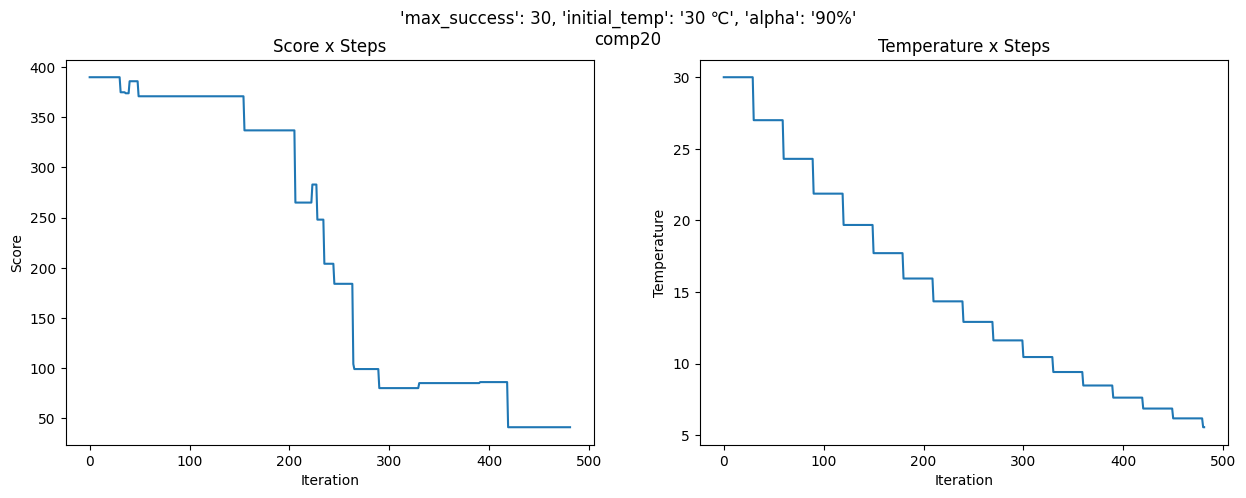

Score: 38


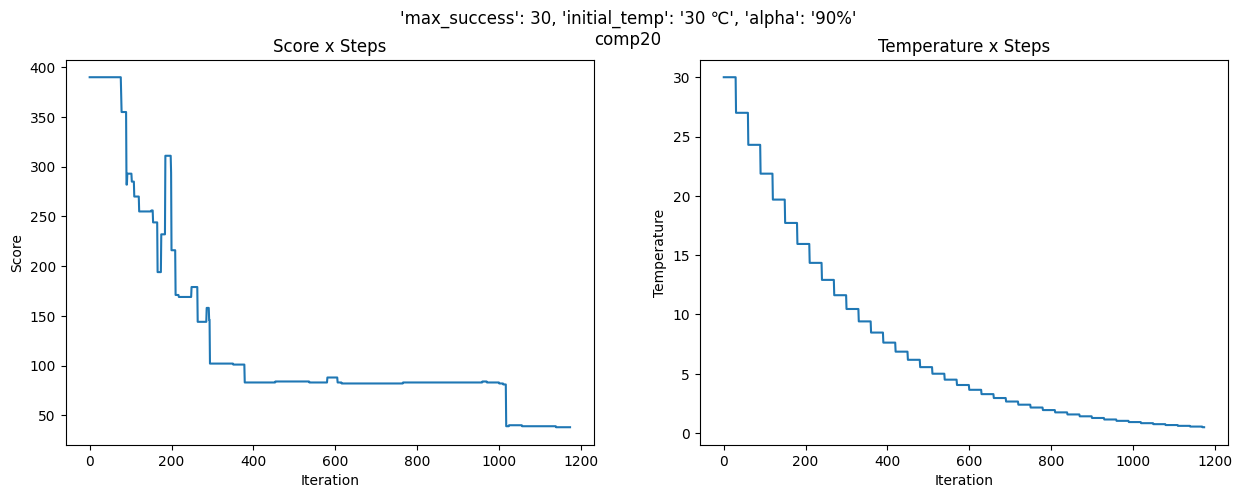

Score: 630


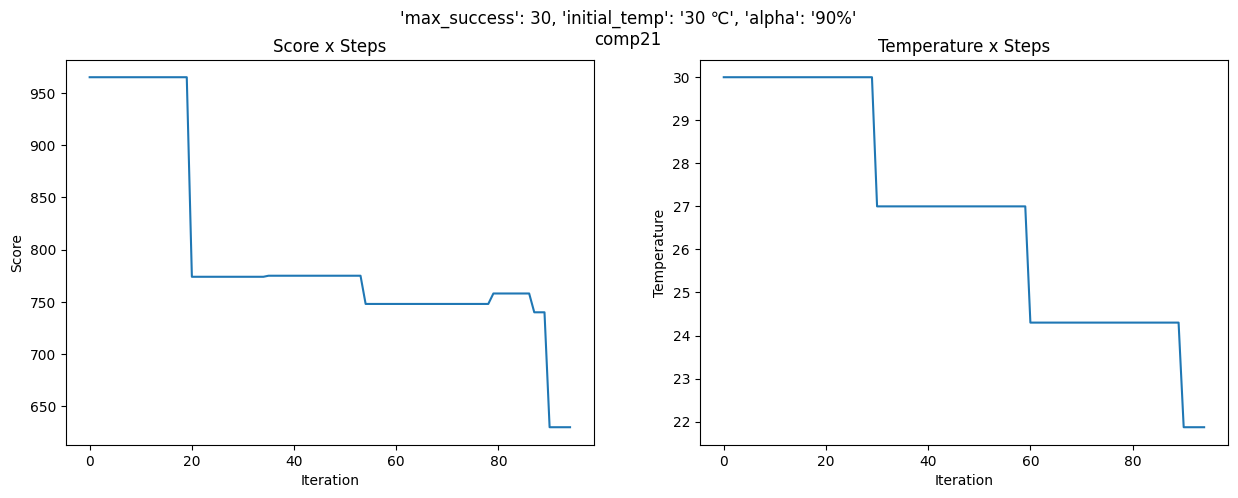

Score: 573


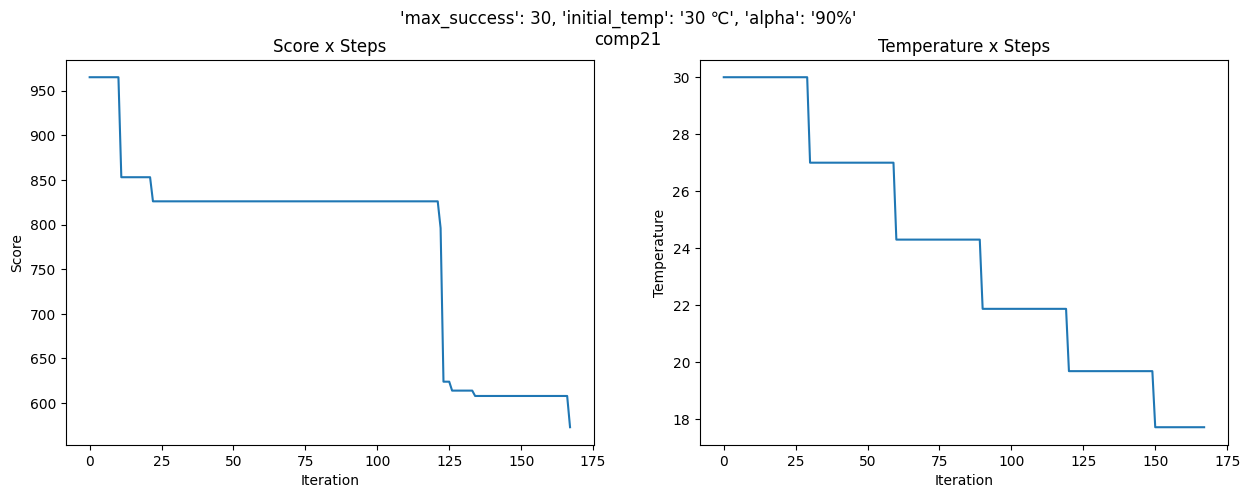

Score: 113


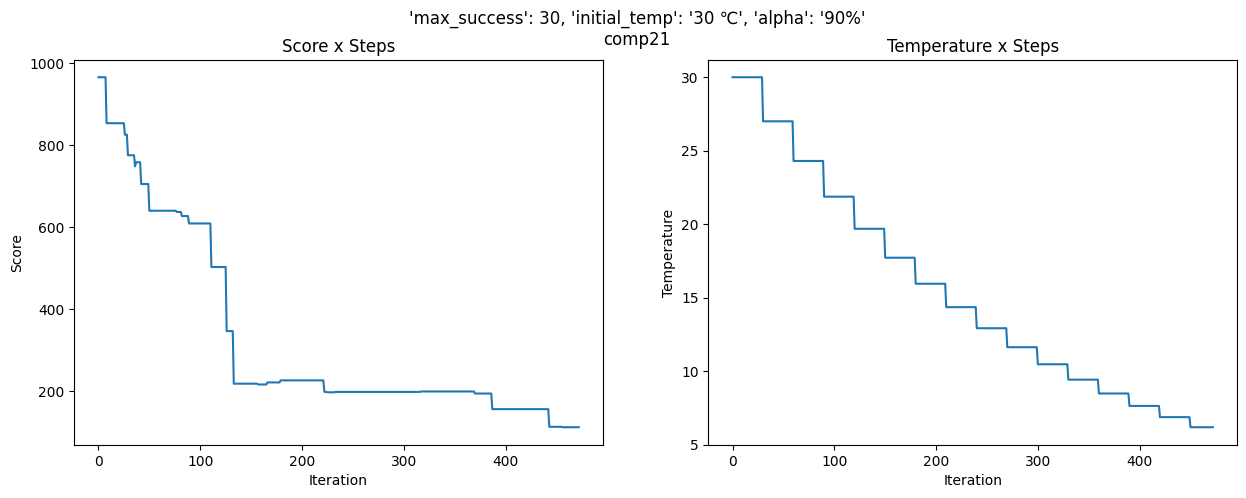

Score: 204


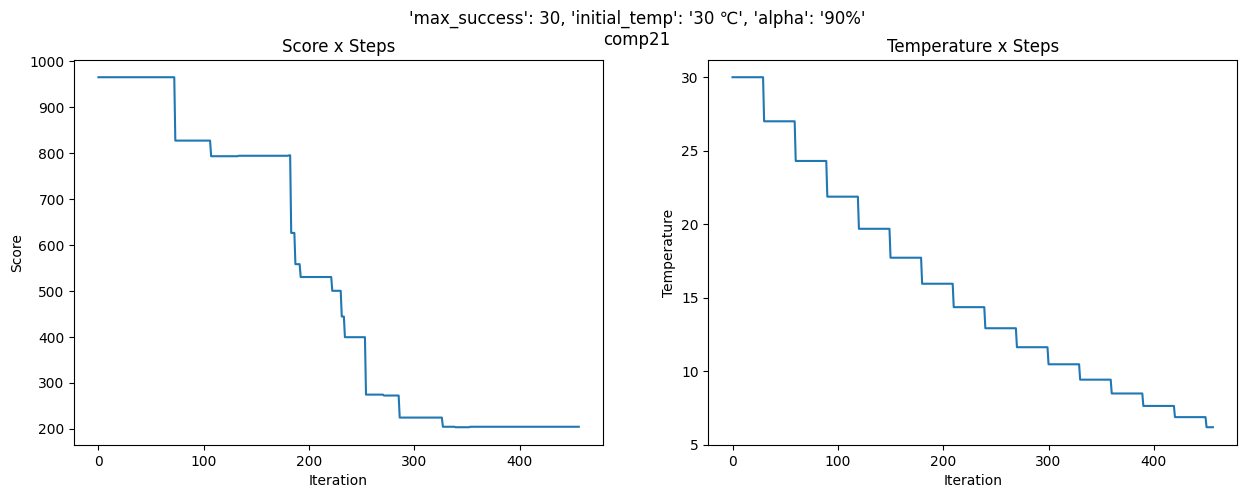

Score: 87


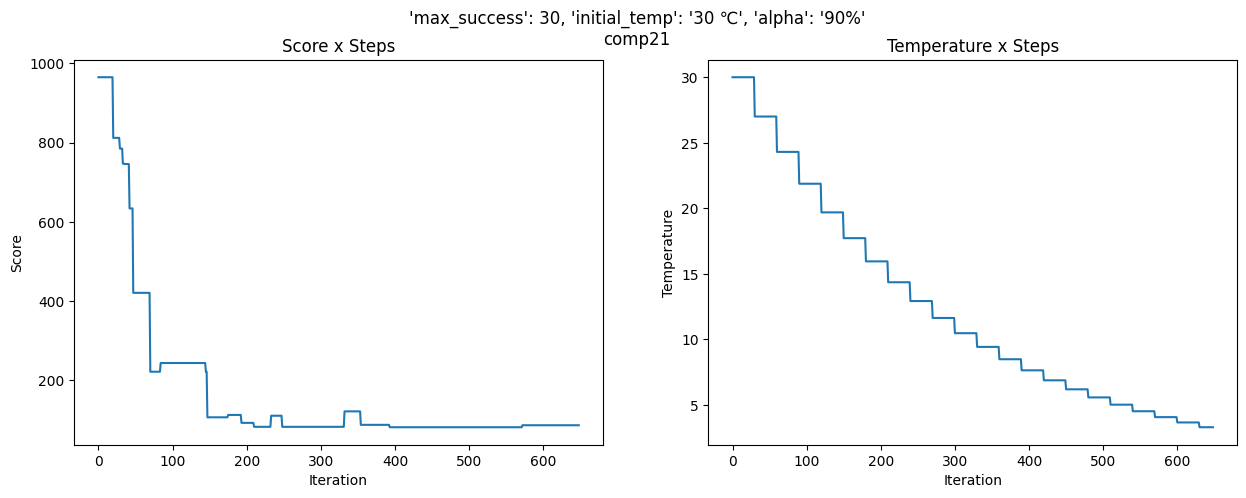

Score: 79


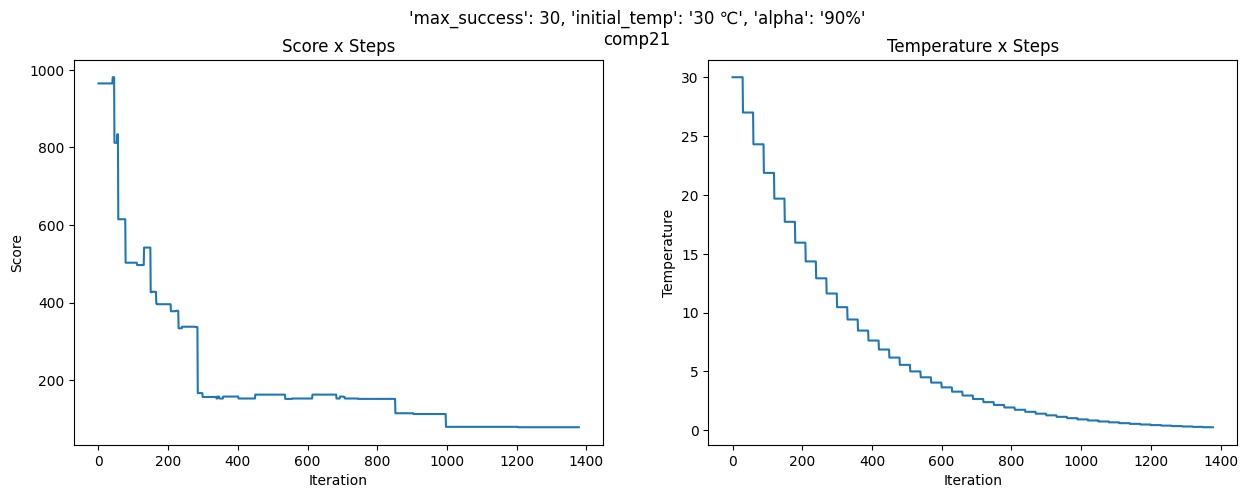

In [4]:
for file_path in sorted(file_paths):
    table, params = define_table(file_path, True)
    
    params_dict = dict([
        ("max_success", int(params[2])),
        ("initial_temp", f"{int(params[3])} ℃"),
        ("alpha", f"{float(params[4]):.0%}"),
    ])

    # Print the last value for score
    print(f"Score: {table['score'].iloc[-1]}")


    figure, axis = plt.subplots(1, 2)

    figure.set_figwidth(15)
    figure.set_figheight(5)
    # Set title to figure
    figure.suptitle(str(params_dict)[1:-1] + "\n" + file_path.split("_")[1])

    # 0 : Score x Steps
    axis[0].plot(list(table.index), table['score'])
    axis[0].set_title('Score x Steps')
    axis[0].set_xlabel('Iteration')
    axis[0].set_ylabel('Score')

    # 1 : Temperature x Steps
    axis[1].plot(list(table.index), table['temperature'])
    axis[1].set_title('Temperature x Steps')
    axis[1].set_xlabel('Iteration')
    axis[1].set_ylabel('Temperature')

    plt.show()
